## Lab Report: 10
**Name: Nimish Kashyap** <br>
**Reg: 20BRS1049**<br>
**Date: 01/03/2023** <br>

1. Use VGG16 for image classification.
2. Visualizing the kernel filters.
3. Visualizing feature maps.

1. USE VGG16 for image classification

In [ ]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [ ]:
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [ ]:
xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [ ]:
xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
from tensorflow.keras.utils import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [ ]:
x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [ ]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


In [ ]:
print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                           

In [ ]:
print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None

In [ ]:
print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)


# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                     

In [ ]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

In [ ]:
history = model.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/20
375/375 [==============================] - 26s 40ms/step - loss: 2.9937 - accuracy: 0.6799 - val_loss: 0.6814 - val_accuracy: 0.8443
Epoch 2/20
375/375 [==============================] - 16s 43ms/step - loss: 0.5220 - accuracy: 0.8721 - val_loss: 0.4218 - val_accuracy: 0.8911
Epoch 3/20
375/375 [==============================] - 14s 37ms/step - loss: 0.3701 - accuracy: 0.8987 - val_loss: 0.3552 - val_accuracy: 0.9041
Epoch 4/20
375/375 [==============================] - 16s 43ms/step - loss: 0.3060 - accuracy: 0.9118 - val_loss: 0.3082 - val_accuracy: 0.9115
Epoch 5/20
375/375 [==============================] - 16s 44ms/step - loss: 0.2746 - accuracy: 0.9174 - val_loss: 0.3133 - val_accuracy: 0.9133
Epoch 6/20
375/375 [==============================] - 14s 38ms/step - loss: 0.2582 - accuracy: 0.9207 - val_loss: 0.2751 - val_accuracy: 0.9201
Epoch 7/20
375/375 [==============================] - 16s 44ms/step - loss: 0.2427 - accuracy: 0.9254 - val_loss: 0.2849 - val_accuracy:

In [ ]:
def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))

    
# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 
                                            100*np.max(predictions_array), Get_Element_Name(true_label), 
                                            color=color, horizontalalignment='left'))
        
        
#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 
#                                          100*np.max(predictions_array), val_class_names[true_label]), 
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 479ms/step


  0%|          | 1/10000 [00:00<1:29:16,  1.87it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 3/10000 [00:00<32:29,  5.13it/s]  

1/1 [==============================] - 0s 23ms/step


  0%|          | 5/10000 [00:00<21:50,  7.63it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 7/10000 [00:00<17:49,  9.35it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 9/10000 [00:01<15:37, 10.66it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 11/10000 [00:01<14:29, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 13/10000 [00:01<14:00, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 15/10000 [00:01<13:11, 12.61it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 17/10000 [00:01<13:15, 12.55it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 19/10000 [00:01<12:53, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 21/10000 [00:02<12:59, 12.79it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 23/10000 [00:02<12:42, 13.08it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 25/10000 [00:02<12:43, 13.07it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 27/10000 [00:02<12:29, 13.31it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 29/10000 [00:02<12:21, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 31/10000 [00:02<12:40, 13.10it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 33/10000 [00:02<12:52, 12.90it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 35/10000 [00:03<12:36, 13.17it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 37/10000 [00:03<12:25, 13.36it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 39/10000 [00:03<12:11, 13.61it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 41/10000 [00:03<12:31, 13.26it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 43/10000 [00:03<12:52, 12.89it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 45/10000 [00:03<13:03, 12.71it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 47/10000 [00:04<12:58, 12.79it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 49/10000 [00:04<12:43, 13.03it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 51/10000 [00:04<12:36, 13.16it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 53/10000 [00:04<12:33, 13.21it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 55/10000 [00:04<12:29, 13.27it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 57/10000 [00:04<12:29, 13.26it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 59/10000 [00:04<12:36, 13.13it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 61/10000 [00:05<14:18, 11.58it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 63/10000 [00:05<15:22, 10.77it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 65/10000 [00:05<15:49, 10.46it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 67/10000 [00:05<16:13, 10.21it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 69/10000 [00:05<16:40,  9.92it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 71/10000 [00:06<16:58,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 72/10000 [00:06<17:08,  9.65it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 73/10000 [00:06<17:23,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 74/10000 [00:06<17:19,  9.55it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 75/10000 [00:06<17:27,  9.47it/s]

1/1 [==============================] - 0s 108ms/step


  1%|          | 76/10000 [00:07<35:18,  4.68it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 77/10000 [00:07<30:28,  5.43it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 78/10000 [00:07<27:05,  6.10it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 79/10000 [00:07<24:12,  6.83it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 80/10000 [00:07<22:37,  7.31it/s]

1/1 [==============================] - 0s 82ms/step


  1%|          | 81/10000 [00:07<23:13,  7.12it/s]

1/1 [==============================] - 0s 79ms/step


  1%|          | 82/10000 [00:08<30:23,  5.44it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 84/10000 [00:08<22:32,  7.33it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 86/10000 [00:08<18:54,  8.74it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 88/10000 [00:08<16:54,  9.77it/s]

1/1 [==============================] - 0s 122ms/step


  1%|          | 90/10000 [00:08<20:44,  7.96it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 91/10000 [00:08<19:57,  8.27it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 93/10000 [00:09<17:08,  9.63it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 95/10000 [00:09<15:42, 10.51it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 97/10000 [00:09<14:41, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 99/10000 [00:09<13:39, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 101/10000 [00:09<13:11, 12.50it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 103/10000 [00:09<12:51, 12.83it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 105/10000 [00:09<12:56, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 107/10000 [00:10<13:04, 12.62it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 109/10000 [00:10<12:38, 13.04it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 111/10000 [00:10<12:26, 13.25it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 113/10000 [00:10<12:26, 13.24it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 115/10000 [00:10<12:26, 13.24it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 117/10000 [00:10<12:41, 12.99it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 119/10000 [00:11<12:52, 12.79it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 121/10000 [00:11<12:37, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 123/10000 [00:11<12:39, 13.01it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 125/10000 [00:11<12:38, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 127/10000 [00:11<12:15, 13.42it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 129/10000 [00:11<12:20, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 131/10000 [00:11<12:14, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏         | 133/10000 [00:12<12:40, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 135/10000 [00:12<12:30, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 137/10000 [00:12<12:35, 13.06it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 139/10000 [00:12<12:37, 13.02it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 141/10000 [00:12<12:32, 13.11it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 143/10000 [00:12<12:18, 13.35it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 145/10000 [00:13<12:30, 13.13it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 147/10000 [00:13<12:34, 13.07it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 149/10000 [00:13<12:31, 13.11it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 151/10000 [00:13<12:26, 13.20it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 153/10000 [00:13<12:16, 13.37it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 155/10000 [00:13<12:10, 13.47it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 157/10000 [00:13<12:16, 13.36it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 159/10000 [00:14<12:30, 13.11it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 161/10000 [00:14<12:54, 12.71it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 163/10000 [00:14<12:40, 12.94it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 165/10000 [00:14<12:31, 13.09it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 167/10000 [00:14<13:14, 12.37it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 169/10000 [00:14<13:07, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 171/10000 [00:15<13:01, 12.57it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 173/10000 [00:15<12:48, 12.79it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 175/10000 [00:15<12:36, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 177/10000 [00:15<12:45, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 179/10000 [00:15<12:47, 12.80it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 181/10000 [00:15<12:54, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 183/10000 [00:15<12:36, 12.98it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 185/10000 [00:16<12:40, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 187/10000 [00:16<12:40, 12.90it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 189/10000 [00:16<12:44, 12.84it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 191/10000 [00:16<12:30, 13.06it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 193/10000 [00:16<12:38, 12.93it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 195/10000 [00:16<12:41, 12.88it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 197/10000 [00:17<12:34, 13.00it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 199/10000 [00:17<12:39, 12.90it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 201/10000 [00:17<12:24, 13.17it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 203/10000 [00:17<12:25, 13.15it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 205/10000 [00:17<12:39, 12.89it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 207/10000 [00:17<14:03, 11.61it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 209/10000 [00:18<15:08, 10.78it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 211/10000 [00:18<15:47, 10.33it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 213/10000 [00:18<16:25,  9.93it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 215/10000 [00:18<16:47,  9.71it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 216/10000 [00:18<16:48,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 217/10000 [00:18<17:03,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 218/10000 [00:19<17:05,  9.54it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 219/10000 [00:19<18:13,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 220/10000 [00:19<18:18,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 221/10000 [00:19<18:09,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 222/10000 [00:19<18:34,  8.78it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▏         | 223/10000 [00:19<18:52,  8.63it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 224/10000 [00:19<18:42,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 225/10000 [00:19<18:24,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 226/10000 [00:19<18:20,  8.88it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 228/10000 [00:20<17:35,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 229/10000 [00:20<17:56,  9.08it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 231/10000 [00:20<15:41, 10.38it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 233/10000 [00:20<14:37, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 235/10000 [00:20<13:52, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 237/10000 [00:20<13:22, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 239/10000 [00:21<12:50, 12.67it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 241/10000 [00:21<12:55, 12.59it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 243/10000 [00:21<12:35, 12.91it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 245/10000 [00:21<12:13, 13.30it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 247/10000 [00:21<12:21, 13.15it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 249/10000 [00:21<12:21, 13.16it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 251/10000 [00:21<12:17, 13.21it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 253/10000 [00:22<12:19, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 255/10000 [00:22<12:39, 12.83it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 257/10000 [00:22<12:14, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 259/10000 [00:22<12:40, 12.81it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 261/10000 [00:22<12:40, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 263/10000 [00:22<12:32, 12.94it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 265/10000 [00:23<12:41, 12.79it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 267/10000 [00:23<12:36, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 269/10000 [00:23<12:40, 12.80it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 271/10000 [00:23<12:36, 12.86it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 273/10000 [00:23<12:30, 12.97it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 275/10000 [00:23<12:33, 12.90it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 277/10000 [00:24<12:27, 13.01it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 279/10000 [00:24<12:41, 12.77it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 281/10000 [00:24<12:36, 12.85it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 283/10000 [00:24<12:52, 12.57it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 285/10000 [00:24<12:52, 12.58it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 287/10000 [00:24<13:12, 12.25it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 289/10000 [00:24<13:05, 12.36it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 291/10000 [00:25<12:56, 12.50it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 293/10000 [00:25<13:25, 12.05it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 295/10000 [00:25<13:25, 12.05it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 297/10000 [00:25<13:12, 12.24it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 299/10000 [00:25<12:56, 12.50it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 301/10000 [00:25<13:01, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 303/10000 [00:26<12:57, 12.47it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 305/10000 [00:26<12:56, 12.48it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 307/10000 [00:26<13:33, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 309/10000 [00:26<13:21, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 311/10000 [00:26<13:03, 12.37it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 313/10000 [00:26<13:01, 12.39it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 315/10000 [00:27<12:54, 12.51it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 317/10000 [00:27<12:39, 12.75it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 319/10000 [00:27<12:26, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 321/10000 [00:27<12:35, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 323/10000 [00:27<12:45, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 325/10000 [00:27<12:33, 12.85it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 327/10000 [00:28<12:28, 12.92it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 329/10000 [00:28<12:35, 12.80it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 331/10000 [00:28<12:26, 12.95it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 333/10000 [00:28<12:43, 12.66it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 335/10000 [00:28<12:37, 12.75it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 337/10000 [00:28<12:30, 12.87it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 339/10000 [00:28<12:28, 12.91it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 341/10000 [00:29<12:40, 12.70it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 343/10000 [00:29<12:33, 12.82it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 345/10000 [00:29<12:17, 13.09it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 347/10000 [00:29<12:35, 12.77it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 349/10000 [00:29<12:35, 12.77it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 351/10000 [00:29<12:43, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 353/10000 [00:30<12:40, 12.69it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 355/10000 [00:30<12:44, 12.62it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▎         | 357/10000 [00:30<12:59, 12.37it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▎         | 359/10000 [00:30<14:38, 10.98it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▎         | 361/10000 [00:30<16:02, 10.02it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▎         | 363/10000 [00:31<16:28,  9.75it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▎         | 365/10000 [00:31<16:23,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 366/10000 [00:31<16:25,  9.77it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▎         | 367/10000 [00:31<18:20,  8.75it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▎         | 368/10000 [00:31<17:54,  8.97it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▎         | 369/10000 [00:31<18:03,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▎         | 370/10000 [00:31<17:53,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 371/10000 [00:31<17:23,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▎         | 372/10000 [00:32<17:28,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 373/10000 [00:32<17:32,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▎         | 374/10000 [00:32<17:31,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 375/10000 [00:32<17:17,  9.28it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 376/10000 [00:32<18:02,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 377/10000 [00:32<18:18,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 378/10000 [00:32<18:27,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 380/10000 [00:32<17:22,  9.23it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 381/10000 [00:33<17:52,  8.97it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 383/10000 [00:33<15:31, 10.32it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 385/10000 [00:33<14:40, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 387/10000 [00:33<13:54, 11.52it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 389/10000 [00:33<13:27, 11.91it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 391/10000 [00:33<13:46, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 393/10000 [00:34<13:04, 12.25it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 395/10000 [00:34<13:26, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 397/10000 [00:34<13:10, 12.15it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 399/10000 [00:34<13:01, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 401/10000 [00:34<12:58, 12.33it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 403/10000 [00:34<13:07, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 405/10000 [00:35<13:13, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 407/10000 [00:35<13:12, 12.11it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 409/10000 [00:35<13:04, 12.22it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 411/10000 [00:35<12:55, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 413/10000 [00:35<12:48, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 415/10000 [00:35<12:43, 12.55it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 417/10000 [00:35<13:07, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 419/10000 [00:36<12:53, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 421/10000 [00:36<12:43, 12.54it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 423/10000 [00:36<12:49, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 425/10000 [00:36<12:38, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 427/10000 [00:36<12:58, 12.29it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 429/10000 [00:36<12:49, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 431/10000 [00:37<14:00, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 433/10000 [00:37<13:36, 11.72it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 435/10000 [00:37<13:14, 12.03it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 437/10000 [00:37<13:03, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 439/10000 [00:37<13:09, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 441/10000 [00:37<13:11, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 443/10000 [00:38<13:14, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 445/10000 [00:38<12:59, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 447/10000 [00:38<12:56, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 449/10000 [00:38<12:54, 12.33it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 451/10000 [00:38<13:14, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 453/10000 [00:38<13:02, 12.20it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 455/10000 [00:39<13:11, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 457/10000 [00:39<12:57, 12.28it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 459/10000 [00:39<12:37, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 461/10000 [00:39<12:44, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 463/10000 [00:39<12:43, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 465/10000 [00:39<12:20, 12.88it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 467/10000 [00:40<12:32, 12.66it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 469/10000 [00:40<12:35, 12.61it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 471/10000 [00:40<12:36, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 473/10000 [00:40<12:32, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 475/10000 [00:40<12:33, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 477/10000 [00:40<12:48, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 479/10000 [00:41<12:29, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 481/10000 [00:41<12:27, 12.73it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 483/10000 [00:41<12:14, 12.95it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 485/10000 [00:41<12:13, 12.96it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 487/10000 [00:41<12:26, 12.74it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 489/10000 [00:41<12:39, 12.52it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 491/10000 [00:41<12:32, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 493/10000 [00:42<12:22, 12.81it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 495/10000 [00:42<12:47, 12.38it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 497/10000 [00:42<12:24, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 499/10000 [00:42<12:27, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 501/10000 [00:42<12:29, 12.67it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 503/10000 [00:42<13:03, 12.12it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 505/10000 [00:43<13:21, 11.85it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 507/10000 [00:43<14:24, 10.98it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 509/10000 [00:43<15:29, 10.21it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 511/10000 [00:43<15:21, 10.30it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 513/10000 [00:44<26:21,  6.00it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 514/10000 [00:44<24:41,  6.40it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 515/10000 [00:44<23:29,  6.73it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 516/10000 [00:44<22:44,  6.95it/s]

1/1 [==============================] - 0s 58ms/step


  5%|▌         | 517/10000 [00:44<22:35,  6.99it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 518/10000 [00:44<21:45,  7.27it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 519/10000 [00:45<21:00,  7.52it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 520/10000 [00:45<19:38,  8.05it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 521/10000 [00:45<19:09,  8.25it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 522/10000 [00:45<20:44,  7.62it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 523/10000 [00:45<20:24,  7.74it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 524/10000 [00:45<20:02,  7.88it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 525/10000 [00:45<19:43,  8.01it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 526/10000 [00:45<19:14,  8.21it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▌         | 528/10000 [00:46<16:48,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 530/10000 [00:46<16:23,  9.63it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 532/10000 [00:46<15:58,  9.88it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 534/10000 [00:46<15:27, 10.21it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 536/10000 [00:46<14:43, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 538/10000 [00:47<14:28, 10.90it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 540/10000 [00:47<14:38, 10.76it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 542/10000 [00:47<14:17, 11.02it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 544/10000 [00:47<14:06, 11.17it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 546/10000 [00:47<14:08, 11.14it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 548/10000 [00:47<14:25, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 550/10000 [00:48<14:20, 10.98it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 552/10000 [00:48<13:53, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 554/10000 [00:48<13:44, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 556/10000 [00:48<13:38, 11.54it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 558/10000 [00:48<13:42, 11.48it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 560/10000 [00:49<13:55, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 562/10000 [00:49<13:46, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 564/10000 [00:49<13:22, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 566/10000 [00:49<13:15, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 568/10000 [00:49<13:08, 11.96it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 570/10000 [00:49<12:50, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 572/10000 [00:50<13:12, 11.90it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 574/10000 [00:50<13:18, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 576/10000 [00:50<13:39, 11.50it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 578/10000 [00:50<13:37, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 580/10000 [00:50<13:31, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 582/10000 [00:50<13:28, 11.65it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 584/10000 [00:51<13:27, 11.66it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 586/10000 [00:51<13:36, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 588/10000 [00:51<13:12, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 590/10000 [00:51<12:55, 12.14it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 592/10000 [00:51<12:48, 12.24it/s]

1/1 [==============================] - 0s 108ms/step


  6%|▌         | 594/10000 [00:51<15:00, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 596/10000 [00:52<19:53,  7.88it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 598/10000 [00:52<17:47,  8.81it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 600/10000 [00:52<16:18,  9.61it/s]

1/1 [==============================] - 0s 138ms/step


  6%|▌         | 602/10000 [00:52<17:52,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 603/10000 [00:53<22:11,  7.06it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 604/10000 [00:53<21:32,  7.27it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 606/10000 [00:53<18:25,  8.50it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 608/10000 [00:53<16:26,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 610/10000 [00:53<15:22, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 612/10000 [00:54<22:20,  7.00it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 614/10000 [00:54<19:07,  8.18it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 616/10000 [00:54<17:15,  9.06it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 618/10000 [00:54<15:40,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 620/10000 [00:54<15:10, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 622/10000 [00:55<14:30, 10.78it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 624/10000 [00:55<14:03, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 626/10000 [00:55<13:25, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▋         | 628/10000 [00:55<13:22, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 630/10000 [00:55<13:25, 11.63it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 632/10000 [00:56<14:11, 11.00it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 634/10000 [00:56<15:24, 10.13it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 636/10000 [00:56<15:47,  9.89it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 638/10000 [00:56<16:13,  9.61it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 639/10000 [00:56<16:42,  9.34it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▋         | 640/10000 [00:56<17:25,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 641/10000 [00:57<17:59,  8.67it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▋         | 642/10000 [00:57<18:13,  8.56it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▋         | 643/10000 [00:57<18:16,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▋         | 644/10000 [00:57<18:29,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 645/10000 [00:57<18:04,  8.63it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 646/10000 [00:57<18:42,  8.33it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 647/10000 [00:57<19:03,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 648/10000 [00:57<19:01,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 649/10000 [00:58<18:40,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 650/10000 [00:58<18:16,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 651/10000 [00:58<17:30,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 652/10000 [00:58<18:01,  8.64it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 653/10000 [00:58<17:43,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 654/10000 [00:58<17:51,  8.72it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 655/10000 [00:58<18:14,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 656/10000 [00:58<18:21,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 657/10000 [00:58<18:20,  8.49it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 658/10000 [00:59<17:41,  8.80it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 660/10000 [00:59<15:28, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 662/10000 [00:59<14:39, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 664/10000 [00:59<13:46, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 666/10000 [00:59<13:46, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 668/10000 [00:59<13:24, 11.60it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 670/10000 [01:00<13:00, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 672/10000 [01:00<13:04, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 674/10000 [01:00<12:55, 12.03it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 676/10000 [01:00<13:07, 11.84it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 678/10000 [01:00<12:51, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 680/10000 [01:00<12:48, 12.13it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 682/10000 [01:01<12:31, 12.40it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 684/10000 [01:01<12:38, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 686/10000 [01:01<13:01, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 688/10000 [01:01<13:00, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 690/10000 [01:01<12:46, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 692/10000 [01:01<12:36, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 694/10000 [01:02<12:55, 12.00it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 696/10000 [01:02<12:49, 12.09it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 698/10000 [01:02<12:53, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 700/10000 [01:02<13:04, 11.86it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 702/10000 [01:02<13:16, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 704/10000 [01:02<13:27, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 706/10000 [01:03<13:09, 11.77it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 708/10000 [01:03<13:16, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 710/10000 [01:03<12:55, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 712/10000 [01:03<13:03, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 714/10000 [01:03<13:13, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 716/10000 [01:03<12:57, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 718/10000 [01:04<12:50, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 720/10000 [01:04<13:07, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 722/10000 [01:04<12:56, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 724/10000 [01:04<12:50, 12.04it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 726/10000 [01:04<12:57, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 728/10000 [01:04<12:34, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 730/10000 [01:05<12:51, 12.02it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 732/10000 [01:05<12:56, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 734/10000 [01:05<12:49, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 736/10000 [01:05<12:51, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 738/10000 [01:05<13:07, 11.77it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 740/10000 [01:05<12:53, 11.98it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 742/10000 [01:06<12:39, 12.19it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 744/10000 [01:06<12:39, 12.19it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 746/10000 [01:06<12:31, 12.32it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 748/10000 [01:06<12:58, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 750/10000 [01:06<12:44, 12.10it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 752/10000 [01:06<12:39, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 754/10000 [01:07<12:38, 12.18it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 756/10000 [01:07<12:45, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 758/10000 [01:07<12:32, 12.29it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 760/10000 [01:07<12:44, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 762/10000 [01:07<12:52, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 764/10000 [01:07<13:17, 11.58it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 766/10000 [01:08<13:33, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 768/10000 [01:08<13:21, 11.51it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 770/10000 [01:08<14:00, 10.98it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 772/10000 [01:08<13:39, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 774/10000 [01:08<13:55, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 776/10000 [01:08<13:14, 11.61it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 778/10000 [01:09<14:40, 10.48it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 780/10000 [01:09<15:03, 10.21it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 782/10000 [01:09<15:47,  9.73it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 783/10000 [01:09<16:31,  9.30it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 784/10000 [01:09<16:48,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 785/10000 [01:09<16:30,  9.30it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 786/10000 [01:10<16:43,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 787/10000 [01:10<17:10,  8.94it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 788/10000 [01:10<17:00,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 789/10000 [01:10<16:52,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 790/10000 [01:10<16:58,  9.04it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 791/10000 [01:10<17:27,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 792/10000 [01:10<18:23,  8.35it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 793/10000 [01:10<18:52,  8.13it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 794/10000 [01:11<18:20,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 795/10000 [01:11<18:48,  8.16it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 797/10000 [01:11<17:18,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 798/10000 [01:11<17:14,  8.89it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 799/10000 [01:11<17:42,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 800/10000 [01:11<17:34,  8.73it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 801/10000 [01:11<18:28,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 802/10000 [01:11<17:42,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 803/10000 [01:12<17:42,  8.65it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 804/10000 [01:12<17:24,  8.81it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 806/10000 [01:12<15:08, 10.12it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 808/10000 [01:12<14:07, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 810/10000 [01:12<13:34, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 812/10000 [01:12<13:36, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 814/10000 [01:13<13:19, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 816/10000 [01:13<12:55, 11.84it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 818/10000 [01:13<12:57, 11.81it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 820/10000 [01:13<12:48, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 822/10000 [01:13<12:54, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 824/10000 [01:13<13:35, 11.26it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 826/10000 [01:14<13:08, 11.64it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 828/10000 [01:14<13:16, 11.51it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 830/10000 [01:14<13:04, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 832/10000 [01:14<12:48, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 834/10000 [01:14<12:41, 12.04it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 836/10000 [01:14<12:55, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 838/10000 [01:15<13:13, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 840/10000 [01:15<13:12, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 842/10000 [01:15<12:53, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 844/10000 [01:15<12:50, 11.89it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 846/10000 [01:15<12:33, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 848/10000 [01:15<13:03, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 850/10000 [01:16<12:53, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 852/10000 [01:16<12:40, 12.03it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 854/10000 [01:16<12:38, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▊         | 856/10000 [01:16<12:41, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 858/10000 [01:16<12:34, 12.12it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▊         | 860/10000 [01:16<12:49, 11.87it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 862/10000 [01:17<12:46, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 864/10000 [01:17<12:38, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▊         | 866/10000 [01:17<12:39, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 868/10000 [01:17<12:25, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 870/10000 [01:17<12:37, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▊         | 872/10000 [01:17<12:41, 11.99it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 874/10000 [01:18<13:03, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 876/10000 [01:18<12:57, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 878/10000 [01:18<13:07, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 880/10000 [01:18<12:59, 11.70it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 882/10000 [01:18<12:56, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 884/10000 [01:18<13:11, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 886/10000 [01:19<13:14, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 888/10000 [01:19<13:05, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 890/10000 [01:19<12:46, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 892/10000 [01:19<12:48, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 894/10000 [01:19<12:49, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 896/10000 [01:19<12:46, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 898/10000 [01:20<13:00, 11.66it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 900/10000 [01:20<12:54, 11.75it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 902/10000 [01:20<13:04, 11.60it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 904/10000 [01:20<13:02, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 906/10000 [01:20<12:45, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 908/10000 [01:20<12:48, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 910/10000 [01:21<13:07, 11.54it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 912/10000 [01:21<12:49, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 914/10000 [01:21<12:44, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 916/10000 [01:21<12:48, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 918/10000 [01:21<12:36, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 920/10000 [01:21<12:47, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 922/10000 [01:22<13:06, 11.54it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 924/10000 [01:22<14:06, 10.73it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 926/10000 [01:22<14:55, 10.13it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 928/10000 [01:22<15:50,  9.55it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 929/10000 [01:22<16:28,  9.18it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 930/10000 [01:23<17:21,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 931/10000 [01:23<18:04,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 932/10000 [01:23<17:27,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 933/10000 [01:23<16:55,  8.93it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 934/10000 [01:23<17:12,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 935/10000 [01:23<17:27,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 936/10000 [01:23<17:04,  8.84it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 937/10000 [01:23<17:24,  8.67it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 938/10000 [01:24<16:52,  8.95it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 939/10000 [01:24<17:51,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 940/10000 [01:24<17:09,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 941/10000 [01:24<17:17,  8.73it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 942/10000 [01:24<17:46,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 943/10000 [01:24<17:16,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 944/10000 [01:24<17:56,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 945/10000 [01:24<19:05,  7.90it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 946/10000 [01:24<18:40,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 947/10000 [01:25<18:31,  8.14it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 948/10000 [01:25<18:39,  8.09it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 949/10000 [01:25<18:17,  8.24it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 951/10000 [01:25<15:23,  9.79it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 953/10000 [01:25<14:12, 10.61it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 955/10000 [01:25<14:02, 10.74it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 957/10000 [01:26<13:59, 10.78it/s]

1/1 [==============================] - 0s 31ms/step


 10%|▉         | 959/10000 [01:26<13:27, 11.20it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 961/10000 [01:26<13:10, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 963/10000 [01:26<13:04, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 965/10000 [01:26<13:05, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 967/10000 [01:26<13:08, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 969/10000 [01:27<12:52, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 971/10000 [01:27<12:49, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 973/10000 [01:27<12:57, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 975/10000 [01:27<13:07, 11.47it/s]

1/1 [==============================] - 0s 30ms/step


 10%|▉         | 977/10000 [01:27<12:44, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 979/10000 [01:27<12:28, 12.05it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 981/10000 [01:28<12:30, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 983/10000 [01:28<12:29, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 985/10000 [01:28<12:34, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 987/10000 [01:28<12:32, 11.98it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 989/10000 [01:28<12:29, 12.02it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 991/10000 [01:28<12:56, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 993/10000 [01:29<13:18, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 995/10000 [01:29<12:46, 11.74it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 997/10000 [01:29<12:41, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 999/10000 [01:29<12:42, 11.80it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1001/10000 [01:29<12:43, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1003/10000 [01:29<12:43, 11.79it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 1005/10000 [01:30<13:02, 11.50it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1007/10000 [01:30<12:34, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1009/10000 [01:30<12:28, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1011/10000 [01:30<12:31, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1013/10000 [01:30<12:45, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1015/10000 [01:30<12:32, 11.93it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1017/10000 [01:31<12:43, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1019/10000 [01:31<12:48, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 1021/10000 [01:31<12:46, 11.72it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 1023/10000 [01:31<12:53, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1025/10000 [01:31<12:37, 11.86it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1027/10000 [01:31<12:40, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1029/10000 [01:32<13:03, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1031/10000 [01:32<12:49, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1033/10000 [01:32<12:43, 11.74it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 1035/10000 [01:32<12:42, 11.76it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1037/10000 [01:32<12:30, 11.94it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1039/10000 [01:33<12:43, 11.74it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1041/10000 [01:33<12:54, 11.56it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1043/10000 [01:33<12:43, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1045/10000 [01:33<12:54, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1047/10000 [01:33<13:09, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1049/10000 [01:33<13:05, 11.39it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1051/10000 [01:34<12:48, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1053/10000 [01:34<12:49, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1055/10000 [01:34<12:33, 11.88it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1057/10000 [01:34<12:47, 11.65it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1059/10000 [01:34<12:59, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1061/10000 [01:34<12:49, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1063/10000 [01:35<12:56, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1065/10000 [01:35<13:04, 11.40it/s]

1/1 [==============================] - 0s 53ms/step


 11%|█         | 1067/10000 [01:35<13:50, 10.76it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1069/10000 [01:35<14:37, 10.18it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 1071/10000 [01:35<15:21,  9.68it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1072/10000 [01:36<15:30,  9.60it/s]

1/1 [==============================] - 0s 53ms/step


 11%|█         | 1073/10000 [01:36<16:20,  9.10it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1074/10000 [01:36<16:40,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 1075/10000 [01:36<17:25,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1076/10000 [01:36<17:56,  8.29it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1077/10000 [01:36<17:12,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 1079/10000 [01:36<16:27,  9.03it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1080/10000 [01:36<16:57,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1081/10000 [01:37<16:34,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1082/10000 [01:37<17:13,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1083/10000 [01:37<18:10,  8.18it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 1084/10000 [01:37<17:54,  8.29it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 1085/10000 [01:37<18:51,  7.88it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 1086/10000 [01:37<19:11,  7.74it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 1087/10000 [01:37<18:55,  7.85it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 1088/10000 [01:38<19:54,  7.46it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1089/10000 [01:38<18:55,  7.85it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1090/10000 [01:38<18:52,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 1091/10000 [01:38<18:26,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 1092/10000 [01:38<19:22,  7.67it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1093/10000 [01:38<18:30,  8.02it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1095/10000 [01:38<15:45,  9.41it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1097/10000 [01:38<14:42, 10.09it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1099/10000 [01:39<13:50, 10.72it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1101/10000 [01:39<13:40, 10.84it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1103/10000 [01:39<13:50, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1105/10000 [01:39<13:43, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1107/10000 [01:39<13:36, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1109/10000 [01:40<13:02, 11.36it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 1111/10000 [01:40<13:05, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1113/10000 [01:40<12:53, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1115/10000 [01:40<12:37, 11.72it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1117/10000 [01:40<12:52, 11.50it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1119/10000 [01:40<12:32, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1121/10000 [01:41<12:49, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1123/10000 [01:41<12:26, 11.89it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1125/10000 [01:41<12:24, 11.92it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1127/10000 [01:41<12:18, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1129/10000 [01:41<12:19, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1131/10000 [01:41<12:15, 12.06it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1133/10000 [01:42<12:12, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1135/10000 [01:42<12:13, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1137/10000 [01:42<12:17, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1139/10000 [01:42<12:38, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 1141/10000 [01:42<12:43, 11.60it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 1143/10000 [01:42<12:34, 11.74it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1145/10000 [01:43<12:25, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1147/10000 [01:43<12:43, 11.60it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█▏        | 1149/10000 [01:43<12:38, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1151/10000 [01:43<12:31, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1153/10000 [01:43<12:25, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1155/10000 [01:43<12:16, 12.00it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1157/10000 [01:44<12:12, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1159/10000 [01:44<12:18, 11.97it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1161/10000 [01:44<12:23, 11.89it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1163/10000 [01:44<11:59, 12.28it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 1165/10000 [01:44<12:29, 11.78it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1167/10000 [01:44<12:23, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1169/10000 [01:45<12:25, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1171/10000 [01:45<12:19, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1173/10000 [01:45<12:20, 11.93it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 1175/10000 [01:45<12:40, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1177/10000 [01:45<13:13, 11.11it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1179/10000 [01:46<13:46, 10.67it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1181/10000 [01:46<13:21, 11.01it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1183/10000 [01:46<13:12, 11.13it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 1185/10000 [01:46<13:18, 11.04it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1187/10000 [01:46<13:09, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1189/10000 [01:46<12:59, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1191/10000 [01:47<12:52, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1193/10000 [01:47<13:04, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1195/10000 [01:47<12:41, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1197/10000 [01:47<12:35, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1199/10000 [01:47<12:52, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1201/10000 [01:47<12:56, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 1203/10000 [01:48<13:04, 11.22it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1205/10000 [01:48<13:00, 11.27it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1207/10000 [01:48<12:38, 11.60it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1209/10000 [01:48<13:08, 11.15it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 1211/10000 [01:48<15:13,  9.62it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1213/10000 [01:49<15:29,  9.45it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1214/10000 [01:49<16:17,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 1215/10000 [01:49<16:06,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1216/10000 [01:49<16:18,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1218/10000 [01:49<15:28,  9.46it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1219/10000 [01:49<16:00,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1220/10000 [01:49<16:24,  8.91it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1221/10000 [01:50<16:47,  8.72it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1222/10000 [01:50<16:35,  8.81it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 1223/10000 [01:50<17:33,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1224/10000 [01:50<17:57,  8.14it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 1225/10000 [01:50<18:36,  7.86it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1226/10000 [01:50<18:56,  7.72it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1227/10000 [01:50<17:48,  8.21it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 1228/10000 [01:50<17:18,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1229/10000 [01:51<18:26,  7.93it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1230/10000 [01:51<17:37,  8.30it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1232/10000 [01:51<16:17,  8.97it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1233/10000 [01:51<16:29,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1234/10000 [01:51<16:26,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1236/10000 [01:51<15:29,  9.43it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1237/10000 [01:51<16:03,  9.10it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1238/10000 [01:52<17:17,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1239/10000 [01:52<17:04,  8.55it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1240/10000 [01:52<17:11,  8.49it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 1242/10000 [01:52<15:11,  9.61it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1244/10000 [01:52<14:10, 10.30it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 1246/10000 [01:52<13:39, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1248/10000 [01:53<13:44, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▎        | 1250/10000 [01:53<13:35, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1252/10000 [01:53<13:14, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1254/10000 [01:53<12:56, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1256/10000 [01:53<12:50, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1258/10000 [01:53<12:46, 11.41it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1260/10000 [01:54<12:34, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1262/10000 [01:54<12:50, 11.35it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1264/10000 [01:54<12:38, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1266/10000 [01:54<12:46, 11.40it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1268/10000 [01:54<12:44, 11.42it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1270/10000 [01:54<13:00, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1272/10000 [01:55<12:51, 11.32it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1274/10000 [01:55<13:01, 11.16it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1276/10000 [01:55<14:16, 10.18it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1278/10000 [01:55<15:51,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1280/10000 [01:56<15:22,  9.45it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1281/10000 [01:56<15:18,  9.49it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 1282/10000 [01:56<15:44,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1283/10000 [01:56<15:36,  9.31it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1284/10000 [01:56<15:26,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1286/10000 [01:56<14:32,  9.99it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1288/10000 [01:56<14:15, 10.18it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1290/10000 [01:56<13:56, 10.42it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1292/10000 [01:57<14:44,  9.84it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█▎        | 1293/10000 [01:57<15:16,  9.50it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 1294/10000 [01:57<16:21,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1295/10000 [01:57<16:56,  8.56it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1296/10000 [01:57<17:08,  8.46it/s]

1/1 [==============================] - 0s 61ms/step


 13%|█▎        | 1297/10000 [01:57<17:22,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1298/10000 [01:57<17:46,  8.16it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1299/10000 [01:58<17:12,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 1301/10000 [01:58<16:30,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1302/10000 [01:58<16:42,  8.67it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1303/10000 [01:58<16:42,  8.67it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1304/10000 [01:58<16:56,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1305/10000 [01:58<17:00,  8.52it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 1306/10000 [01:58<17:47,  8.15it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1307/10000 [01:59<17:31,  8.26it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1309/10000 [01:59<15:22,  9.42it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1311/10000 [01:59<14:19, 10.11it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1313/10000 [01:59<13:56, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1315/10000 [01:59<13:08, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1317/10000 [01:59<12:52, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1319/10000 [02:00<12:34, 11.51it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1321/10000 [02:00<20:49,  6.95it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1322/10000 [02:00<19:49,  7.29it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1323/10000 [02:00<19:08,  7.55it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1324/10000 [02:00<18:14,  7.93it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1326/10000 [02:01<17:41,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1328/10000 [02:01<16:18,  8.86it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1329/10000 [02:01<16:19,  8.86it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1330/10000 [02:01<15:56,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1331/10000 [02:01<15:38,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1332/10000 [02:01<15:27,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1333/10000 [02:01<15:51,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1335/10000 [02:02<14:26,  9.99it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1336/10000 [02:02<14:54,  9.69it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 1338/10000 [02:02<15:50,  9.12it/s]

1/1 [==============================] - 0s 54ms/step


 13%|█▎        | 1339/10000 [02:02<16:40,  8.65it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1340/10000 [02:02<17:07,  8.43it/s]

1/1 [==============================] - 0s 63ms/step


 13%|█▎        | 1341/10000 [02:02<18:54,  7.63it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1342/10000 [02:02<18:17,  7.89it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 1343/10000 [02:03<18:27,  7.81it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 1344/10000 [02:03<18:57,  7.61it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 1345/10000 [02:03<19:05,  7.55it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1346/10000 [02:03<18:55,  7.62it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1347/10000 [02:03<19:31,  7.38it/s]

1/1 [==============================] - 0s 63ms/step


 13%|█▎        | 1348/10000 [02:03<20:47,  6.93it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 1349/10000 [02:03<20:55,  6.89it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▎        | 1350/10000 [02:04<20:11,  7.14it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 1351/10000 [02:04<19:45,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▎        | 1352/10000 [02:04<20:17,  7.10it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▎        | 1353/10000 [02:04<19:11,  7.51it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▎        | 1354/10000 [02:04<19:45,  7.29it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▎        | 1355/10000 [02:04<19:45,  7.29it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▎        | 1356/10000 [02:04<20:16,  7.11it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▎        | 1357/10000 [02:05<20:43,  6.95it/s]

1/1 [==============================] - 0s 59ms/step


 14%|█▎        | 1358/10000 [02:05<20:34,  7.00it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▎        | 1359/10000 [02:05<20:52,  6.90it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1360/10000 [02:05<20:13,  7.12it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▎        | 1362/10000 [02:05<17:41,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1364/10000 [02:05<16:05,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1365/10000 [02:05<16:02,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▎        | 1366/10000 [02:06<15:43,  9.15it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1367/10000 [02:06<15:35,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1368/10000 [02:06<15:17,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▎        | 1369/10000 [02:06<15:06,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▎        | 1370/10000 [02:06<15:07,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▎        | 1372/10000 [02:06<14:50,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 1374/10000 [02:06<14:39,  9.81it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1376/10000 [02:07<14:01, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 1378/10000 [02:07<13:48, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1380/10000 [02:07<13:31, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▍        | 1382/10000 [02:07<13:21, 10.76it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1384/10000 [02:07<13:40, 10.51it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1386/10000 [02:08<13:34, 10.58it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1388/10000 [02:08<13:28, 10.65it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1390/10000 [02:08<13:10, 10.89it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 1392/10000 [02:08<13:30, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1394/10000 [02:08<13:31, 10.61it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1396/10000 [02:08<13:14, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 1398/10000 [02:09<13:07, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1400/10000 [02:09<13:00, 11.02it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1402/10000 [02:09<13:19, 10.76it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1404/10000 [02:09<12:49, 11.17it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1406/10000 [02:09<13:01, 11.00it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 1408/10000 [02:10<13:04, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1410/10000 [02:10<13:13, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1412/10000 [02:10<13:14, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1414/10000 [02:10<13:10, 10.86it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1416/10000 [02:10<12:52, 11.12it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1418/10000 [02:10<13:10, 10.86it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 1420/10000 [02:11<13:14, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1422/10000 [02:11<13:19, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1424/10000 [02:11<13:09, 10.86it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1426/10000 [02:11<12:47, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1428/10000 [02:11<13:11, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1430/10000 [02:12<12:59, 11.00it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1432/10000 [02:12<12:48, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1434/10000 [02:12<12:42, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1436/10000 [02:12<12:40, 11.26it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1438/10000 [02:12<14:07, 10.10it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 1440/10000 [02:12<13:30, 10.56it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1442/10000 [02:13<13:05, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1444/10000 [02:13<12:56, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1446/10000 [02:13<12:56, 11.01it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1448/10000 [02:13<12:53, 11.06it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 1450/10000 [02:13<12:58, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1452/10000 [02:14<12:35, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1454/10000 [02:14<12:32, 11.35it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▍        | 1456/10000 [02:14<12:43, 11.19it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▍        | 1458/10000 [02:14<12:46, 11.14it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1460/10000 [02:14<12:27, 11.43it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1462/10000 [02:14<12:56, 11.00it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1464/10000 [02:15<12:45, 11.15it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1466/10000 [02:15<12:50, 11.08it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1468/10000 [02:15<12:41, 11.21it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 1470/10000 [02:15<13:08, 10.81it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 1472/10000 [02:15<14:26,  9.84it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1474/10000 [02:16<15:48,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1475/10000 [02:16<15:32,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▍        | 1476/10000 [02:16<15:42,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1477/10000 [02:16<16:00,  8.88it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▍        | 1478/10000 [02:16<16:39,  8.52it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1479/10000 [02:16<16:24,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1480/10000 [02:16<15:52,  8.94it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█▍        | 1481/10000 [02:17<16:28,  8.62it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▍        | 1482/10000 [02:17<17:26,  8.14it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▍        | 1483/10000 [02:17<18:22,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 1484/10000 [02:17<17:17,  8.21it/s]

1/1 [==============================] - 0s 73ms/step


 15%|█▍        | 1485/10000 [02:17<18:27,  7.69it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█▍        | 1486/10000 [02:17<19:00,  7.46it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 1487/10000 [02:17<17:54,  7.92it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▍        | 1488/10000 [02:17<18:00,  7.88it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 1489/10000 [02:18<17:22,  8.16it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▍        | 1490/10000 [02:18<18:27,  7.68it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 1491/10000 [02:18<18:58,  7.48it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1492/10000 [02:18<18:51,  7.52it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▍        | 1493/10000 [02:18<18:38,  7.61it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▍        | 1494/10000 [02:18<19:11,  7.38it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 1495/10000 [02:18<19:16,  7.36it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▍        | 1496/10000 [02:18<19:08,  7.40it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1498/10000 [02:19<16:25,  8.63it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1500/10000 [02:19<14:44,  9.61it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1502/10000 [02:19<13:54, 10.19it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1504/10000 [02:19<13:25, 10.55it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1506/10000 [02:19<13:01, 10.87it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1508/10000 [02:20<12:41, 11.16it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1510/10000 [02:20<12:54, 10.97it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1512/10000 [02:20<12:39, 11.18it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1514/10000 [02:20<13:34, 10.41it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 1516/10000 [02:20<13:15, 10.66it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1518/10000 [02:20<12:58, 10.90it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 1520/10000 [02:21<12:48, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1522/10000 [02:21<12:50, 11.01it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1524/10000 [02:21<12:28, 11.32it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1526/10000 [02:21<12:28, 11.32it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1528/10000 [02:21<12:34, 11.22it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▌        | 1530/10000 [02:22<12:54, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1532/10000 [02:22<12:48, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1534/10000 [02:22<12:23, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1536/10000 [02:22<12:10, 11.59it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1538/10000 [02:22<12:33, 11.23it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1540/10000 [02:22<12:32, 11.24it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1542/10000 [02:23<12:25, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1544/10000 [02:23<12:24, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1546/10000 [02:23<12:26, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 1548/10000 [02:23<12:22, 11.38it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1550/10000 [02:23<12:10, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1552/10000 [02:23<12:06, 11.63it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 1554/10000 [02:24<12:14, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1556/10000 [02:24<12:19, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1558/10000 [02:24<12:12, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1560/10000 [02:24<12:14, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1562/10000 [02:24<12:00, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1564/10000 [02:25<12:06, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1566/10000 [02:25<12:34, 11.17it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1568/10000 [02:25<12:33, 11.19it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 1570/10000 [02:25<12:35, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1572/10000 [02:25<12:28, 11.26it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1574/10000 [02:25<12:24, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1576/10000 [02:26<12:35, 11.15it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1578/10000 [02:26<12:31, 11.20it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1580/10000 [02:26<12:26, 11.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1582/10000 [02:26<12:27, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1584/10000 [02:26<12:37, 11.11it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1586/10000 [02:26<12:20, 11.36it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1588/10000 [02:27<12:14, 11.46it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1590/10000 [02:27<12:07, 11.57it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1592/10000 [02:27<12:34, 11.14it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1594/10000 [02:27<12:33, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1596/10000 [02:27<12:29, 11.21it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1598/10000 [02:28<12:08, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1600/10000 [02:28<12:01, 11.64it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1602/10000 [02:28<12:13, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1604/10000 [02:28<12:25, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1606/10000 [02:28<12:32, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1608/10000 [02:28<12:23, 11.29it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1610/10000 [02:29<13:36, 10.27it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1612/10000 [02:29<14:01,  9.97it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 1614/10000 [02:29<14:50,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 1616/10000 [02:29<14:20,  9.74it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 1618/10000 [02:29<14:05,  9.92it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1620/10000 [02:30<15:08,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1621/10000 [02:30<15:03,  9.28it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▌        | 1622/10000 [02:30<16:24,  8.51it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 1623/10000 [02:30<16:34,  8.43it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 1624/10000 [02:30<17:23,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▋        | 1625/10000 [02:30<17:52,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 1626/10000 [02:31<17:15,  8.09it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 1627/10000 [02:31<16:33,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1628/10000 [02:31<15:56,  8.75it/s]

1/1 [==============================] - 0s 55ms/step


 16%|█▋        | 1629/10000 [02:31<16:10,  8.63it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 1631/10000 [02:31<15:24,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 1632/10000 [02:31<15:06,  9.23it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█▋        | 1633/10000 [02:31<17:28,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 16%|█▋        | 1634/10000 [02:31<17:13,  8.10it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 1635/10000 [02:32<17:07,  8.14it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 1636/10000 [02:32<17:50,  7.81it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▋        | 1637/10000 [02:32<17:31,  7.95it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▋        | 1638/10000 [02:32<17:51,  7.81it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▋        | 1639/10000 [02:32<18:12,  7.65it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▋        | 1640/10000 [02:32<18:32,  7.51it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▋        | 1642/10000 [02:32<15:54,  8.76it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▋        | 1644/10000 [02:33<14:11,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1646/10000 [02:33<13:35, 10.25it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1648/10000 [02:33<12:57, 10.75it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1650/10000 [02:33<12:31, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1652/10000 [02:33<12:40, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1654/10000 [02:33<12:24, 11.20it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1656/10000 [02:34<12:36, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1658/10000 [02:34<12:20, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1660/10000 [02:34<12:12, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1662/10000 [02:34<12:04, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1664/10000 [02:34<12:33, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1666/10000 [02:35<12:32, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1668/10000 [02:35<12:35, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1670/10000 [02:35<12:26, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1672/10000 [02:35<12:18, 11.28it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1674/10000 [02:35<12:39, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1676/10000 [02:35<12:30, 11.09it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1678/10000 [02:36<12:27, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1680/10000 [02:36<12:17, 11.28it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1682/10000 [02:36<12:04, 11.48it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1684/10000 [02:36<12:24, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1686/10000 [02:36<12:38, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1688/10000 [02:37<13:22, 10.36it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1690/10000 [02:37<12:54, 10.73it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1692/10000 [02:37<12:42, 10.90it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1694/10000 [02:37<12:33, 11.03it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1696/10000 [02:37<12:42, 10.89it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1698/10000 [02:37<12:43, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1700/10000 [02:38<12:39, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1702/10000 [02:38<12:29, 11.08it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1704/10000 [02:38<12:25, 11.13it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1706/10000 [02:38<12:21, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1708/10000 [02:38<12:22, 11.16it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1710/10000 [02:39<12:30, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1712/10000 [02:39<12:27, 11.08it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1714/10000 [02:39<12:08, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1716/10000 [02:39<12:13, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1718/10000 [02:39<12:06, 11.40it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1720/10000 [02:39<12:23, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1722/10000 [02:40<12:18, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1724/10000 [02:40<12:14, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1726/10000 [02:40<12:01, 11.47it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1728/10000 [02:40<12:00, 11.49it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 1730/10000 [02:40<12:33, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1732/10000 [02:40<12:23, 11.11it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1734/10000 [02:41<12:28, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1736/10000 [02:41<12:09, 11.33it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 1738/10000 [02:41<12:33, 10.97it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1740/10000 [02:41<12:29, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1742/10000 [02:41<12:21, 11.14it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1744/10000 [02:42<12:35, 10.92it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1746/10000 [02:42<12:17, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1748/10000 [02:42<12:14, 11.24it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1750/10000 [02:42<12:21, 11.13it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1752/10000 [02:42<12:09, 11.30it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1754/10000 [02:43<13:43, 10.02it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 1756/10000 [02:43<15:39,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1758/10000 [02:43<14:56,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1760/10000 [02:43<14:21,  9.57it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1762/10000 [02:43<14:55,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1763/10000 [02:44<15:35,  8.81it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1764/10000 [02:44<15:42,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1765/10000 [02:44<15:34,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1766/10000 [02:44<15:08,  9.06it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 1767/10000 [02:44<15:53,  8.64it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 1768/10000 [02:44<17:41,  7.75it/s]

1/1 [==============================] - 0s 70ms/step


 18%|█▊        | 1769/10000 [02:44<19:07,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1770/10000 [02:44<17:48,  7.70it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 1771/10000 [02:45<16:49,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1772/10000 [02:45<16:31,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1773/10000 [02:45<16:05,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1774/10000 [02:45<15:39,  8.76it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 1775/10000 [02:45<16:32,  8.29it/s]

1/1 [==============================] - 0s 70ms/step


 18%|█▊        | 1776/10000 [02:45<19:10,  7.15it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 1777/10000 [02:45<19:39,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1778/10000 [02:46<19:04,  7.18it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 1779/10000 [02:46<18:49,  7.28it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 1780/10000 [02:46<17:57,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 1781/10000 [02:46<17:51,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1782/10000 [02:46<17:42,  7.74it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1783/10000 [02:46<16:56,  8.08it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1785/10000 [02:46<14:47,  9.26it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1786/10000 [02:46<14:32,  9.41it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1788/10000 [02:47<13:17, 10.30it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1790/10000 [02:47<14:09,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1792/10000 [02:47<13:20, 10.25it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1794/10000 [02:47<13:07, 10.42it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1796/10000 [02:47<12:38, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1798/10000 [02:48<12:29, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1800/10000 [02:48<12:06, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1802/10000 [02:48<12:32, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1804/10000 [02:48<12:21, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1806/10000 [02:48<12:24, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1808/10000 [02:48<12:06, 11.28it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1810/10000 [02:49<12:16, 11.13it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1812/10000 [02:49<12:21, 11.05it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1814/10000 [02:49<12:10, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1816/10000 [02:49<12:05, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1818/10000 [02:49<12:02, 11.33it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1820/10000 [02:49<12:15, 11.12it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1822/10000 [02:50<12:23, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1824/10000 [02:50<12:07, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1826/10000 [02:50<12:11, 11.18it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1828/10000 [02:50<12:27, 10.94it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1830/10000 [02:50<12:33, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1832/10000 [02:51<12:20, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1834/10000 [02:51<12:33, 10.83it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 1836/10000 [02:51<12:21, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1838/10000 [02:51<12:20, 11.02it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1840/10000 [02:51<12:24, 10.96it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1842/10000 [02:51<12:12, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1844/10000 [02:52<12:05, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1846/10000 [02:52<12:03, 11.27it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1848/10000 [02:52<12:19, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1850/10000 [02:52<12:05, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1852/10000 [02:52<12:02, 11.28it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1854/10000 [02:53<11:58, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1856/10000 [02:53<12:10, 11.16it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 1858/10000 [02:53<12:25, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1860/10000 [02:53<11:50, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 1862/10000 [02:53<11:52, 11.43it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1864/10000 [02:53<11:29, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1866/10000 [02:54<11:38, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1868/10000 [02:54<12:12, 11.10it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1870/10000 [02:54<12:04, 11.23it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1872/10000 [02:54<11:45, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1874/10000 [02:54<11:43, 11.56it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1876/10000 [02:54<12:01, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1878/10000 [02:55<12:01, 11.26it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1880/10000 [02:55<12:05, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1882/10000 [02:55<12:00, 11.27it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1884/10000 [02:55<12:05, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1886/10000 [02:55<12:02, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1888/10000 [02:56<12:01, 11.24it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1890/10000 [02:56<11:51, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1892/10000 [02:56<11:45, 11.50it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 1894/10000 [02:56<13:19, 10.14it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 1896/10000 [02:56<13:52,  9.74it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 1898/10000 [02:57<14:35,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1899/10000 [02:57<14:39,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1900/10000 [02:57<14:57,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1901/10000 [02:57<15:55,  8.47it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1902/10000 [02:57<16:13,  8.32it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 1903/10000 [02:57<15:45,  8.57it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1904/10000 [02:57<15:26,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1906/10000 [02:57<14:01,  9.61it/s]

1/1 [==============================] - 0s 78ms/step


 19%|█▉        | 1908/10000 [02:58<15:10,  8.89it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▉        | 1909/10000 [02:58<16:45,  8.05it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 1910/10000 [02:58<17:31,  7.69it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 1911/10000 [02:58<17:05,  7.88it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1912/10000 [02:58<16:12,  8.32it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1914/10000 [02:58<14:51,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 1915/10000 [02:59<14:52,  9.06it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 1916/10000 [02:59<15:08,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


 19%|█▉        | 1917/10000 [02:59<14:43,  9.15it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▉        | 1918/10000 [02:59<15:44,  8.55it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 1919/10000 [02:59<16:21,  8.24it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1920/10000 [02:59<16:15,  8.28it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 1921/10000 [02:59<16:37,  8.10it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 1922/10000 [02:59<16:33,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 1923/10000 [03:00<16:43,  8.05it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 1924/10000 [03:00<16:42,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1925/10000 [03:00<15:45,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 1926/10000 [03:00<15:31,  8.67it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 1927/10000 [03:00<15:40,  8.59it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1928/10000 [03:00<15:06,  8.90it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1929/10000 [03:00<15:15,  8.81it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1931/10000 [03:00<13:43,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1932/10000 [03:01<14:00,  9.59it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1934/10000 [03:01<13:04, 10.29it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1936/10000 [03:01<12:24, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1938/10000 [03:01<12:38, 10.63it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1940/10000 [03:01<12:27, 10.78it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1942/10000 [03:01<12:07, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1944/10000 [03:02<12:13, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1946/10000 [03:02<12:08, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1948/10000 [03:02<12:01, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1950/10000 [03:02<12:11, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1952/10000 [03:02<12:14, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1954/10000 [03:03<12:23, 10.82it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1956/10000 [03:03<12:23, 10.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1958/10000 [03:03<12:13, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1960/10000 [03:03<12:27, 10.75it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 1962/10000 [03:03<12:28, 10.74it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1964/10000 [03:03<12:10, 11.01it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 1966/10000 [03:04<12:20, 10.85it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1968/10000 [03:04<12:15, 10.92it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1970/10000 [03:04<12:06, 11.06it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 1972/10000 [03:04<12:00, 11.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1974/10000 [03:04<12:12, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1976/10000 [03:05<12:12, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1978/10000 [03:05<12:13, 10.94it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 1980/10000 [03:05<12:09, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1982/10000 [03:05<12:23, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1984/10000 [03:05<12:21, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1986/10000 [03:05<12:37, 10.58it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1988/10000 [03:06<12:25, 10.74it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1990/10000 [03:06<12:17, 10.86it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1992/10000 [03:06<12:39, 10.54it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1994/10000 [03:06<12:27, 10.71it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1996/10000 [03:06<12:26, 10.72it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1998/10000 [03:07<12:25, 10.73it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2000/10000 [03:07<12:11, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2002/10000 [03:07<12:05, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2004/10000 [03:07<12:43, 10.47it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2006/10000 [03:07<12:20, 10.80it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 2008/10000 [03:08<12:36, 10.56it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2010/10000 [03:08<12:41, 10.50it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 2012/10000 [03:08<12:37, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2014/10000 [03:08<12:28, 10.67it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2016/10000 [03:08<12:10, 10.93it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 2018/10000 [03:08<12:18, 10.81it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2020/10000 [03:09<12:30, 10.63it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2022/10000 [03:09<12:12, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2024/10000 [03:09<11:50, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 2026/10000 [03:09<11:55, 11.14it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 2028/10000 [03:09<12:51, 10.33it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 2030/10000 [03:10<12:25, 10.70it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 2032/10000 [03:10<12:49, 10.35it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 2034/10000 [03:10<13:46,  9.63it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 2035/10000 [03:10<14:05,  9.42it/s]

1/1 [==============================] - 0s 50ms/step


 20%|██        | 2036/10000 [03:10<14:23,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 2037/10000 [03:10<14:38,  9.07it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 2038/10000 [03:10<14:56,  8.88it/s]

1/1 [==============================] - 0s 53ms/step


 20%|██        | 2039/10000 [03:11<15:20,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 2040/10000 [03:11<15:15,  8.69it/s]

1/1 [==============================] - 0s 79ms/step


 20%|██        | 2041/10000 [03:11<17:08,  7.74it/s]

1/1 [==============================] - 0s 55ms/step


 20%|██        | 2042/10000 [03:11<18:01,  7.36it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 2043/10000 [03:11<18:40,  7.10it/s]

1/1 [==============================] - 0s 77ms/step


 20%|██        | 2044/10000 [03:11<18:57,  7.00it/s]

1/1 [==============================] - 0s 68ms/step


 20%|██        | 2045/10000 [03:11<19:20,  6.85it/s]

1/1 [==============================] - 0s 57ms/step


 20%|██        | 2046/10000 [03:12<19:20,  6.85it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 2048/10000 [03:12<16:13,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 2049/10000 [03:12<15:39,  8.46it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 2050/10000 [03:12<15:54,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 2051/10000 [03:12<15:30,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██        | 2052/10000 [03:12<15:22,  8.62it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2053/10000 [03:12<15:10,  8.72it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 2054/10000 [03:13<16:14,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 2055/10000 [03:13<16:57,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2056/10000 [03:13<17:55,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 2057/10000 [03:13<17:31,  7.55it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██        | 2058/10000 [03:13<16:31,  8.01it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 2059/10000 [03:13<16:26,  8.05it/s]

1/1 [==============================] - 0s 75ms/step


 21%|██        | 2060/10000 [03:13<18:22,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 2061/10000 [03:13<17:55,  7.38it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2063/10000 [03:14<16:07,  8.20it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2064/10000 [03:14<15:39,  8.45it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 2065/10000 [03:14<15:17,  8.65it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2067/10000 [03:14<14:03,  9.40it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2068/10000 [03:14<13:55,  9.50it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2070/10000 [03:14<12:57, 10.20it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2072/10000 [03:15<12:21, 10.70it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2074/10000 [03:15<13:03, 10.11it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2076/10000 [03:15<12:27, 10.59it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2078/10000 [03:15<12:04, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2080/10000 [03:15<12:07, 10.89it/s]

1/1 [==============================] - 0s 30ms/step


 21%|██        | 2082/10000 [03:15<12:10, 10.84it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2084/10000 [03:16<12:08, 10.86it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2086/10000 [03:16<12:24, 10.62it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2088/10000 [03:16<12:06, 10.89it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2090/10000 [03:16<12:13, 10.78it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2092/10000 [03:16<12:39, 10.41it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2094/10000 [03:17<12:23, 10.63it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 2096/10000 [03:17<12:18, 10.70it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2098/10000 [03:17<12:14, 10.76it/s]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 2100/10000 [03:17<12:11, 10.80it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2102/10000 [03:17<12:21, 10.65it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2104/10000 [03:18<12:00, 10.95it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2106/10000 [03:18<12:04, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2108/10000 [03:18<12:13, 10.75it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2110/10000 [03:18<12:02, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2112/10000 [03:18<12:06, 10.85it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2114/10000 [03:18<12:03, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2116/10000 [03:19<11:49, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 2118/10000 [03:19<12:01, 10.92it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2120/10000 [03:19<11:54, 11.03it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2122/10000 [03:19<11:55, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 2124/10000 [03:19<12:05, 10.85it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2126/10000 [03:20<11:55, 11.00it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██▏       | 2128/10000 [03:20<11:39, 11.25it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 2130/10000 [03:20<12:00, 10.93it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██▏       | 2132/10000 [03:20<11:45, 11.16it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2134/10000 [03:20<11:50, 11.07it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██▏       | 2136/10000 [03:20<11:58, 10.94it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 2138/10000 [03:21<11:58, 10.94it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██▏       | 2140/10000 [03:21<18:49,  6.96it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██▏       | 2141/10000 [03:21<17:51,  7.34it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 2142/10000 [03:21<17:04,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██▏       | 2143/10000 [03:21<16:14,  8.06it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 2144/10000 [03:22<15:42,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 21%|██▏       | 2145/10000 [03:22<15:20,  8.53it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██▏       | 2146/10000 [03:22<15:00,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██▏       | 2147/10000 [03:22<14:58,  8.74it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██▏       | 2148/10000 [03:22<14:45,  8.87it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██▏       | 2149/10000 [03:22<14:42,  8.89it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 2150/10000 [03:22<14:50,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2151/10000 [03:22<14:26,  9.06it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 2152/10000 [03:22<14:19,  9.13it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2153/10000 [03:23<14:49,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2154/10000 [03:23<14:33,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2155/10000 [03:23<14:14,  9.18it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 2156/10000 [03:23<14:46,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 2157/10000 [03:23<14:49,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2158/10000 [03:23<14:48,  8.82it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2159/10000 [03:23<14:36,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2160/10000 [03:23<14:25,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 2161/10000 [03:23<14:23,  9.08it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 2162/10000 [03:24<15:24,  8.48it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 2163/10000 [03:24<16:25,  7.95it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 2164/10000 [03:24<16:58,  7.69it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▏       | 2165/10000 [03:24<18:32,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2166/10000 [03:24<17:28,  7.47it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2167/10000 [03:24<16:41,  7.82it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2168/10000 [03:24<16:03,  8.13it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2169/10000 [03:25<15:23,  8.48it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2170/10000 [03:25<15:09,  8.61it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 2171/10000 [03:25<16:33,  7.88it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2172/10000 [03:25<16:24,  7.95it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2173/10000 [03:25<16:12,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▏       | 2174/10000 [03:25<19:29,  6.69it/s]

1/1 [==============================] - 0s 65ms/step


 22%|██▏       | 2175/10000 [03:25<19:34,  6.66it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 2176/10000 [03:26<19:36,  6.65it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 2177/10000 [03:26<21:16,  6.13it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2178/10000 [03:26<20:04,  6.49it/s]

1/1 [==============================] - 0s 66ms/step


 22%|██▏       | 2179/10000 [03:26<20:08,  6.47it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 2180/10000 [03:26<20:15,  6.43it/s]

1/1 [==============================] - 0s 72ms/step


 22%|██▏       | 2181/10000 [03:26<20:10,  6.46it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 2182/10000 [03:26<20:22,  6.40it/s]

1/1 [==============================] - 0s 69ms/step


 22%|██▏       | 2183/10000 [03:27<21:21,  6.10it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 2184/10000 [03:27<20:43,  6.28it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 2185/10000 [03:27<19:58,  6.52it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2186/10000 [03:27<19:13,  6.77it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2187/10000 [03:27<19:06,  6.82it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2188/10000 [03:27<17:44,  7.34it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2189/10000 [03:27<16:43,  7.78it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2190/10000 [03:28<15:55,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2191/10000 [03:28<15:10,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2192/10000 [03:28<15:31,  8.39it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2194/10000 [03:28<14:01,  9.27it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2196/10000 [03:28<13:36,  9.56it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2197/10000 [03:28<13:44,  9.46it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2199/10000 [03:28<13:00, 10.00it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2200/10000 [03:29<13:02,  9.96it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2201/10000 [03:29<13:25,  9.68it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2203/10000 [03:29<12:49, 10.13it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2205/10000 [03:29<12:37, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2207/10000 [03:29<12:38, 10.28it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2209/10000 [03:29<12:37, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 2211/10000 [03:30<12:56, 10.03it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2213/10000 [03:30<12:36, 10.29it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2215/10000 [03:30<12:25, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2217/10000 [03:30<12:16, 10.57it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2219/10000 [03:30<12:53, 10.06it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2221/10000 [03:31<12:47, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2223/10000 [03:31<12:31, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2225/10000 [03:31<12:36, 10.28it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2227/10000 [03:31<12:22, 10.47it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2229/10000 [03:31<12:31, 10.34it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2231/10000 [03:32<12:38, 10.24it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2233/10000 [03:32<12:33, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2235/10000 [03:32<12:07, 10.67it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2237/10000 [03:32<12:24, 10.43it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2239/10000 [03:32<12:03, 10.72it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2241/10000 [03:33<12:33, 10.29it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2243/10000 [03:33<12:24, 10.42it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2245/10000 [03:33<12:11, 10.60it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2247/10000 [03:33<12:28, 10.36it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2249/10000 [03:33<12:34, 10.27it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2251/10000 [03:33<12:13, 10.57it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2253/10000 [03:34<12:19, 10.48it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2255/10000 [03:34<12:05, 10.68it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2257/10000 [03:34<12:06, 10.66it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2259/10000 [03:34<12:10, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2261/10000 [03:34<12:08, 10.62it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2263/10000 [03:35<12:01, 10.72it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2265/10000 [03:35<12:27, 10.34it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2267/10000 [03:35<12:07, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2269/10000 [03:35<12:16, 10.50it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2271/10000 [03:35<11:53, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2273/10000 [03:36<12:21, 10.42it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2275/10000 [03:36<12:32, 10.27it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2277/10000 [03:36<12:23, 10.38it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2279/10000 [03:36<12:08, 10.59it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2281/10000 [03:36<11:57, 10.76it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2283/10000 [03:37<12:32, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2285/10000 [03:37<12:25, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 2287/10000 [03:37<12:14, 10.50it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 2289/10000 [03:37<12:03, 10.67it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2291/10000 [03:37<13:00,  9.87it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 2293/10000 [03:38<13:48,  9.31it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██▎       | 2294/10000 [03:38<14:30,  8.85it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██▎       | 2295/10000 [03:38<15:59,  8.03it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██▎       | 2296/10000 [03:38<17:18,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2298/10000 [03:38<15:11,  8.45it/s]

1/1 [==============================] - 0s 60ms/step


 23%|██▎       | 2299/10000 [03:38<15:17,  8.39it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2300/10000 [03:38<15:50,  8.10it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2301/10000 [03:39<16:18,  7.87it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 2302/10000 [03:39<17:15,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2303/10000 [03:39<16:34,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 2304/10000 [03:39<17:16,  7.43it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2305/10000 [03:39<16:02,  7.99it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2306/10000 [03:39<15:17,  8.38it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2307/10000 [03:39<14:44,  8.70it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 2309/10000 [03:40<13:56,  9.19it/s]

1/1 [==============================] - 0s 61ms/step


 23%|██▎       | 2310/10000 [03:40<15:35,  8.22it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 2311/10000 [03:40<16:27,  7.78it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 2312/10000 [03:40<17:18,  7.40it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2313/10000 [03:40<17:18,  7.40it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 2314/10000 [03:40<17:54,  7.15it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 2315/10000 [03:40<17:53,  7.16it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 2316/10000 [03:41<18:00,  7.11it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2317/10000 [03:41<17:56,  7.13it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2318/10000 [03:41<16:54,  7.57it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 2319/10000 [03:41<15:44,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 23%|██▎       | 2320/10000 [03:41<15:07,  8.46it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2321/10000 [03:41<14:54,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2323/10000 [03:41<13:33,  9.44it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2325/10000 [03:42<13:31,  9.46it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2326/10000 [03:42<13:22,  9.57it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 2328/10000 [03:42<12:57,  9.87it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2330/10000 [03:42<12:02, 10.61it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2332/10000 [03:42<11:44, 10.88it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2334/10000 [03:42<11:41, 10.93it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2336/10000 [03:43<11:28, 11.13it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2338/10000 [03:43<12:00, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2340/10000 [03:43<11:44, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 2342/10000 [03:43<11:46, 10.84it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2344/10000 [03:43<11:47, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2346/10000 [03:43<11:57, 10.66it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2348/10000 [03:44<11:50, 10.77it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2350/10000 [03:44<12:06, 10.54it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 2352/10000 [03:44<11:39, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2354/10000 [03:44<11:47, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2356/10000 [03:44<11:44, 10.86it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2358/10000 [03:45<11:48, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▎       | 2360/10000 [03:45<11:44, 10.85it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 2362/10000 [03:45<11:51, 10.73it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2364/10000 [03:45<11:47, 10.79it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▎       | 2366/10000 [03:45<12:10, 10.46it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2368/10000 [03:46<11:58, 10.62it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 2370/10000 [03:46<12:05, 10.52it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2372/10000 [03:46<12:06, 10.50it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 2374/10000 [03:46<12:00, 10.59it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2376/10000 [03:46<12:43,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 2378/10000 [03:47<12:16, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2380/10000 [03:47<12:09, 10.45it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2382/10000 [03:47<12:21, 10.27it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2384/10000 [03:47<12:16, 10.34it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2386/10000 [03:47<12:16, 10.33it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2388/10000 [03:47<11:50, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2390/10000 [03:48<11:42, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2392/10000 [03:48<11:42, 10.83it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2394/10000 [03:48<11:39, 10.87it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2396/10000 [03:48<11:20, 11.17it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2398/10000 [03:48<11:16, 11.24it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2400/10000 [03:49<11:21, 11.15it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2402/10000 [03:49<11:27, 11.05it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2404/10000 [03:49<11:18, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2406/10000 [03:49<11:36, 10.91it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2408/10000 [03:49<11:28, 11.03it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 2410/10000 [03:49<11:40, 10.83it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2412/10000 [03:50<11:44, 10.76it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 2414/10000 [03:50<11:31, 10.96it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 2416/10000 [03:50<11:39, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2418/10000 [03:50<11:34, 10.92it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 2420/10000 [03:50<12:07, 10.42it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2422/10000 [03:51<12:03, 10.48it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 2424/10000 [03:51<12:00, 10.51it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2426/10000 [03:51<12:42,  9.93it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2428/10000 [03:51<13:28,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2429/10000 [03:51<13:31,  9.33it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 2430/10000 [03:51<13:57,  9.04it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 2431/10000 [03:52<15:04,  8.37it/s]

1/1 [==============================] - 0s 74ms/step


 24%|██▍       | 2432/10000 [03:52<16:34,  7.61it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 2433/10000 [03:52<15:55,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2434/10000 [03:52<16:05,  7.84it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▍       | 2435/10000 [03:52<17:29,  7.21it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 2436/10000 [03:52<18:11,  6.93it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2437/10000 [03:52<17:32,  7.19it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2438/10000 [03:53<16:26,  7.67it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 2439/10000 [03:53<16:21,  7.70it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 2440/10000 [03:53<16:01,  7.86it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 2441/10000 [03:53<15:12,  8.29it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▍       | 2442/10000 [03:53<16:06,  7.82it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██▍       | 2443/10000 [03:53<17:39,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2444/10000 [03:53<17:24,  7.23it/s]

1/1 [==============================] - 0s 72ms/step


 24%|██▍       | 2445/10000 [03:54<18:19,  6.87it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 2446/10000 [03:54<18:39,  6.75it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 2447/10000 [03:54<18:43,  6.72it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2448/10000 [03:54<17:46,  7.08it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2449/10000 [03:54<16:57,  7.42it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2450/10000 [03:54<16:44,  7.51it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▍       | 2451/10000 [03:54<17:15,  7.29it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▍       | 2452/10000 [03:55<16:50,  7.47it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▍       | 2453/10000 [03:55<17:51,  7.04it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▍       | 2454/10000 [03:55<16:51,  7.46it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▍       | 2456/10000 [03:55<15:16,  8.23it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2458/10000 [03:55<14:17,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▍       | 2459/10000 [03:55<14:23,  8.73it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2461/10000 [03:56<13:20,  9.42it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2463/10000 [03:56<12:41,  9.89it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2465/10000 [03:56<12:03, 10.41it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2467/10000 [03:56<12:13, 10.27it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2469/10000 [03:56<11:44, 10.70it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2471/10000 [03:56<11:43, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2473/10000 [03:57<11:34, 10.84it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▍       | 2475/10000 [03:57<11:59, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2477/10000 [03:57<11:50, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2479/10000 [03:57<11:46, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2481/10000 [03:57<11:42, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 2483/10000 [03:58<11:37, 10.78it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 2485/10000 [03:58<11:38, 10.77it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2487/10000 [03:58<11:26, 10.95it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2489/10000 [03:58<11:34, 10.81it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2491/10000 [03:58<11:17, 11.09it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 2493/10000 [03:58<11:44, 10.65it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2495/10000 [03:59<11:50, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 2497/10000 [03:59<11:44, 10.65it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 2499/10000 [03:59<11:38, 10.74it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2501/10000 [03:59<11:37, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2503/10000 [03:59<11:41, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2505/10000 [04:00<11:39, 10.71it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 2507/10000 [04:00<11:30, 10.85it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2509/10000 [04:00<11:49, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2511/10000 [04:00<12:00, 10.40it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2513/10000 [04:00<11:52, 10.51it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 2515/10000 [04:01<11:57, 10.44it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2517/10000 [04:01<11:35, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2519/10000 [04:01<11:41, 10.66it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2521/10000 [04:01<11:45, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2523/10000 [04:01<11:35, 10.76it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2525/10000 [04:01<12:02, 10.34it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2527/10000 [04:02<11:49, 10.53it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2529/10000 [04:02<11:40, 10.67it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 2531/10000 [04:02<11:52, 10.48it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2533/10000 [04:02<11:47, 10.56it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2535/10000 [04:02<11:48, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 2537/10000 [04:03<12:02, 10.32it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2539/10000 [04:03<12:04, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 2541/10000 [04:03<11:45, 10.57it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2543/10000 [04:03<11:37, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2545/10000 [04:03<11:32, 10.76it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2547/10000 [04:04<11:54, 10.44it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2549/10000 [04:04<12:00, 10.34it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2551/10000 [04:04<11:56, 10.39it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2553/10000 [04:04<11:32, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2555/10000 [04:04<11:33, 10.74it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2557/10000 [04:05<11:53, 10.43it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2559/10000 [04:05<12:04, 10.27it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 2561/10000 [04:05<13:18,  9.31it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 2562/10000 [04:05<13:29,  9.19it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 2563/10000 [04:05<13:28,  9.20it/s]

1/1 [==============================] - 0s 77ms/step


 26%|██▌       | 2564/10000 [04:05<15:50,  7.82it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 2565/10000 [04:06<16:18,  7.60it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 2566/10000 [04:06<16:16,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2567/10000 [04:06<16:08,  7.67it/s]

1/1 [==============================] - 0s 77ms/step


 26%|██▌       | 2568/10000 [04:06<17:20,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2569/10000 [04:06<16:37,  7.45it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 2570/10000 [04:06<17:39,  7.02it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 2571/10000 [04:06<17:26,  7.10it/s]

1/1 [==============================] - 0s 70ms/step


 26%|██▌       | 2572/10000 [04:07<18:17,  6.77it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██▌       | 2573/10000 [04:07<18:17,  6.77it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▌       | 2574/10000 [04:07<17:42,  6.99it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 2575/10000 [04:07<18:07,  6.83it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 2576/10000 [04:07<16:44,  7.39it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 2577/10000 [04:07<16:58,  7.29it/s]

1/1 [==============================] - 0s 85ms/step


 26%|██▌       | 2578/10000 [04:07<18:13,  6.79it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 2579/10000 [04:08<18:25,  6.71it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2580/10000 [04:08<17:59,  6.88it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 2581/10000 [04:08<17:34,  7.04it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▌       | 2582/10000 [04:08<18:09,  6.81it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2583/10000 [04:08<16:55,  7.31it/s]

1/1 [==============================] - 0s 62ms/step


 26%|██▌       | 2584/10000 [04:08<16:37,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2585/10000 [04:08<16:43,  7.39it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 2586/10000 [04:08<15:32,  7.95it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2587/10000 [04:09<14:42,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2588/10000 [04:09<14:00,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 2590/10000 [04:09<12:43,  9.71it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2591/10000 [04:09<12:44,  9.69it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 2592/10000 [04:09<13:05,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2593/10000 [04:09<13:00,  9.49it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 2594/10000 [04:09<12:59,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 2595/10000 [04:09<12:53,  9.57it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2596/10000 [04:10<12:57,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2597/10000 [04:10<12:48,  9.63it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▌       | 2599/10000 [04:10<12:48,  9.63it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 2600/10000 [04:10<12:45,  9.67it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 2601/10000 [04:10<12:54,  9.55it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 2602/10000 [04:10<12:57,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2603/10000 [04:10<12:58,  9.51it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2604/10000 [04:10<12:54,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2606/10000 [04:11<12:34,  9.80it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2608/10000 [04:11<11:55, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2610/10000 [04:11<12:14, 10.07it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2612/10000 [04:11<12:04, 10.20it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2614/10000 [04:11<11:53, 10.35it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 2616/10000 [04:11<11:35, 10.61it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2618/10000 [04:12<11:34, 10.63it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2620/10000 [04:12<11:45, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2622/10000 [04:12<11:47, 10.43it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2624/10000 [04:12<11:51, 10.37it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2626/10000 [04:12<11:47, 10.42it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▋       | 2628/10000 [04:13<11:38, 10.55it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▋       | 2630/10000 [04:13<11:41, 10.50it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2632/10000 [04:13<11:33, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2634/10000 [04:13<11:31, 10.66it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 2636/10000 [04:13<11:31, 10.65it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▋       | 2638/10000 [04:14<11:45, 10.44it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2640/10000 [04:14<11:32, 10.62it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2642/10000 [04:14<11:32, 10.63it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2644/10000 [04:14<11:37, 10.54it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▋       | 2646/10000 [04:14<11:28, 10.68it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 2648/10000 [04:15<11:30, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 2650/10000 [04:15<11:18, 10.83it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2652/10000 [04:15<11:18, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2654/10000 [04:15<11:24, 10.73it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2656/10000 [04:15<11:46, 10.40it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2658/10000 [04:15<11:44, 10.41it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2660/10000 [04:16<11:49, 10.35it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2662/10000 [04:16<11:32, 10.59it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2664/10000 [04:16<11:51, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2666/10000 [04:16<12:23,  9.87it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2667/10000 [04:16<12:33,  9.73it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2669/10000 [04:17<12:17,  9.94it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2671/10000 [04:17<12:10, 10.03it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2672/10000 [04:17<12:14,  9.98it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2673/10000 [04:17<12:19,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2674/10000 [04:17<12:35,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2675/10000 [04:17<12:42,  9.61it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2676/10000 [04:17<12:46,  9.56it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2677/10000 [04:17<13:01,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2678/10000 [04:18<12:48,  9.53it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2680/10000 [04:18<12:09, 10.04it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2682/10000 [04:18<11:55, 10.22it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2684/10000 [04:18<12:00, 10.16it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2686/10000 [04:18<12:00, 10.15it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2688/10000 [04:18<12:27,  9.79it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2689/10000 [04:19<12:57,  9.41it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 2690/10000 [04:19<13:46,  8.84it/s]

1/1 [==============================] - 0s 76ms/step


 27%|██▋       | 2691/10000 [04:19<15:58,  7.63it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2692/10000 [04:19<15:07,  8.05it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 2693/10000 [04:19<15:18,  7.96it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2694/10000 [04:19<15:01,  8.11it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 2695/10000 [04:19<14:37,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2696/10000 [04:20<15:25,  7.89it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2697/10000 [04:20<14:42,  8.27it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 2698/10000 [04:20<15:08,  8.03it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 2699/10000 [04:20<15:24,  7.90it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 2700/10000 [04:20<17:15,  7.05it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2701/10000 [04:20<16:56,  7.18it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2702/10000 [04:20<16:37,  7.32it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2703/10000 [04:21<16:40,  7.30it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 2704/10000 [04:21<17:17,  7.03it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 2705/10000 [04:21<17:18,  7.03it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 2706/10000 [04:21<17:14,  7.05it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 2707/10000 [04:21<17:51,  6.80it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 2708/10000 [04:21<17:50,  6.81it/s]

1/1 [==============================] - 0s 79ms/step


 27%|██▋       | 2709/10000 [04:21<19:31,  6.22it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 2710/10000 [04:22<18:58,  6.40it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2711/10000 [04:22<18:35,  6.53it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2712/10000 [04:22<17:21,  7.00it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2713/10000 [04:22<16:09,  7.52it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2715/10000 [04:22<14:01,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2716/10000 [04:22<13:38,  8.90it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2717/10000 [04:22<13:33,  8.95it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2718/10000 [04:22<13:44,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2719/10000 [04:23<13:47,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2721/10000 [04:23<12:58,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 2723/10000 [04:23<12:16,  9.89it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2724/10000 [04:23<12:29,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2726/10000 [04:23<12:12,  9.93it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 2727/10000 [04:23<12:56,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2728/10000 [04:24<12:54,  9.39it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2729/10000 [04:24<12:46,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2731/10000 [04:24<12:09,  9.97it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 2733/10000 [04:24<11:41, 10.36it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2735/10000 [04:24<11:33, 10.48it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2737/10000 [04:24<11:57, 10.13it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2739/10000 [04:25<11:56, 10.13it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2741/10000 [04:25<12:01, 10.06it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2743/10000 [04:25<11:42, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2745/10000 [04:25<11:27, 10.55it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2747/10000 [04:25<11:45, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2749/10000 [04:26<12:08,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 2751/10000 [04:26<11:52, 10.18it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2753/10000 [04:26<11:49, 10.22it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2755/10000 [04:26<11:40, 10.35it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2757/10000 [04:26<11:28, 10.51it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2759/10000 [04:27<11:48, 10.23it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2761/10000 [04:27<11:52, 10.16it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2763/10000 [04:27<11:33, 10.43it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2765/10000 [04:27<11:42, 10.29it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2767/10000 [04:27<11:48, 10.21it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2769/10000 [04:28<11:57, 10.08it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2771/10000 [04:28<12:00, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2773/10000 [04:28<11:52, 10.15it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2775/10000 [04:28<11:44, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2777/10000 [04:28<11:48, 10.19it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2779/10000 [04:28<11:43, 10.27it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2781/10000 [04:29<12:04,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2782/10000 [04:29<12:09,  9.90it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2783/10000 [04:29<12:15,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2784/10000 [04:29<12:18,  9.78it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2786/10000 [04:29<11:41, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 2788/10000 [04:29<11:40, 10.30it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2790/10000 [04:30<11:35, 10.37it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2792/10000 [04:30<11:55, 10.07it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2794/10000 [04:30<11:44, 10.23it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2796/10000 [04:30<11:38, 10.32it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2798/10000 [04:30<11:47, 10.18it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2800/10000 [04:31<11:57, 10.04it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2802/10000 [04:31<12:16,  9.78it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 2803/10000 [04:31<12:20,  9.72it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2804/10000 [04:31<12:29,  9.61it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2806/10000 [04:31<12:02,  9.96it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2807/10000 [04:31<12:15,  9.78it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2809/10000 [04:31<11:55, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 2811/10000 [04:32<12:04,  9.92it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2812/10000 [04:32<12:36,  9.51it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2813/10000 [04:32<13:51,  8.65it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2814/10000 [04:32<14:28,  8.28it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2815/10000 [04:32<14:26,  8.30it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 2816/10000 [04:32<14:48,  8.08it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2817/10000 [04:32<15:20,  7.80it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2818/10000 [04:33<16:09,  7.41it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██▊       | 2819/10000 [04:33<16:48,  7.12it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2820/10000 [04:33<16:00,  7.48it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2822/10000 [04:33<14:11,  8.43it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2823/10000 [04:33<13:44,  8.70it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 2824/10000 [04:33<13:41,  8.73it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2826/10000 [04:34<12:42,  9.40it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2827/10000 [04:34<13:04,  9.14it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██▊       | 2828/10000 [04:34<13:04,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██▊       | 2829/10000 [04:34<13:07,  9.10it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 2830/10000 [04:34<14:18,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2831/10000 [04:34<15:12,  7.85it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2832/10000 [04:34<16:15,  7.34it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2833/10000 [04:34<16:13,  7.36it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2834/10000 [04:35<16:00,  7.46it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 2835/10000 [04:35<16:50,  7.09it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 2836/10000 [04:35<16:55,  7.06it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 2837/10000 [04:35<18:18,  6.52it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2838/10000 [04:35<17:04,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2839/10000 [04:35<16:58,  7.03it/s]

1/1 [==============================] - 0s 71ms/step


 28%|██▊       | 2840/10000 [04:35<17:47,  6.71it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2841/10000 [04:36<17:19,  6.89it/s]

1/1 [==============================] - 0s 79ms/step


 28%|██▊       | 2842/10000 [04:36<17:46,  6.71it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2843/10000 [04:36<17:07,  6.96it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2844/10000 [04:36<16:57,  7.03it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2845/10000 [04:36<16:45,  7.11it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 2846/10000 [04:36<17:51,  6.68it/s]

1/1 [==============================] - 0s 80ms/step


 28%|██▊       | 2847/10000 [04:37<18:26,  6.47it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2848/10000 [04:37<18:03,  6.60it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 2849/10000 [04:37<17:39,  6.75it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2850/10000 [04:37<17:07,  6.96it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▊       | 2851/10000 [04:37<16:55,  7.04it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▊       | 2852/10000 [04:37<16:48,  7.09it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▊       | 2853/10000 [04:37<17:11,  6.93it/s]

1/1 [==============================] - 0s 78ms/step


 29%|██▊       | 2854/10000 [04:38<17:54,  6.65it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 2855/10000 [04:38<17:18,  6.88it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 2856/10000 [04:38<17:04,  6.97it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 2857/10000 [04:38<17:10,  6.93it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▊       | 2858/10000 [04:38<16:31,  7.21it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▊       | 2859/10000 [04:38<16:29,  7.21it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▊       | 2860/10000 [04:38<15:42,  7.57it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▊       | 2861/10000 [04:38<14:34,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 2862/10000 [04:39<13:48,  8.62it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 2863/10000 [04:39<13:32,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▊       | 2864/10000 [04:39<13:18,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 2865/10000 [04:39<12:55,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▊       | 2866/10000 [04:39<12:42,  9.35it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▊       | 2867/10000 [04:39<12:49,  9.27it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▊       | 2868/10000 [04:39<13:40,  8.69it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 2869/10000 [04:39<13:32,  8.77it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 2870/10000 [04:39<13:20,  8.91it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 2871/10000 [04:40<13:07,  9.05it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▊       | 2872/10000 [04:40<13:03,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 2873/10000 [04:40<13:15,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2875/10000 [04:40<12:25,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2876/10000 [04:40<12:21,  9.61it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 2878/10000 [04:40<12:31,  9.47it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 2879/10000 [04:40<12:33,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2880/10000 [04:40<12:33,  9.45it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 2881/10000 [04:41<13:16,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2882/10000 [04:41<13:00,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▉       | 2884/10000 [04:41<12:22,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2885/10000 [04:41<12:26,  9.53it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2887/10000 [04:41<12:02,  9.85it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2888/10000 [04:41<12:24,  9.55it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2889/10000 [04:41<12:28,  9.50it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2890/10000 [04:42<12:24,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2891/10000 [04:42<13:07,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2892/10000 [04:42<12:54,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2893/10000 [04:42<12:37,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 2895/10000 [04:42<12:21,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2897/10000 [04:42<12:03,  9.81it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2898/10000 [04:42<12:23,  9.55it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 2899/10000 [04:42<12:29,  9.47it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2900/10000 [04:43<12:40,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2901/10000 [04:43<12:33,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 2903/10000 [04:43<12:09,  9.73it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2904/10000 [04:43<12:16,  9.64it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2905/10000 [04:43<12:17,  9.62it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2906/10000 [04:43<12:32,  9.43it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 2907/10000 [04:43<12:34,  9.40it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2908/10000 [04:43<12:38,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2909/10000 [04:44<12:35,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2911/10000 [04:44<12:01,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2913/10000 [04:44<11:38, 10.14it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2915/10000 [04:44<11:32, 10.23it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2917/10000 [04:44<11:45, 10.05it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 2918/10000 [04:44<12:30,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2920/10000 [04:45<12:13,  9.65it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2922/10000 [04:45<11:45, 10.03it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██▉       | 2924/10000 [04:45<11:30, 10.25it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 2926/10000 [04:45<11:25, 10.33it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 2928/10000 [04:45<11:58,  9.85it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2930/10000 [04:46<11:40, 10.10it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2932/10000 [04:46<11:36, 10.15it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2934/10000 [04:46<11:27, 10.27it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2936/10000 [04:46<11:33, 10.19it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 2938/10000 [04:47<19:54,  5.91it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2939/10000 [04:47<19:06,  6.16it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2940/10000 [04:47<18:03,  6.51it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2941/10000 [04:47<17:09,  6.85it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2942/10000 [04:47<16:28,  7.14it/s]

1/1 [==============================] - 0s 67ms/step


 29%|██▉       | 2943/10000 [04:48<16:35,  7.09it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2944/10000 [04:48<16:17,  7.22it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 2945/10000 [04:48<16:08,  7.29it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 2946/10000 [04:48<16:05,  7.31it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 2947/10000 [04:48<15:28,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2948/10000 [04:48<14:59,  7.84it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 2949/10000 [04:48<15:27,  7.60it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 2950/10000 [04:48<15:49,  7.43it/s]

1/1 [==============================] - 0s 63ms/step


 30%|██▉       | 2951/10000 [04:49<16:18,  7.20it/s]

1/1 [==============================] - 0s 110ms/step


 30%|██▉       | 2952/10000 [04:49<18:41,  6.28it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 2953/10000 [04:49<17:13,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2954/10000 [04:49<17:30,  6.71it/s]

1/1 [==============================] - 0s 54ms/step


 30%|██▉       | 2955/10000 [04:49<18:09,  6.47it/s]

1/1 [==============================] - 0s 47ms/step


 30%|██▉       | 2956/10000 [04:49<17:41,  6.64it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 2957/10000 [04:50<19:16,  6.09it/s]

1/1 [==============================] - 0s 73ms/step


 30%|██▉       | 2958/10000 [04:50<19:30,  6.02it/s]

1/1 [==============================] - 0s 81ms/step


 30%|██▉       | 2959/10000 [04:50<19:37,  5.98it/s]

1/1 [==============================] - 0s 100ms/step


 30%|██▉       | 2960/10000 [04:50<20:37,  5.69it/s]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 2961/10000 [04:50<19:01,  6.17it/s]

1/1 [==============================] - 0s 57ms/step


 30%|██▉       | 2962/10000 [04:50<18:50,  6.22it/s]

1/1 [==============================] - 0s 88ms/step


 30%|██▉       | 2963/10000 [04:51<20:22,  5.76it/s]

1/1 [==============================] - 0s 55ms/step


 30%|██▉       | 2964/10000 [04:51<19:41,  5.95it/s]

1/1 [==============================] - 0s 103ms/step


 30%|██▉       | 2965/10000 [04:51<20:13,  5.80it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2966/10000 [04:51<19:17,  6.08it/s]

1/1 [==============================] - 0s 98ms/step


 30%|██▉       | 2967/10000 [04:51<20:16,  5.78it/s]

1/1 [==============================] - 0s 69ms/step


 30%|██▉       | 2968/10000 [04:51<20:08,  5.82it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 2969/10000 [04:52<18:30,  6.33it/s]

1/1 [==============================] - 0s 70ms/step


 30%|██▉       | 2970/10000 [04:52<18:37,  6.29it/s]

1/1 [==============================] - 0s 76ms/step


 30%|██▉       | 2971/10000 [04:52<19:03,  6.15it/s]

1/1 [==============================] - 0s 63ms/step


 30%|██▉       | 2972/10000 [04:52<18:41,  6.27it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2973/10000 [04:52<17:13,  6.80it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 2974/10000 [04:52<16:07,  7.26it/s]

1/1 [==============================] - 0s 63ms/step


 30%|██▉       | 2975/10000 [04:52<15:46,  7.42it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 2976/10000 [04:53<15:22,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2977/10000 [04:53<15:00,  7.80it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 2978/10000 [04:53<14:47,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2979/10000 [04:53<14:30,  8.06it/s]

1/1 [==============================] - 0s 47ms/step


 30%|██▉       | 2980/10000 [04:53<14:11,  8.24it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2981/10000 [04:53<14:45,  7.92it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2982/10000 [04:53<14:41,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 2983/10000 [04:53<14:15,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 30%|██▉       | 2984/10000 [04:53<13:45,  8.50it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 2985/10000 [04:54<13:33,  8.63it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 2986/10000 [04:54<13:25,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 30%|██▉       | 2987/10000 [04:54<13:49,  8.45it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2988/10000 [04:54<13:22,  8.74it/s]

1/1 [==============================] - 0s 39ms/step


 30%|██▉       | 2989/10000 [04:54<13:01,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2990/10000 [04:54<13:35,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2991/10000 [04:54<13:19,  8.76it/s]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 2992/10000 [04:54<13:28,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2993/10000 [04:55<13:07,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2994/10000 [04:55<12:52,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 2995/10000 [04:55<13:06,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 2996/10000 [04:55<12:49,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 2997/10000 [04:55<12:47,  9.13it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 2998/10000 [04:55<12:28,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 2999/10000 [04:55<13:04,  8.92it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3000/10000 [04:55<12:57,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3001/10000 [04:55<12:43,  9.17it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 3002/10000 [04:55<12:50,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3003/10000 [04:56<12:32,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3004/10000 [04:56<12:31,  9.31it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3005/10000 [04:56<12:43,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3006/10000 [04:56<13:06,  8.89it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3007/10000 [04:56<12:54,  9.03it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3008/10000 [04:56<13:30,  8.63it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3009/10000 [04:56<13:24,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 3011/10000 [04:56<12:12,  9.54it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3012/10000 [04:57<12:11,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3013/10000 [04:57<12:16,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3014/10000 [04:57<12:23,  9.40it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 3015/10000 [04:57<12:55,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3016/10000 [04:57<13:08,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3017/10000 [04:57<13:13,  8.80it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3018/10000 [04:57<13:09,  8.84it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3019/10000 [04:57<13:13,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3020/10000 [04:57<12:54,  9.01it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3021/10000 [04:58<12:46,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3022/10000 [04:58<12:49,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3024/10000 [04:58<12:27,  9.33it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3025/10000 [04:58<12:18,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3026/10000 [04:58<12:43,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3027/10000 [04:58<12:51,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3028/10000 [04:58<12:45,  9.11it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3030/10000 [04:59<12:07,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3031/10000 [04:59<12:19,  9.42it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3032/10000 [04:59<12:28,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3033/10000 [04:59<12:33,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3034/10000 [04:59<13:13,  8.78it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3035/10000 [04:59<13:30,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3036/10000 [04:59<13:28,  8.62it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3038/10000 [04:59<12:45,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3040/10000 [05:00<12:14,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███       | 3041/10000 [05:00<12:13,  9.49it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3042/10000 [05:00<12:04,  9.60it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3043/10000 [05:00<12:22,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3044/10000 [05:00<12:56,  8.96it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3045/10000 [05:00<12:52,  9.01it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3046/10000 [05:00<13:34,  8.54it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3047/10000 [05:00<13:24,  8.64it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3048/10000 [05:01<13:09,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3049/10000 [05:01<13:11,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3050/10000 [05:01<12:48,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3051/10000 [05:01<12:37,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3052/10000 [05:01<12:29,  9.27it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3053/10000 [05:01<13:08,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3054/10000 [05:01<12:55,  8.96it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3055/10000 [05:01<12:54,  8.97it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3056/10000 [05:01<12:31,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3057/10000 [05:02<12:27,  9.28it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3058/10000 [05:02<12:43,  9.10it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3059/10000 [05:02<12:56,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3060/10000 [05:02<12:34,  9.20it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3061/10000 [05:02<12:20,  9.36it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3062/10000 [05:02<12:37,  9.16it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 3063/10000 [05:02<14:06,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 3064/10000 [05:02<14:12,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 3065/10000 [05:02<14:11,  8.15it/s]

1/1 [==============================] - 0s 86ms/step


 31%|███       | 3066/10000 [05:03<16:15,  7.11it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 3067/10000 [05:03<16:36,  6.96it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 3068/10000 [05:03<16:03,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3069/10000 [05:03<14:54,  7.75it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 3070/10000 [05:03<14:26,  8.00it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 3071/10000 [05:03<14:15,  8.10it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3072/10000 [05:03<14:16,  8.09it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███       | 3073/10000 [05:04<16:23,  7.04it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███       | 3074/10000 [05:04<16:42,  6.91it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3075/10000 [05:04<15:38,  7.38it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 3076/10000 [05:04<15:42,  7.35it/s]

1/1 [==============================] - 0s 77ms/step


 31%|███       | 3077/10000 [05:04<16:56,  6.81it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3078/10000 [05:04<16:10,  7.13it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 3079/10000 [05:04<16:11,  7.13it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 3080/10000 [05:05<15:29,  7.44it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3081/10000 [05:05<15:32,  7.42it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 3082/10000 [05:05<15:25,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3083/10000 [05:05<14:43,  7.83it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 3084/10000 [05:05<14:52,  7.75it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 3085/10000 [05:05<15:44,  7.32it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 3086/10000 [05:05<15:46,  7.30it/s]

1/1 [==============================] - 0s 76ms/step


 31%|███       | 3087/10000 [05:06<16:33,  6.96it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███       | 3088/10000 [05:06<17:00,  6.78it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3089/10000 [05:06<16:29,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 3090/10000 [05:06<17:06,  6.73it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3091/10000 [05:06<15:49,  7.27it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3092/10000 [05:06<14:52,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3093/10000 [05:06<14:13,  8.09it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 3094/10000 [05:06<14:29,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3095/10000 [05:07<13:36,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3096/10000 [05:07<13:02,  8.82it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3097/10000 [05:07<12:39,  9.09it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3099/10000 [05:07<12:43,  9.04it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3100/10000 [05:07<12:48,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3101/10000 [05:07<12:42,  9.05it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 3103/10000 [05:07<12:59,  8.85it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 3104/10000 [05:08<12:46,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3105/10000 [05:08<12:50,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3107/10000 [05:08<12:11,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3108/10000 [05:08<12:07,  9.47it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3109/10000 [05:08<12:15,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3111/10000 [05:08<11:48,  9.73it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 3112/10000 [05:08<11:46,  9.75it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 3113/10000 [05:08<12:37,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███       | 3115/10000 [05:09<12:02,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3117/10000 [05:09<11:50,  9.69it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3119/10000 [05:09<11:39,  9.83it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3121/10000 [05:09<11:27, 10.01it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 3122/10000 [05:09<11:40,  9.82it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 3123/10000 [05:09<12:04,  9.49it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 3125/10000 [05:10<11:50,  9.68it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███▏      | 3126/10000 [05:10<12:16,  9.33it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 3127/10000 [05:10<12:18,  9.30it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███▏      | 3128/10000 [05:10<13:37,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 3130/10000 [05:10<12:31,  9.14it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 3131/10000 [05:10<12:21,  9.26it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███▏      | 3132/10000 [05:10<12:26,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3133/10000 [05:11<12:37,  9.06it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███▏      | 3134/10000 [05:11<12:24,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3135/10000 [05:11<12:34,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███▏      | 3136/10000 [05:11<12:29,  9.15it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███▏      | 3137/10000 [05:11<12:42,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 3139/10000 [05:11<11:55,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 3140/10000 [05:11<11:57,  9.56it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███▏      | 3141/10000 [05:11<12:04,  9.47it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███▏      | 3142/10000 [05:12<12:11,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███▏      | 3143/10000 [05:12<12:33,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███▏      | 3144/10000 [05:12<12:32,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███▏      | 3145/10000 [05:12<12:48,  8.92it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███▏      | 3146/10000 [05:12<12:52,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███▏      | 3148/10000 [05:12<12:03,  9.47it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3150/10000 [05:12<11:42,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3151/10000 [05:13<11:44,  9.72it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3152/10000 [05:13<12:05,  9.44it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3153/10000 [05:13<12:24,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3154/10000 [05:13<12:21,  9.24it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3155/10000 [05:13<12:18,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3156/10000 [05:13<12:27,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3157/10000 [05:13<12:09,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 3158/10000 [05:13<13:22,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3159/10000 [05:13<13:09,  8.66it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 3160/10000 [05:14<12:49,  8.88it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3161/10000 [05:14<13:21,  8.53it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3162/10000 [05:14<13:11,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3163/10000 [05:14<12:39,  9.00it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3164/10000 [05:14<12:27,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3166/10000 [05:14<11:27,  9.94it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3168/10000 [05:14<11:19, 10.06it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3169/10000 [05:14<11:33,  9.85it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3171/10000 [05:15<11:34,  9.83it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3172/10000 [05:15<11:33,  9.84it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3173/10000 [05:15<11:57,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3175/10000 [05:15<11:40,  9.74it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3177/10000 [05:15<11:35,  9.81it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3178/10000 [05:15<11:35,  9.80it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 3179/10000 [05:15<11:55,  9.53it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 3180/10000 [05:16<12:32,  9.07it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3181/10000 [05:16<12:46,  8.90it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3182/10000 [05:16<12:31,  9.08it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▏      | 3183/10000 [05:16<12:38,  8.99it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3184/10000 [05:16<13:23,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3185/10000 [05:16<13:27,  8.44it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3186/10000 [05:16<13:24,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3187/10000 [05:16<13:44,  8.26it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 3188/10000 [05:17<14:14,  7.97it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 3189/10000 [05:17<15:23,  7.37it/s]

1/1 [==============================] - 0s 70ms/step


 32%|███▏      | 3190/10000 [05:17<16:12,  7.00it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 3191/10000 [05:17<16:33,  6.85it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3192/10000 [05:17<16:26,  6.90it/s]

1/1 [==============================] - 0s 85ms/step


 32%|███▏      | 3193/10000 [05:17<17:10,  6.61it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3194/10000 [05:17<15:44,  7.20it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3195/10000 [05:18<14:37,  7.76it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 3196/10000 [05:18<14:30,  7.81it/s]

1/1 [==============================] - 0s 68ms/step


 32%|███▏      | 3197/10000 [05:18<16:02,  7.07it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 3198/10000 [05:18<17:37,  6.43it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 3199/10000 [05:18<17:28,  6.48it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 3200/10000 [05:18<16:58,  6.67it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 3201/10000 [05:19<17:30,  6.47it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3202/10000 [05:19<16:57,  6.68it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 3203/10000 [05:19<17:12,  6.58it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3204/10000 [05:19<16:46,  6.75it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 3205/10000 [05:19<16:46,  6.75it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3206/10000 [05:19<16:22,  6.91it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 3207/10000 [05:19<17:06,  6.62it/s]

1/1 [==============================] - 0s 95ms/step


 32%|███▏      | 3208/10000 [05:20<17:59,  6.29it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3209/10000 [05:20<16:49,  6.73it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3211/10000 [05:20<14:06,  8.02it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3212/10000 [05:20<13:37,  8.31it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3213/10000 [05:20<13:10,  8.59it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3215/10000 [05:20<12:09,  9.30it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3216/10000 [05:20<12:01,  9.41it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3218/10000 [05:21<11:41,  9.66it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3220/10000 [05:21<11:32,  9.80it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3221/10000 [05:21<11:33,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 3222/10000 [05:21<11:46,  9.60it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3224/10000 [05:21<11:06, 10.17it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3226/10000 [05:21<11:29,  9.83it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3228/10000 [05:22<11:05, 10.18it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3230/10000 [05:22<11:51,  9.52it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3231/10000 [05:22<11:48,  9.56it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3232/10000 [05:22<12:09,  9.27it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3233/10000 [05:22<12:16,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3234/10000 [05:22<12:23,  9.10it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3235/10000 [05:22<12:21,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3237/10000 [05:23<11:42,  9.63it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3238/10000 [05:23<11:36,  9.70it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3239/10000 [05:23<11:57,  9.42it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3240/10000 [05:23<12:07,  9.29it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 3241/10000 [05:23<11:53,  9.47it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3242/10000 [05:23<12:03,  9.34it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3243/10000 [05:23<12:20,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3244/10000 [05:23<12:39,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3245/10000 [05:23<12:24,  9.08it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3247/10000 [05:24<11:44,  9.58it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3248/10000 [05:24<11:54,  9.45it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3249/10000 [05:24<11:52,  9.48it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▎      | 3250/10000 [05:24<11:53,  9.46it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 3251/10000 [05:24<12:39,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3252/10000 [05:24<12:38,  8.89it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3253/10000 [05:24<13:29,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3254/10000 [05:24<13:09,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3256/10000 [05:25<12:18,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3258/10000 [05:25<11:48,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3259/10000 [05:25<11:51,  9.47it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3261/10000 [05:25<11:35,  9.69it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3262/10000 [05:25<11:47,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3263/10000 [05:25<11:58,  9.38it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3265/10000 [05:26<11:41,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3266/10000 [05:26<11:39,  9.62it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3267/10000 [05:26<11:45,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3268/10000 [05:26<11:57,  9.38it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 3269/10000 [05:26<12:04,  9.28it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3271/10000 [05:26<12:32,  8.94it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3272/10000 [05:26<12:49,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3273/10000 [05:27<12:47,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3274/10000 [05:27<12:27,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3276/10000 [05:27<11:37,  9.64it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3278/10000 [05:27<11:18,  9.90it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3279/10000 [05:27<11:43,  9.55it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3280/10000 [05:27<11:59,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3281/10000 [05:27<12:14,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3282/10000 [05:27<12:25,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 3283/10000 [05:28<12:18,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3285/10000 [05:28<11:33,  9.68it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3287/10000 [05:28<11:36,  9.63it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3288/10000 [05:28<11:37,  9.62it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3289/10000 [05:28<12:10,  9.19it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3290/10000 [05:28<12:18,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3291/10000 [05:28<12:16,  9.11it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3292/10000 [05:29<12:09,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3293/10000 [05:29<12:10,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3294/10000 [05:29<12:03,  9.27it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3295/10000 [05:29<11:58,  9.33it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3296/10000 [05:29<11:58,  9.32it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3298/10000 [05:29<11:40,  9.57it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3299/10000 [05:29<11:34,  9.65it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 3300/10000 [05:29<11:44,  9.51it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3302/10000 [05:30<11:26,  9.76it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3303/10000 [05:30<11:25,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


 33%|███▎      | 3305/10000 [05:30<11:26,  9.75it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3306/10000 [05:30<11:37,  9.60it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 3307/10000 [05:30<12:27,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3308/10000 [05:30<12:49,  8.69it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3309/10000 [05:30<13:06,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 3310/10000 [05:31<13:49,  8.06it/s]

1/1 [==============================] - 0s 83ms/step


 33%|███▎      | 3311/10000 [05:31<15:29,  7.19it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 3312/10000 [05:31<14:48,  7.53it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3313/10000 [05:31<15:17,  7.28it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3314/10000 [05:31<15:17,  7.29it/s]

1/1 [==============================] - 0s 82ms/step


 33%|███▎      | 3315/10000 [05:31<16:43,  6.66it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 3316/10000 [05:31<16:45,  6.64it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 3317/10000 [05:32<17:41,  6.30it/s]

1/1 [==============================] - 0s 76ms/step


 33%|███▎      | 3318/10000 [05:32<18:32,  6.01it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 3319/10000 [05:32<17:16,  6.44it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 3320/10000 [05:32<16:14,  6.85it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 3321/10000 [05:32<16:21,  6.81it/s]

1/1 [==============================] - 0s 85ms/step


 33%|███▎      | 3322/10000 [05:32<16:50,  6.61it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 3323/10000 [05:32<16:52,  6.60it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 3324/10000 [05:33<16:52,  6.60it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3325/10000 [05:33<16:13,  6.86it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 3326/10000 [05:33<16:35,  6.70it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3327/10000 [05:33<16:15,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3328/10000 [05:33<16:32,  6.72it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 3329/10000 [05:33<15:58,  6.96it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3330/10000 [05:33<15:33,  7.15it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3331/10000 [05:34<15:14,  7.29it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3333/10000 [05:34<12:44,  8.72it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3334/10000 [05:34<12:23,  8.97it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 3335/10000 [05:34<12:48,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3336/10000 [05:34<12:29,  8.89it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 3337/10000 [05:34<12:12,  9.10it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3339/10000 [05:34<11:43,  9.47it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 3341/10000 [05:35<11:26,  9.70it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3342/10000 [05:35<11:37,  9.55it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3343/10000 [05:35<11:34,  9.58it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 3344/10000 [05:35<11:59,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3346/10000 [05:35<11:27,  9.67it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3348/10000 [05:35<11:22,  9.74it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3349/10000 [05:35<11:21,  9.75it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 3351/10000 [05:36<11:37,  9.53it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▎      | 3352/10000 [05:36<11:37,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 3353/10000 [05:36<11:45,  9.42it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▎      | 3355/10000 [05:36<11:43,  9.44it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3357/10000 [05:36<11:12,  9.88it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▎      | 3358/10000 [05:36<11:19,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3359/10000 [05:37<11:23,  9.72it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▎      | 3360/10000 [05:37<11:19,  9.77it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 3361/10000 [05:37<11:31,  9.60it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3362/10000 [05:37<11:39,  9.48it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▎      | 3364/10000 [05:37<11:32,  9.59it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 3365/10000 [05:37<11:42,  9.45it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▎      | 3367/10000 [05:37<11:22,  9.71it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▎      | 3368/10000 [05:37<11:58,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3370/10000 [05:38<11:36,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▎      | 3371/10000 [05:38<12:12,  9.06it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 3372/10000 [05:38<12:05,  9.14it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▎      | 3373/10000 [05:38<12:27,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3375/10000 [05:38<11:31,  9.58it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3376/10000 [05:38<11:45,  9.38it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3377/10000 [05:38<11:42,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3378/10000 [05:39<11:48,  9.35it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 3380/10000 [05:39<11:56,  9.24it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3381/10000 [05:39<12:03,  9.15it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3382/10000 [05:39<12:13,  9.03it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3383/10000 [05:39<12:14,  9.01it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3384/10000 [05:39<12:00,  9.18it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3385/10000 [05:39<11:45,  9.38it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3386/10000 [05:39<11:45,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3387/10000 [05:40<11:42,  9.42it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3388/10000 [05:40<12:03,  9.13it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 3389/10000 [05:40<12:26,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3390/10000 [05:40<12:57,  8.50it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3391/10000 [05:40<12:41,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3392/10000 [05:40<12:33,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 3393/10000 [05:40<12:45,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 3394/10000 [05:40<12:38,  8.71it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3396/10000 [05:41<11:42,  9.40it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3398/10000 [05:41<11:26,  9.62it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 3399/10000 [05:41<11:34,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3401/10000 [05:41<11:33,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3402/10000 [05:41<11:41,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3404/10000 [05:41<11:16,  9.76it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3406/10000 [05:42<11:01,  9.96it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3407/10000 [05:42<11:21,  9.67it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3409/10000 [05:42<10:58, 10.02it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3410/10000 [05:42<11:22,  9.66it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3411/10000 [05:42<11:35,  9.47it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3413/10000 [05:42<11:05,  9.90it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3415/10000 [05:42<10:35, 10.36it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3417/10000 [05:43<10:56, 10.03it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3419/10000 [05:43<10:42, 10.25it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3421/10000 [05:43<11:04,  9.90it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3422/10000 [05:43<11:13,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3423/10000 [05:43<11:19,  9.68it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 3425/10000 [05:43<11:20,  9.67it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 3426/10000 [05:44<11:55,  9.19it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 3427/10000 [05:44<12:46,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3428/10000 [05:44<12:47,  8.56it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 3429/10000 [05:44<12:32,  8.73it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3430/10000 [05:44<12:38,  8.66it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 3431/10000 [05:44<13:33,  8.08it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3432/10000 [05:44<14:45,  7.42it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3433/10000 [05:45<15:15,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3434/10000 [05:45<15:18,  7.15it/s]

1/1 [==============================] - 0s 85ms/step


 34%|███▍      | 3435/10000 [05:45<16:08,  6.78it/s]

1/1 [==============================] - 0s 85ms/step


 34%|███▍      | 3436/10000 [05:45<17:00,  6.43it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 3437/10000 [05:45<16:26,  6.66it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 3438/10000 [05:45<16:19,  6.70it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 3439/10000 [05:45<16:28,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 3440/10000 [05:46<16:02,  6.81it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 3441/10000 [05:46<16:18,  6.70it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3442/10000 [05:46<15:32,  7.03it/s]

1/1 [==============================] - 0s 78ms/step


 34%|███▍      | 3443/10000 [05:46<16:25,  6.66it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 3444/10000 [05:46<16:46,  6.52it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3445/10000 [05:46<16:54,  6.46it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3446/10000 [05:47<16:02,  6.81it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▍      | 3447/10000 [05:47<14:42,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3448/10000 [05:47<14:11,  7.69it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 3449/10000 [05:47<14:20,  7.61it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3450/10000 [05:47<14:45,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 3451/10000 [05:47<14:35,  7.48it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▍      | 3452/10000 [05:47<14:46,  7.39it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3453/10000 [05:47<15:10,  7.19it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 3454/10000 [05:48<14:22,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 3455/10000 [05:48<14:37,  7.46it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▍      | 3456/10000 [05:48<13:35,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3457/10000 [05:48<12:55,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3459/10000 [05:48<11:52,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 3461/10000 [05:48<11:49,  9.22it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▍      | 3462/10000 [05:48<12:22,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3463/10000 [05:49<12:01,  9.06it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3464/10000 [05:49<11:47,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3466/10000 [05:49<11:03,  9.85it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 3467/10000 [05:49<11:56,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3469/10000 [05:49<11:19,  9.62it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▍      | 3471/10000 [05:49<11:37,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3473/10000 [05:50<11:22,  9.57it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 3474/10000 [05:50<11:30,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 3475/10000 [05:50<11:28,  9.47it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3477/10000 [05:50<11:13,  9.69it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3479/10000 [05:50<11:07,  9.77it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 3480/10000 [05:50<11:35,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 3481/10000 [05:50<11:59,  9.06it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 3482/10000 [05:51<12:08,  8.95it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 3483/10000 [05:51<11:57,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3484/10000 [05:51<11:46,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▍      | 3485/10000 [05:51<12:11,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3486/10000 [05:51<11:52,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 3487/10000 [05:51<13:17,  8.17it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▍      | 3488/10000 [05:51<12:50,  8.45it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 3489/10000 [05:51<13:30,  8.04it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3491/10000 [05:52<12:17,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 3492/10000 [05:52<12:09,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3494/10000 [05:52<11:28,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▍      | 3495/10000 [05:52<11:23,  9.51it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▍      | 3496/10000 [05:52<11:33,  9.38it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 3497/10000 [05:52<11:39,  9.29it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 3498/10000 [05:52<12:01,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 3499/10000 [05:52<12:09,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3500/10000 [05:53<12:09,  8.91it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3501/10000 [05:53<11:54,  9.10it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3502/10000 [05:53<11:48,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3504/10000 [05:53<11:12,  9.67it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3506/10000 [05:53<10:49,  9.99it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3507/10000 [05:53<11:12,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3509/10000 [05:53<11:16,  9.59it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3510/10000 [05:54<11:22,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3511/10000 [05:54<11:15,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3512/10000 [05:54<11:08,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3513/10000 [05:54<11:05,  9.75it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3514/10000 [05:54<11:07,  9.72it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 3516/10000 [05:54<11:21,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3518/10000 [05:54<11:08,  9.69it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3519/10000 [05:55<11:31,  9.37it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3520/10000 [05:55<11:32,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3521/10000 [05:55<11:22,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3523/10000 [05:55<10:41, 10.10it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3525/10000 [05:55<10:37, 10.15it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3527/10000 [05:55<11:01,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3528/10000 [05:55<11:06,  9.72it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3529/10000 [05:56<11:20,  9.51it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3530/10000 [05:56<11:19,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3531/10000 [05:56<11:29,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3532/10000 [05:56<11:19,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3534/10000 [05:56<10:56,  9.85it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3535/10000 [05:56<11:04,  9.72it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3536/10000 [05:56<11:12,  9.62it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3537/10000 [05:56<11:08,  9.66it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3538/10000 [05:56<11:11,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 3539/10000 [05:57<11:46,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3541/10000 [05:57<11:13,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3542/10000 [05:57<11:25,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3543/10000 [05:57<11:26,  9.41it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3544/10000 [05:57<11:55,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3545/10000 [05:57<11:38,  9.25it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3547/10000 [05:57<11:28,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3549/10000 [05:58<11:11,  9.61it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3550/10000 [05:58<11:22,  9.45it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 3551/10000 [05:58<12:22,  8.69it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3552/10000 [05:58<12:19,  8.72it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3553/10000 [05:58<12:21,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3554/10000 [05:58<12:05,  8.88it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3555/10000 [05:58<11:46,  9.12it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3556/10000 [05:58<12:02,  8.92it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▌      | 3557/10000 [05:59<13:33,  7.92it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▌      | 3558/10000 [05:59<14:29,  7.41it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▌      | 3559/10000 [05:59<15:25,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3560/10000 [05:59<14:54,  7.20it/s]

1/1 [==============================] - 0s 75ms/step


 36%|███▌      | 3561/10000 [05:59<15:08,  7.09it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▌      | 3562/10000 [05:59<16:20,  6.57it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 3563/10000 [06:00<16:34,  6.47it/s]

1/1 [==============================] - 0s 79ms/step


 36%|███▌      | 3564/10000 [06:00<17:19,  6.19it/s]

1/1 [==============================] - 0s 68ms/step


 36%|███▌      | 3565/10000 [06:00<17:08,  6.26it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3566/10000 [06:00<16:42,  6.42it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 3567/10000 [06:00<16:41,  6.42it/s]

1/1 [==============================] - 0s 78ms/step


 36%|███▌      | 3568/10000 [06:00<17:49,  6.01it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3569/10000 [06:01<16:17,  6.58it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3570/10000 [06:01<14:59,  7.15it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3571/10000 [06:01<14:14,  7.52it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▌      | 3572/10000 [06:01<15:17,  7.01it/s]

1/1 [==============================] - 0s 68ms/step


 36%|███▌      | 3573/10000 [06:01<16:05,  6.65it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3574/10000 [06:01<16:09,  6.63it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 3575/10000 [06:01<15:19,  6.99it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 3576/10000 [06:01<15:11,  7.05it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 3577/10000 [06:02<14:42,  7.28it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 3578/10000 [06:02<14:47,  7.24it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 3579/10000 [06:02<14:49,  7.22it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3580/10000 [06:02<14:52,  7.19it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3581/10000 [06:02<13:49,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3582/10000 [06:02<13:02,  8.20it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3584/10000 [06:02<11:55,  8.97it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3585/10000 [06:03<11:55,  8.97it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3586/10000 [06:03<11:54,  8.98it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 3587/10000 [06:03<11:49,  9.04it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 3588/10000 [06:03<12:05,  8.83it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▌      | 3589/10000 [06:03<11:54,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3590/10000 [06:03<11:38,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3591/10000 [06:03<11:23,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3593/10000 [06:03<11:22,  9.38it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▌      | 3595/10000 [06:04<10:58,  9.72it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3596/10000 [06:04<10:55,  9.77it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 3598/10000 [06:04<11:00,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 3600/10000 [06:04<10:53,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3601/10000 [06:04<10:52,  9.81it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3603/10000 [06:04<10:28, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3605/10000 [06:05<11:27,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3606/10000 [06:05<11:37,  9.16it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 3607/10000 [06:05<11:58,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3608/10000 [06:05<11:48,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3609/10000 [06:05<11:31,  9.24it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3611/10000 [06:05<11:17,  9.43it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3613/10000 [06:05<10:50,  9.81it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3614/10000 [06:06<10:52,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3615/10000 [06:06<10:52,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3616/10000 [06:06<11:00,  9.67it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3617/10000 [06:06<11:01,  9.65it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 3618/10000 [06:06<11:21,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3619/10000 [06:06<11:17,  9.42it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3620/10000 [06:06<11:33,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3621/10000 [06:06<12:56,  8.21it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3622/10000 [06:07<12:17,  8.64it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3623/10000 [06:07<11:52,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 3624/10000 [06:07<11:34,  9.18it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 3625/10000 [06:07<11:21,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 3626/10000 [06:07<11:37,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▋      | 3627/10000 [06:07<11:29,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3629/10000 [06:07<11:01,  9.63it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 3630/10000 [06:07<10:57,  9.68it/s]

1/1 [==============================] - 0s 39ms/step


 36%|███▋      | 3631/10000 [06:07<11:21,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 3632/10000 [06:08<11:11,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 3633/10000 [06:08<11:09,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 3634/10000 [06:08<11:19,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 3636/10000 [06:08<10:52,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▋      | 3637/10000 [06:08<11:01,  9.62it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 3638/10000 [06:08<11:08,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▋      | 3639/10000 [06:08<11:05,  9.56it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3640/10000 [06:08<11:07,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3642/10000 [06:09<10:33, 10.03it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▋      | 3643/10000 [06:09<10:56,  9.68it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▋      | 3645/10000 [06:09<10:53,  9.72it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 3646/10000 [06:09<12:05,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▋      | 3648/10000 [06:09<11:37,  9.11it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▋      | 3649/10000 [06:09<11:34,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 3650/10000 [06:09<11:39,  9.08it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3651/10000 [06:10<11:38,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3652/10000 [06:10<11:54,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3653/10000 [06:10<11:35,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3655/10000 [06:10<11:06,  9.52it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 3656/10000 [06:10<12:15,  8.62it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3658/10000 [06:10<11:31,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3660/10000 [06:11<10:58,  9.63it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3661/10000 [06:11<11:31,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3662/10000 [06:11<11:19,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3663/10000 [06:11<11:10,  9.46it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3664/10000 [06:11<11:23,  9.27it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3666/10000 [06:11<11:11,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3667/10000 [06:11<11:15,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3668/10000 [06:11<11:14,  9.39it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3669/10000 [06:12<11:11,  9.42it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3670/10000 [06:12<11:27,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3671/10000 [06:12<11:20,  9.30it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3672/10000 [06:12<11:29,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3674/10000 [06:12<11:26,  9.21it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3675/10000 [06:12<12:25,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3676/10000 [06:12<13:14,  7.96it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3677/10000 [06:13<13:49,  7.62it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 3678/10000 [06:13<14:04,  7.48it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 3679/10000 [06:13<14:44,  7.14it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3680/10000 [06:13<14:20,  7.35it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3681/10000 [06:13<14:55,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3682/10000 [06:13<14:44,  7.14it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3683/10000 [06:13<14:59,  7.02it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3684/10000 [06:13<14:37,  7.20it/s]

1/1 [==============================] - 0s 76ms/step


 37%|███▋      | 3685/10000 [06:14<15:31,  6.78it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 3686/10000 [06:14<15:04,  6.98it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 3687/10000 [06:14<14:26,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3688/10000 [06:14<13:46,  7.64it/s]

1/1 [==============================] - 0s 73ms/step


 37%|███▋      | 3689/10000 [06:14<14:57,  7.03it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3690/10000 [06:14<14:32,  7.23it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3691/10000 [06:14<13:27,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3692/10000 [06:15<13:18,  7.90it/s]

1/1 [==============================] - 0s 89ms/step


 37%|███▋      | 3693/10000 [06:15<14:27,  7.27it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3694/10000 [06:15<13:53,  7.56it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3695/10000 [06:15<13:49,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3696/10000 [06:15<13:27,  7.81it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3697/10000 [06:15<13:02,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3698/10000 [06:15<14:35,  7.19it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3699/10000 [06:15<13:47,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3700/10000 [06:16<13:28,  7.79it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3701/10000 [06:16<13:02,  8.05it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3702/10000 [06:16<13:38,  7.69it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3703/10000 [06:16<13:17,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3704/10000 [06:16<13:04,  8.03it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3705/10000 [06:16<12:42,  8.25it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3706/10000 [06:16<12:19,  8.51it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3707/10000 [06:16<12:24,  8.45it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3708/10000 [06:17<11:59,  8.75it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3709/10000 [06:17<11:55,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3710/10000 [06:17<11:31,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3711/10000 [06:17<11:21,  9.23it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3712/10000 [06:17<11:06,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3714/10000 [06:17<10:38,  9.84it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3715/10000 [06:17<10:51,  9.64it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3716/10000 [06:17<10:55,  9.59it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3717/10000 [06:18<11:28,  9.13it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3718/10000 [06:18<11:31,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3719/10000 [06:18<11:22,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3720/10000 [06:18<11:19,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3721/10000 [06:18<11:05,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3722/10000 [06:18<10:59,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3723/10000 [06:18<11:14,  9.31it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3724/10000 [06:18<11:40,  8.96it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3725/10000 [06:19<24:53,  4.20it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3726/10000 [06:19<20:48,  5.03it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3727/10000 [06:19<18:04,  5.78it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3728/10000 [06:19<16:45,  6.24it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3729/10000 [06:19<15:30,  6.74it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3730/10000 [06:19<14:36,  7.16it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3731/10000 [06:20<13:51,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3732/10000 [06:20<13:25,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3733/10000 [06:20<13:50,  7.54it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3734/10000 [06:20<13:00,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3735/10000 [06:20<12:34,  8.31it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3736/10000 [06:20<12:06,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3737/10000 [06:20<12:13,  8.54it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3738/10000 [06:20<11:46,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3739/10000 [06:20<11:42,  8.91it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3740/10000 [06:21<11:42,  8.91it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3741/10000 [06:21<12:21,  8.44it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 3742/10000 [06:21<12:39,  8.24it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3743/10000 [06:21<12:34,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3744/10000 [06:21<12:32,  8.32it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3745/10000 [06:21<12:37,  8.25it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3746/10000 [06:21<12:30,  8.33it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3747/10000 [06:21<12:25,  8.39it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3748/10000 [06:22<12:54,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3749/10000 [06:22<12:52,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3750/10000 [06:22<12:37,  8.25it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3751/10000 [06:22<12:43,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3752/10000 [06:22<12:39,  8.23it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3753/10000 [06:22<12:29,  8.33it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 3754/10000 [06:22<12:15,  8.49it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3755/10000 [06:22<12:04,  8.62it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3756/10000 [06:22<12:02,  8.64it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3757/10000 [06:23<11:50,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3758/10000 [06:23<12:19,  8.44it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3759/10000 [06:23<12:10,  8.54it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3760/10000 [06:23<12:29,  8.33it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3761/10000 [06:23<12:33,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3762/10000 [06:23<12:15,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3763/10000 [06:23<12:16,  8.46it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3764/10000 [06:23<12:00,  8.65it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3765/10000 [06:24<12:07,  8.57it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3766/10000 [06:24<12:05,  8.60it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 3767/10000 [06:24<12:36,  8.24it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3768/10000 [06:24<12:01,  8.64it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3769/10000 [06:24<12:14,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3770/10000 [06:24<12:11,  8.52it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3771/10000 [06:24<12:02,  8.62it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3772/10000 [06:24<12:11,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3773/10000 [06:24<11:59,  8.66it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3774/10000 [06:25<12:19,  8.42it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3775/10000 [06:25<12:13,  8.48it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3776/10000 [06:25<12:21,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3777/10000 [06:25<12:02,  8.61it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3778/10000 [06:25<12:19,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3779/10000 [06:25<12:15,  8.46it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3780/10000 [06:25<11:58,  8.66it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3781/10000 [06:25<11:54,  8.70it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3782/10000 [06:26<11:29,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3783/10000 [06:26<11:21,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3784/10000 [06:26<11:25,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 3785/10000 [06:26<11:22,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3786/10000 [06:26<11:35,  8.94it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3787/10000 [06:26<11:55,  8.68it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 3788/10000 [06:26<13:10,  7.86it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3789/10000 [06:26<12:52,  8.05it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 3790/10000 [06:26<13:25,  7.71it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3791/10000 [06:27<12:58,  7.98it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3792/10000 [06:27<12:27,  8.30it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3793/10000 [06:27<12:15,  8.44it/s]

1/1 [==============================] - 0s 81ms/step


 38%|███▊      | 3794/10000 [06:27<13:30,  7.66it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 3795/10000 [06:27<14:48,  6.98it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3796/10000 [06:27<14:57,  6.91it/s]

1/1 [==============================] - 0s 84ms/step


 38%|███▊      | 3797/10000 [06:27<16:17,  6.34it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3798/10000 [06:28<15:47,  6.54it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███▊      | 3799/10000 [06:28<16:46,  6.16it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 3800/10000 [06:28<16:06,  6.41it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 3801/10000 [06:28<15:42,  6.58it/s]

1/1 [==============================] - 0s 102ms/step


 38%|███▊      | 3802/10000 [06:28<17:48,  5.80it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3803/10000 [06:28<16:10,  6.38it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3804/10000 [06:29<15:07,  6.83it/s]

1/1 [==============================] - 0s 87ms/step


 38%|███▊      | 3805/10000 [06:29<15:42,  6.57it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███▊      | 3806/10000 [06:29<16:28,  6.27it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3807/10000 [06:29<16:03,  6.43it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 3808/10000 [06:29<15:33,  6.63it/s]

1/1 [==============================] - 0s 87ms/step


 38%|███▊      | 3809/10000 [06:29<16:11,  6.37it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3810/10000 [06:29<15:11,  6.79it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 3811/10000 [06:30<14:36,  7.06it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3812/10000 [06:30<14:10,  7.28it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3813/10000 [06:30<13:55,  7.41it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 3814/10000 [06:30<14:25,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3815/10000 [06:30<14:27,  7.13it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3816/10000 [06:30<13:35,  7.58it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3817/10000 [06:30<13:15,  7.77it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3818/10000 [06:31<12:27,  8.27it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3819/10000 [06:31<12:21,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3820/10000 [06:31<11:50,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3821/10000 [06:31<11:40,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3822/10000 [06:31<11:25,  9.01it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3823/10000 [06:31<11:53,  8.66it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3824/10000 [06:31<11:55,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3825/10000 [06:31<11:26,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3827/10000 [06:31<10:44,  9.58it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 3828/10000 [06:32<10:53,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3829/10000 [06:32<10:53,  9.45it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3830/10000 [06:32<11:05,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3832/10000 [06:32<10:46,  9.55it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3833/10000 [06:32<10:50,  9.48it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3834/10000 [06:32<11:09,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3836/10000 [06:32<10:29,  9.79it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3837/10000 [06:33<10:28,  9.80it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3838/10000 [06:33<10:29,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3839/10000 [06:33<10:29,  9.79it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3840/10000 [06:33<10:33,  9.73it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3841/10000 [06:33<11:16,  9.11it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3842/10000 [06:33<11:05,  9.25it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3843/10000 [06:33<11:06,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3844/10000 [06:33<10:59,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3845/10000 [06:33<10:54,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3846/10000 [06:33<11:01,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 3847/10000 [06:34<10:50,  9.46it/s]

1/1 [==============================] - 0s 37ms/step


 38%|███▊      | 3848/10000 [06:34<10:53,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3850/10000 [06:34<10:41,  9.58it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 3851/10000 [06:34<10:40,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 3852/10000 [06:34<10:43,  9.55it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 3853/10000 [06:34<10:57,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 3854/10000 [06:34<10:56,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 3855/10000 [06:34<10:57,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 3856/10000 [06:35<11:04,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▊      | 3857/10000 [06:35<12:27,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 3859/10000 [06:35<11:29,  8.90it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 3860/10000 [06:35<11:14,  9.11it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▊      | 3861/10000 [06:35<11:09,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▊      | 3862/10000 [06:35<11:26,  8.94it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 3863/10000 [06:35<11:35,  8.82it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 3864/10000 [06:35<11:27,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3865/10000 [06:36<11:09,  9.16it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 3866/10000 [06:36<11:22,  8.99it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 3868/10000 [06:36<10:47,  9.46it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▊      | 3869/10000 [06:36<11:00,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▊      | 3871/10000 [06:36<10:32,  9.69it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▊      | 3873/10000 [06:36<10:43,  9.52it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 3874/10000 [06:37<10:38,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3876/10000 [06:37<10:17,  9.91it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 3877/10000 [06:37<10:45,  9.49it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3878/10000 [06:37<10:52,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3879/10000 [06:37<10:49,  9.43it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 3880/10000 [06:37<10:58,  9.30it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 3881/10000 [06:37<10:49,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3882/10000 [06:37<10:49,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 3883/10000 [06:37<11:02,  9.24it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 3884/10000 [06:38<10:59,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3885/10000 [06:38<11:03,  9.22it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3886/10000 [06:38<11:33,  8.82it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3887/10000 [06:38<11:32,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3889/10000 [06:38<10:43,  9.50it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 3890/10000 [06:38<10:54,  9.34it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 3892/10000 [06:38<10:25,  9.77it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3893/10000 [06:39<10:21,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3894/10000 [06:39<10:23,  9.80it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 3895/10000 [06:39<10:51,  9.37it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 3896/10000 [06:39<11:16,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3897/10000 [06:39<11:09,  9.11it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3898/10000 [06:39<11:04,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3899/10000 [06:39<10:54,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3901/10000 [06:39<10:32,  9.65it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 3902/10000 [06:39<10:43,  9.47it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 3904/10000 [06:40<10:58,  9.26it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3905/10000 [06:40<11:03,  9.18it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 3907/10000 [06:40<11:16,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3908/10000 [06:40<11:51,  8.56it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3909/10000 [06:40<12:47,  7.94it/s]

1/1 [==============================] - 0s 55ms/step


 39%|███▉      | 3910/10000 [06:40<13:13,  7.68it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3911/10000 [06:41<13:50,  7.34it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 3912/10000 [06:41<13:44,  7.38it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███▉      | 3913/10000 [06:41<15:38,  6.49it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3914/10000 [06:41<15:13,  6.67it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 3915/10000 [06:41<14:59,  6.77it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3916/10000 [06:41<14:55,  6.80it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 3917/10000 [06:42<14:35,  6.95it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 3918/10000 [06:42<15:14,  6.65it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 3919/10000 [06:42<14:27,  7.01it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3920/10000 [06:42<13:48,  7.34it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███▉      | 3922/10000 [06:42<14:36,  6.93it/s]

1/1 [==============================] - 0s 82ms/step


 39%|███▉      | 3923/10000 [06:42<15:50,  6.40it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 3924/10000 [06:43<15:33,  6.51it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 3925/10000 [06:43<15:44,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 39%|███▉      | 3926/10000 [06:43<16:09,  6.27it/s]

1/1 [==============================] - 0s 82ms/step


 39%|███▉      | 3927/10000 [06:43<16:38,  6.08it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3928/10000 [06:43<15:48,  6.40it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3929/10000 [06:43<15:13,  6.64it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 3930/10000 [06:44<15:51,  6.38it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 3931/10000 [06:44<16:46,  6.03it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 3932/10000 [06:44<16:37,  6.08it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 3933/10000 [06:44<15:50,  6.38it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3935/10000 [06:44<13:14,  7.63it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 3936/10000 [06:44<12:57,  7.80it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3937/10000 [06:44<12:17,  8.22it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 3938/10000 [06:45<12:05,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▉      | 3939/10000 [06:45<11:44,  8.60it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 3940/10000 [06:45<11:36,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3942/10000 [06:45<10:43,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3943/10000 [06:45<10:49,  9.33it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3944/10000 [06:45<11:47,  8.56it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▉      | 3945/10000 [06:45<11:21,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███▉      | 3947/10000 [06:46<10:40,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 3949/10000 [06:46<10:15,  9.84it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3950/10000 [06:46<10:34,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3952/10000 [06:46<10:04, 10.00it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3953/10000 [06:46<10:17,  9.80it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3954/10000 [06:46<10:27,  9.63it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 3955/10000 [06:46<10:28,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


 40%|███▉      | 3956/10000 [06:46<10:37,  9.49it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3958/10000 [06:47<10:37,  9.48it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3959/10000 [06:47<10:44,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3960/10000 [06:47<11:03,  9.10it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 3962/10000 [06:47<10:50,  9.29it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3963/10000 [06:47<10:49,  9.29it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3964/10000 [06:47<10:55,  9.21it/s]

1/1 [==============================] - 0s 42ms/step


 40%|███▉      | 3965/10000 [06:47<11:01,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3967/10000 [06:48<10:25,  9.65it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3968/10000 [06:48<10:36,  9.48it/s]

1/1 [==============================] - 0s 42ms/step


 40%|███▉      | 3969/10000 [06:48<10:34,  9.51it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 3970/10000 [06:48<11:16,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3971/10000 [06:48<10:59,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3973/10000 [06:48<10:28,  9.59it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3974/10000 [06:48<10:36,  9.47it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 3975/10000 [06:49<10:55,  9.19it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3976/10000 [06:49<10:41,  9.39it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3977/10000 [06:49<10:58,  9.15it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 3979/10000 [06:49<11:15,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3980/10000 [06:49<11:01,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3981/10000 [06:49<11:07,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3982/10000 [06:49<10:54,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3983/10000 [06:49<10:56,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3985/10000 [06:50<09:55, 10.10it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3986/10000 [06:50<10:12,  9.81it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3987/10000 [06:50<10:15,  9.77it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3988/10000 [06:50<10:35,  9.45it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3989/10000 [06:50<10:32,  9.51it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3990/10000 [06:50<11:45,  8.52it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3991/10000 [06:50<11:47,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3992/10000 [06:50<11:44,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3994/10000 [06:51<10:43,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3995/10000 [06:51<10:35,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3997/10000 [06:51<10:15,  9.75it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███▉      | 3998/10000 [06:51<10:17,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4000/10000 [06:51<10:03,  9.94it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 4001/10000 [06:51<10:39,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4003/10000 [06:51<10:10,  9.83it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 4004/10000 [06:52<10:28,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4005/10000 [06:52<10:25,  9.59it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 4007/10000 [06:52<10:25,  9.59it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 4009/10000 [06:52<10:31,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4011/10000 [06:52<10:06,  9.87it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4012/10000 [06:52<10:05,  9.89it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4013/10000 [06:53<10:23,  9.60it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 4014/10000 [06:53<10:32,  9.46it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4015/10000 [06:53<10:35,  9.42it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4016/10000 [06:53<10:36,  9.40it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 4017/10000 [06:53<10:49,  9.21it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 4019/10000 [06:53<11:10,  8.91it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 4020/10000 [06:53<11:19,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 4021/10000 [06:53<11:20,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4022/10000 [06:54<11:23,  8.75it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 4023/10000 [06:54<11:47,  8.44it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4025/10000 [06:54<10:44,  9.27it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 4027/10000 [06:54<10:37,  9.37it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 4028/10000 [06:54<11:10,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4029/10000 [06:54<10:58,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4031/10000 [06:55<10:48,  9.21it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 4032/10000 [06:55<11:04,  8.98it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 4033/10000 [06:55<11:25,  8.71it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 4034/10000 [06:55<12:12,  8.15it/s]

1/1 [==============================] - 0s 78ms/step


 40%|████      | 4035/10000 [06:55<13:19,  7.46it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████      | 4036/10000 [06:55<14:26,  6.88it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████      | 4037/10000 [06:55<15:34,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 40%|████      | 4038/10000 [06:56<15:50,  6.27it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 4039/10000 [06:56<15:39,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 4040/10000 [06:56<15:30,  6.41it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 4041/10000 [06:56<14:42,  6.75it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 4042/10000 [06:56<13:44,  7.22it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 4043/10000 [06:56<13:54,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████      | 4044/10000 [06:56<13:05,  7.58it/s]

1/1 [==============================] - 0s 78ms/step


 40%|████      | 4045/10000 [06:57<14:10,  7.00it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 4046/10000 [06:57<13:56,  7.12it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4047/10000 [06:57<13:44,  7.22it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 4048/10000 [06:57<13:55,  7.12it/s]

1/1 [==============================] - 0s 79ms/step


 40%|████      | 4049/10000 [06:57<14:54,  6.65it/s]

1/1 [==============================] - 0s 90ms/step


 40%|████      | 4050/10000 [06:57<16:01,  6.19it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 4051/10000 [06:57<15:29,  6.40it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 4052/10000 [06:58<14:57,  6.62it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4053/10000 [06:58<14:53,  6.65it/s]

1/1 [==============================] - 0s 73ms/step


 41%|████      | 4054/10000 [06:58<15:05,  6.56it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4055/10000 [06:58<14:15,  6.95it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4057/10000 [06:58<12:18,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4058/10000 [06:58<12:08,  8.15it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 4059/10000 [06:59<12:13,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4061/10000 [06:59<11:13,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4063/10000 [06:59<10:33,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4065/10000 [06:59<10:18,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4066/10000 [06:59<10:20,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 4067/10000 [06:59<10:54,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4068/10000 [06:59<11:05,  8.92it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 4069/10000 [07:00<11:22,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4070/10000 [07:00<11:15,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4072/10000 [07:00<10:42,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4073/10000 [07:00<10:37,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4074/10000 [07:00<10:55,  9.05it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4075/10000 [07:00<10:41,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4076/10000 [07:00<10:43,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4077/10000 [07:00<10:52,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4078/10000 [07:01<11:29,  8.59it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4079/10000 [07:01<11:06,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4080/10000 [07:01<11:18,  8.72it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4081/10000 [07:01<11:15,  8.77it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4082/10000 [07:01<11:11,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4084/10000 [07:01<10:24,  9.47it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4085/10000 [07:01<10:23,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4086/10000 [07:01<10:46,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4088/10000 [07:02<10:11,  9.68it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4090/10000 [07:02<09:55,  9.92it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4091/10000 [07:02<09:57,  9.88it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4093/10000 [07:02<09:53,  9.96it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4095/10000 [07:02<09:48, 10.04it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4096/10000 [07:02<10:11,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4097/10000 [07:03<10:20,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4098/10000 [07:03<10:25,  9.44it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4099/10000 [07:03<10:37,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4100/10000 [07:03<10:31,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4101/10000 [07:03<10:27,  9.40it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4102/10000 [07:03<10:21,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4104/10000 [07:03<10:18,  9.53it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4105/10000 [07:03<10:17,  9.54it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4106/10000 [07:03<10:11,  9.63it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4107/10000 [07:04<10:38,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4108/10000 [07:04<10:43,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 4109/10000 [07:04<10:36,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4110/10000 [07:04<10:48,  9.09it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4112/10000 [07:04<10:04,  9.74it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4113/10000 [07:04<10:32,  9.31it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4114/10000 [07:04<10:30,  9.33it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4115/10000 [07:04<10:39,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4116/10000 [07:05<10:27,  9.38it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4117/10000 [07:05<10:27,  9.38it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4118/10000 [07:05<10:40,  9.18it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 4119/10000 [07:05<11:09,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4120/10000 [07:05<11:03,  8.86it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4121/10000 [07:05<10:53,  8.99it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4122/10000 [07:05<11:01,  8.88it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 4123/10000 [07:05<11:02,  8.87it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4124/10000 [07:05<11:04,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4125/10000 [07:06<10:49,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4126/10000 [07:06<10:40,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4127/10000 [07:06<11:27,  8.54it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4129/10000 [07:06<10:26,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4131/10000 [07:06<10:10,  9.61it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4132/10000 [07:06<10:18,  9.48it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4133/10000 [07:06<10:14,  9.54it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 4134/10000 [07:07<10:18,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4135/10000 [07:07<10:11,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████▏     | 4137/10000 [07:07<10:06,  9.66it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4138/10000 [07:07<10:11,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4139/10000 [07:07<10:06,  9.66it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 4140/10000 [07:07<10:20,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 4141/10000 [07:07<10:50,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████▏     | 4142/10000 [07:07<10:33,  9.25it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 4143/10000 [07:08<10:59,  8.88it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 4144/10000 [07:08<10:42,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████▏     | 4145/10000 [07:08<10:51,  8.99it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████▏     | 4146/10000 [07:08<11:09,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████▏     | 4147/10000 [07:08<11:15,  8.66it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 4148/10000 [07:08<11:20,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4149/10000 [07:08<11:03,  8.82it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 4150/10000 [07:08<11:56,  8.17it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4151/10000 [07:08<12:04,  8.07it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 4152/10000 [07:09<12:55,  7.54it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4153/10000 [07:09<12:31,  7.78it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 4154/10000 [07:09<12:00,  8.11it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████▏     | 4155/10000 [07:09<13:15,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4156/10000 [07:09<13:23,  7.27it/s]

1/1 [==============================] - 0s 69ms/step


 42%|████▏     | 4157/10000 [07:09<14:02,  6.94it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4158/10000 [07:09<13:15,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4159/10000 [07:10<13:30,  7.21it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4160/10000 [07:10<13:02,  7.46it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4161/10000 [07:10<12:32,  7.76it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 4162/10000 [07:10<13:20,  7.29it/s]

1/1 [==============================] - 0s 69ms/step


 42%|████▏     | 4163/10000 [07:10<14:09,  6.87it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4164/10000 [07:10<13:40,  7.11it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 4165/10000 [07:10<13:29,  7.20it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 4166/10000 [07:11<13:10,  7.38it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4167/10000 [07:11<13:30,  7.20it/s]

1/1 [==============================] - 0s 85ms/step


 42%|████▏     | 4168/10000 [07:11<14:50,  6.55it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4169/10000 [07:11<14:36,  6.65it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4170/10000 [07:11<13:56,  6.97it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 4171/10000 [07:11<14:21,  6.76it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4172/10000 [07:11<14:11,  6.84it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 4173/10000 [07:12<14:02,  6.92it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 4174/10000 [07:12<13:43,  7.07it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 4175/10000 [07:12<13:09,  7.37it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████▏     | 4176/10000 [07:12<14:00,  6.93it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 4177/10000 [07:12<15:05,  6.43it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 4178/10000 [07:12<14:50,  6.54it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4179/10000 [07:12<14:45,  6.58it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4180/10000 [07:13<14:57,  6.49it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4181/10000 [07:13<14:49,  6.54it/s]

1/1 [==============================] - 0s 75ms/step


 42%|████▏     | 4182/10000 [07:13<15:03,  6.44it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4183/10000 [07:13<14:28,  6.69it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 4184/10000 [07:13<14:49,  6.54it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4185/10000 [07:13<14:06,  6.87it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4186/10000 [07:14<14:19,  6.77it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4187/10000 [07:14<13:31,  7.17it/s]

1/1 [==============================] - 0s 77ms/step


 42%|████▏     | 4188/10000 [07:14<14:25,  6.72it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 4189/10000 [07:14<15:06,  6.41it/s]

1/1 [==============================] - 0s 69ms/step


 42%|████▏     | 4190/10000 [07:14<15:18,  6.32it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 4191/10000 [07:14<15:10,  6.38it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4192/10000 [07:14<13:55,  6.95it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4193/10000 [07:15<14:11,  6.82it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4194/10000 [07:15<13:04,  7.40it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4195/10000 [07:15<12:12,  7.92it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4197/10000 [07:15<10:54,  8.87it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4198/10000 [07:15<10:56,  8.84it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4200/10000 [07:15<10:38,  9.09it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4201/10000 [07:15<10:38,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4203/10000 [07:16<10:13,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4204/10000 [07:16<10:22,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4205/10000 [07:16<10:18,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4206/10000 [07:16<10:24,  9.28it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4208/10000 [07:16<09:53,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4210/10000 [07:16<09:32, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4211/10000 [07:16<09:56,  9.71it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 4213/10000 [07:17<09:56,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4214/10000 [07:17<10:00,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4215/10000 [07:17<10:00,  9.63it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4216/10000 [07:17<10:01,  9.62it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4218/10000 [07:17<09:41,  9.94it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4220/10000 [07:17<09:30, 10.13it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 4222/10000 [07:18<10:06,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4223/10000 [07:18<10:08,  9.50it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4224/10000 [07:18<10:15,  9.39it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4225/10000 [07:18<10:22,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4227/10000 [07:18<10:11,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4228/10000 [07:18<10:07,  9.50it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4229/10000 [07:18<10:13,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4231/10000 [07:19<10:17,  9.34it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 4232/10000 [07:19<10:36,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4233/10000 [07:19<10:27,  9.19it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4234/10000 [07:19<10:14,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4235/10000 [07:19<10:04,  9.53it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4237/10000 [07:19<09:30, 10.10it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4238/10000 [07:19<09:38,  9.97it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4239/10000 [07:19<09:43,  9.88it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4240/10000 [07:20<10:57,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4241/10000 [07:20<11:13,  8.55it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████▏     | 4242/10000 [07:20<11:01,  8.71it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4243/10000 [07:20<10:46,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 4244/10000 [07:20<10:37,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4245/10000 [07:20<10:30,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4246/10000 [07:20<10:33,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4247/10000 [07:20<10:17,  9.32it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4248/10000 [07:20<10:13,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 4249/10000 [07:20<10:10,  9.43it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▎     | 4250/10000 [07:21<10:36,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4251/10000 [07:21<10:31,  9.11it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4252/10000 [07:21<10:15,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4253/10000 [07:21<10:04,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4254/10000 [07:21<10:12,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4255/10000 [07:21<10:09,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4257/10000 [07:21<09:37,  9.94it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4258/10000 [07:21<09:41,  9.87it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 4260/10000 [07:22<09:58,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4261/10000 [07:22<10:02,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4262/10000 [07:22<09:57,  9.61it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4263/10000 [07:22<09:56,  9.62it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████▎     | 4265/10000 [07:22<10:03,  9.50it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 4266/10000 [07:22<10:11,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4267/10000 [07:22<10:14,  9.34it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4268/10000 [07:23<10:23,  9.20it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4269/10000 [07:23<10:26,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4270/10000 [07:23<10:28,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4271/10000 [07:23<10:27,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4273/10000 [07:23<09:45,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4275/10000 [07:23<09:28, 10.07it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4276/10000 [07:23<09:37,  9.90it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4277/10000 [07:23<09:50,  9.70it/s]

1/1 [==============================] - 0s 62ms/step


 43%|████▎     | 4279/10000 [07:24<10:19,  9.24it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4280/10000 [07:24<10:31,  9.06it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4281/10000 [07:24<10:45,  8.86it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4282/10000 [07:24<10:55,  8.72it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 4283/10000 [07:24<11:10,  8.53it/s]

1/1 [==============================] - 0s 70ms/step


 43%|████▎     | 4284/10000 [07:24<12:02,  7.91it/s]

1/1 [==============================] - 0s 74ms/step


 43%|████▎     | 4285/10000 [07:24<13:10,  7.23it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 4286/10000 [07:25<14:07,  6.75it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4287/10000 [07:25<14:16,  6.67it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████▎     | 4288/10000 [07:25<14:13,  6.69it/s]

1/1 [==============================] - 0s 81ms/step


 43%|████▎     | 4289/10000 [07:25<15:13,  6.26it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4290/10000 [07:25<13:56,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 4291/10000 [07:25<13:40,  6.95it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 4292/10000 [07:26<14:04,  6.76it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4293/10000 [07:26<12:53,  7.38it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4294/10000 [07:26<12:02,  7.90it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4295/10000 [07:26<11:59,  7.93it/s]

1/1 [==============================] - 0s 47ms/step


 43%|████▎     | 4296/10000 [07:26<12:34,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4297/10000 [07:26<12:32,  7.58it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4298/10000 [07:26<11:58,  7.93it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 4299/10000 [07:26<13:00,  7.30it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4300/10000 [07:27<12:12,  7.78it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4301/10000 [07:27<11:56,  7.96it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 4302/10000 [07:27<12:25,  7.64it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 4303/10000 [07:27<12:26,  7.63it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████▎     | 4304/10000 [07:27<13:08,  7.22it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 4305/10000 [07:27<14:44,  6.44it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 4306/10000 [07:27<14:00,  6.77it/s]

1/1 [==============================] - 0s 62ms/step


 43%|████▎     | 4307/10000 [07:28<14:03,  6.75it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4308/10000 [07:28<13:03,  7.27it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4309/10000 [07:28<12:13,  7.76it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 4310/10000 [07:28<11:35,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4311/10000 [07:28<11:18,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4313/10000 [07:28<10:17,  9.21it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4314/10000 [07:28<10:24,  9.11it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4316/10000 [07:28<09:53,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4318/10000 [07:29<09:35,  9.87it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4319/10000 [07:29<09:57,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4320/10000 [07:29<09:55,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4321/10000 [07:29<09:58,  9.50it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4322/10000 [07:29<09:58,  9.48it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4323/10000 [07:29<10:28,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4324/10000 [07:29<10:31,  8.98it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4326/10000 [07:30<10:01,  9.43it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4327/10000 [07:30<09:54,  9.54it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4328/10000 [07:30<09:58,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4329/10000 [07:30<09:57,  9.49it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 4330/10000 [07:30<10:08,  9.32it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 4331/10000 [07:30<10:20,  9.13it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4332/10000 [07:30<10:17,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4333/10000 [07:30<10:14,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4334/10000 [07:30<10:12,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4335/10000 [07:31<10:13,  9.23it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4336/10000 [07:31<10:03,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4337/10000 [07:31<09:59,  9.44it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4338/10000 [07:31<09:59,  9.44it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4339/10000 [07:31<09:51,  9.56it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4340/10000 [07:31<10:12,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4341/10000 [07:31<10:19,  9.13it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4343/10000 [07:31<09:57,  9.47it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4344/10000 [07:31<09:49,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4345/10000 [07:32<09:50,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4346/10000 [07:32<10:01,  9.40it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4347/10000 [07:32<10:08,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4349/10000 [07:32<09:46,  9.64it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 4350/10000 [07:32<09:58,  9.43it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▎     | 4351/10000 [07:32<10:22,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 4353/10000 [07:32<09:50,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4354/10000 [07:33<09:57,  9.45it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 4355/10000 [07:33<09:50,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 4357/10000 [07:33<09:24,  9.99it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4358/10000 [07:33<09:32,  9.85it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 4359/10000 [07:33<09:44,  9.65it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 4360/10000 [07:33<10:06,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4361/10000 [07:33<10:10,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4362/10000 [07:33<10:02,  9.36it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▎     | 4363/10000 [07:33<10:21,  9.07it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▎     | 4364/10000 [07:34<10:19,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▎     | 4366/10000 [07:34<09:41,  9.69it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▎     | 4367/10000 [07:34<09:39,  9.72it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▎     | 4368/10000 [07:34<09:51,  9.52it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▎     | 4369/10000 [07:34<10:18,  9.11it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 4370/10000 [07:34<10:28,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 4371/10000 [07:34<10:25,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 4372/10000 [07:34<10:21,  9.06it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 4373/10000 [07:35<10:09,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4374/10000 [07:35<10:19,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 4375/10000 [07:35<10:32,  8.89it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4376/10000 [07:35<10:23,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4377/10000 [07:35<10:18,  9.10it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4378/10000 [07:35<10:24,  9.00it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4379/10000 [07:35<10:54,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4380/10000 [07:35<10:40,  8.77it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4381/10000 [07:35<10:40,  8.77it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4382/10000 [07:36<10:25,  8.99it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4383/10000 [07:36<10:30,  8.91it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4384/10000 [07:36<10:18,  9.08it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4385/10000 [07:36<10:12,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4386/10000 [07:36<10:07,  9.24it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4387/10000 [07:36<10:28,  8.94it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4388/10000 [07:36<10:15,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4389/10000 [07:36<10:10,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4390/10000 [07:36<10:23,  9.00it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4391/10000 [07:37<10:07,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4392/10000 [07:37<10:05,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 4394/10000 [07:37<09:21,  9.98it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4395/10000 [07:37<09:33,  9.77it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 4396/10000 [07:37<09:53,  9.44it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4398/10000 [07:37<09:48,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4399/10000 [07:37<09:48,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4401/10000 [07:38<09:53,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4402/10000 [07:38<10:23,  8.98it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 4403/10000 [07:38<11:02,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4404/10000 [07:38<11:08,  8.37it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 4405/10000 [07:38<11:55,  7.82it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████▍     | 4406/10000 [07:38<13:08,  7.09it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 4407/10000 [07:38<13:23,  6.96it/s]

1/1 [==============================] - 0s 78ms/step


 44%|████▍     | 4408/10000 [07:39<14:22,  6.48it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4409/10000 [07:39<14:04,  6.62it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4410/10000 [07:39<13:26,  6.93it/s]

1/1 [==============================] - 0s 86ms/step


 44%|████▍     | 4411/10000 [07:39<14:25,  6.46it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 4412/10000 [07:39<14:31,  6.41it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 4413/10000 [07:39<14:31,  6.41it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4414/10000 [07:40<14:57,  6.23it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4415/10000 [07:40<13:42,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 4416/10000 [07:40<13:11,  7.06it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4417/10000 [07:40<13:01,  7.14it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4418/10000 [07:40<12:32,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4419/10000 [07:40<12:13,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 4420/10000 [07:40<11:54,  7.81it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4421/10000 [07:40<12:24,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 4422/10000 [07:41<12:33,  7.41it/s]

1/1 [==============================] - 0s 69ms/step


 44%|████▍     | 4423/10000 [07:41<13:33,  6.85it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4424/10000 [07:41<13:21,  6.96it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 4425/10000 [07:41<13:01,  7.14it/s]

1/1 [==============================] - 0s 100ms/step


 44%|████▍     | 4426/10000 [07:41<13:53,  6.68it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4427/10000 [07:41<13:09,  7.06it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 4428/10000 [07:42<13:26,  6.91it/s]

1/1 [==============================] - 0s 80ms/step


 44%|████▍     | 4429/10000 [07:42<13:58,  6.64it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4430/10000 [07:42<13:07,  7.07it/s]

1/1 [==============================] - 0s 72ms/step


 44%|████▍     | 4431/10000 [07:42<13:58,  6.64it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4432/10000 [07:42<13:04,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4433/10000 [07:42<11:57,  7.75it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4434/10000 [07:42<11:10,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4435/10000 [07:42<10:51,  8.54it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4436/10000 [07:43<10:41,  8.68it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 4437/10000 [07:43<10:38,  8.71it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4438/10000 [07:43<10:37,  8.72it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4440/10000 [07:43<09:52,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4441/10000 [07:43<09:52,  9.39it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4443/10000 [07:43<09:26,  9.82it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4444/10000 [07:43<09:27,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▍     | 4446/10000 [07:44<09:19,  9.93it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4447/10000 [07:44<09:30,  9.73it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4449/10000 [07:44<09:20,  9.90it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4450/10000 [07:44<09:26,  9.80it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4452/10000 [07:44<09:11, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4454/10000 [07:44<09:15,  9.99it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 4456/10000 [07:45<08:57, 10.31it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4458/10000 [07:45<09:15,  9.98it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4459/10000 [07:45<09:29,  9.74it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 4460/10000 [07:45<09:32,  9.67it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4461/10000 [07:45<09:29,  9.73it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 4462/10000 [07:45<09:32,  9.67it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 4463/10000 [07:45<09:36,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 4464/10000 [07:45<09:52,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 4465/10000 [07:45<09:56,  9.27it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 4466/10000 [07:46<09:57,  9.26it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4467/10000 [07:46<10:07,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4468/10000 [07:46<10:07,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 4469/10000 [07:46<09:58,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4470/10000 [07:46<09:54,  9.30it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 4472/10000 [07:46<09:53,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 4473/10000 [07:46<09:46,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4475/10000 [07:47<09:15,  9.95it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 4476/10000 [07:47<09:39,  9.54it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4477/10000 [07:47<10:10,  9.05it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4478/10000 [07:47<10:10,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4480/10000 [07:47<09:43,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 4481/10000 [07:47<09:49,  9.36it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 4482/10000 [07:47<10:02,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 4483/10000 [07:47<09:56,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4484/10000 [07:48<09:47,  9.39it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 4485/10000 [07:48<09:50,  9.33it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4486/10000 [07:48<11:10,  8.22it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4488/10000 [07:48<10:16,  8.94it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▍     | 4489/10000 [07:48<10:17,  8.92it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 4490/10000 [07:48<10:23,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4491/10000 [07:48<10:24,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4492/10000 [07:48<10:05,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4494/10000 [07:49<09:20,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4495/10000 [07:49<09:29,  9.66it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 4496/10000 [07:49<09:58,  9.20it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 4497/10000 [07:49<10:16,  8.92it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 4499/10000 [07:49<09:35,  9.56it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 4501/10000 [07:49<09:17,  9.86it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 4502/10000 [07:49<09:28,  9.67it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4504/10000 [07:50<09:24,  9.73it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4505/10000 [07:50<09:29,  9.65it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4506/10000 [07:50<09:59,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4507/10000 [07:50<09:56,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4508/10000 [07:50<09:54,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4509/10000 [07:50<09:59,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 4510/10000 [07:50<09:45,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4512/10000 [07:51<09:34,  9.55it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4513/10000 [07:51<10:08,  9.02it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 4514/10000 [07:51<10:17,  8.89it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4515/10000 [07:51<10:28,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4516/10000 [07:51<10:25,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 4517/10000 [07:51<10:03,  9.08it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4519/10000 [07:51<09:44,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4520/10000 [07:51<09:41,  9.42it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 4522/10000 [07:52<09:59,  9.14it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 4523/10000 [07:52<19:24,  4.70it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4524/10000 [07:52<17:30,  5.22it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▌     | 4525/10000 [07:52<16:23,  5.56it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 4526/10000 [07:53<15:27,  5.90it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4527/10000 [07:53<15:22,  5.94it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4528/10000 [07:53<15:19,  5.95it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4529/10000 [07:53<14:30,  6.29it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 4530/10000 [07:53<15:08,  6.02it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4531/10000 [07:53<14:42,  6.20it/s]

1/1 [==============================] - 0s 99ms/step


 45%|████▌     | 4532/10000 [07:54<15:34,  5.85it/s]

1/1 [==============================] - 0s 72ms/step


 45%|████▌     | 4533/10000 [07:54<15:24,  5.91it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▌     | 4534/10000 [07:54<15:50,  5.75it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 4535/10000 [07:54<15:10,  6.00it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▌     | 4536/10000 [07:54<15:41,  5.80it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 4537/10000 [07:54<15:12,  5.98it/s]

1/1 [==============================] - 0s 98ms/step


 45%|████▌     | 4538/10000 [07:55<15:53,  5.73it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4539/10000 [07:55<15:04,  6.04it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▌     | 4540/10000 [07:55<15:13,  5.98it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4541/10000 [07:55<14:40,  6.20it/s]

1/1 [==============================] - 0s 79ms/step


 45%|████▌     | 4542/10000 [07:55<15:03,  6.04it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▌     | 4543/10000 [07:55<15:47,  5.76it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 4544/10000 [07:56<15:17,  5.95it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 4545/10000 [07:56<13:56,  6.52it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4546/10000 [07:56<13:21,  6.80it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 4547/10000 [07:56<12:52,  7.06it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4548/10000 [07:56<11:59,  7.58it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 4549/10000 [07:56<12:58,  7.00it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4550/10000 [07:56<12:29,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4551/10000 [07:57<11:57,  7.59it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 4552/10000 [07:57<11:25,  7.94it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4553/10000 [07:57<11:39,  7.79it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4554/10000 [07:57<11:15,  8.06it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4555/10000 [07:57<11:12,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 4556/10000 [07:57<11:04,  8.20it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 4557/10000 [07:57<11:21,  7.99it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 4558/10000 [07:57<11:51,  7.65it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 4559/10000 [07:58<11:23,  7.96it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4560/10000 [07:58<11:16,  8.04it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4561/10000 [07:58<10:47,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4562/10000 [07:58<10:36,  8.55it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4563/10000 [07:58<10:23,  8.73it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4564/10000 [07:58<10:22,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4565/10000 [07:58<10:11,  8.89it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4566/10000 [07:58<10:44,  8.43it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4567/10000 [07:58<10:53,  8.31it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 4568/10000 [07:59<10:41,  8.47it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4569/10000 [07:59<10:42,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 4570/10000 [07:59<10:50,  8.35it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4571/10000 [07:59<10:32,  8.58it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4572/10000 [07:59<10:17,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4573/10000 [07:59<10:04,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4574/10000 [07:59<09:54,  9.13it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4575/10000 [07:59<10:19,  8.76it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 4576/10000 [08:00<10:53,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4577/10000 [08:00<10:46,  8.39it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4579/10000 [08:00<09:54,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4580/10000 [08:00<09:44,  9.27it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4582/10000 [08:00<09:36,  9.39it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 4583/10000 [08:00<09:42,  9.29it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4584/10000 [08:00<09:33,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4585/10000 [08:00<09:53,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4586/10000 [08:01<09:43,  9.28it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4587/10000 [08:01<09:52,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4588/10000 [08:01<10:06,  8.92it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 4589/10000 [08:01<09:58,  9.05it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4590/10000 [08:01<10:11,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4591/10000 [08:01<10:15,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4592/10000 [08:01<10:14,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 4593/10000 [08:01<10:11,  8.85it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4594/10000 [08:02<11:04,  8.13it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 4595/10000 [08:02<10:47,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4596/10000 [08:02<10:40,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4597/10000 [08:02<10:28,  8.60it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4598/10000 [08:02<10:03,  8.95it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 4599/10000 [08:02<10:17,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4600/10000 [08:02<10:21,  8.69it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 4601/10000 [08:02<10:19,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4602/10000 [08:02<10:04,  8.93it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 4603/10000 [08:03<10:21,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4604/10000 [08:03<10:13,  8.79it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4605/10000 [08:03<10:02,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4607/10000 [08:03<09:31,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4608/10000 [08:03<09:27,  9.50it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4609/10000 [08:03<09:30,  9.45it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 4610/10000 [08:03<09:54,  9.07it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4611/10000 [08:03<10:00,  8.97it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4612/10000 [08:04<10:14,  8.77it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 4613/10000 [08:04<10:25,  8.62it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 4614/10000 [08:04<10:11,  8.80it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4616/10000 [08:04<09:49,  9.13it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4617/10000 [08:04<09:46,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 4619/10000 [08:04<09:20,  9.59it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 4620/10000 [08:04<09:20,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4621/10000 [08:04<09:27,  9.47it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4622/10000 [08:05<09:31,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4623/10000 [08:05<09:24,  9.53it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 4624/10000 [08:05<09:38,  9.30it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 4626/10000 [08:05<09:10,  9.76it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 4627/10000 [08:05<09:07,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 4629/10000 [08:05<09:25,  9.50it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 4630/10000 [08:05<10:02,  8.91it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▋     | 4631/10000 [08:06<10:12,  8.77it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▋     | 4632/10000 [08:06<10:25,  8.58it/s]

1/1 [==============================] - 0s 77ms/step


 46%|████▋     | 4633/10000 [08:06<11:30,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▋     | 4634/10000 [08:06<10:52,  8.23it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 4635/10000 [08:06<10:43,  8.33it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 4636/10000 [08:06<10:53,  8.20it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▋     | 4637/10000 [08:06<11:02,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 4638/10000 [08:06<10:38,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▋     | 4639/10000 [08:07<10:39,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 4640/10000 [08:07<10:27,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 4641/10000 [08:07<10:57,  8.15it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 4642/10000 [08:07<10:37,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▋     | 4644/10000 [08:07<09:36,  9.30it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 4646/10000 [08:07<09:24,  9.49it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 4647/10000 [08:07<10:11,  8.76it/s]

1/1 [==============================] - 0s 83ms/step


 46%|████▋     | 4648/10000 [08:08<12:13,  7.29it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▋     | 4649/10000 [08:08<12:40,  7.03it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▋     | 4650/10000 [08:08<13:15,  6.73it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4651/10000 [08:08<12:48,  6.96it/s]

1/1 [==============================] - 0s 82ms/step


 47%|████▋     | 4652/10000 [08:08<13:25,  6.64it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 4653/10000 [08:08<13:44,  6.49it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4654/10000 [08:09<13:29,  6.61it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 4655/10000 [08:09<13:22,  6.66it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4656/10000 [08:09<13:08,  6.78it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4657/10000 [08:09<12:45,  6.98it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4658/10000 [08:09<11:47,  7.55it/s]

1/1 [==============================] - 0s 98ms/step


 47%|████▋     | 4659/10000 [08:09<13:42,  6.49it/s]

1/1 [==============================] - 0s 74ms/step


 47%|████▋     | 4660/10000 [08:09<14:20,  6.21it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4661/10000 [08:10<13:34,  6.56it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4662/10000 [08:10<12:39,  7.03it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4664/10000 [08:10<10:55,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4665/10000 [08:10<10:30,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4666/10000 [08:10<10:24,  8.54it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4667/10000 [08:10<10:23,  8.55it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 4668/10000 [08:10<10:27,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4669/10000 [08:11<10:12,  8.71it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 4671/10000 [08:11<09:36,  9.25it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4672/10000 [08:11<09:46,  9.08it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4673/10000 [08:11<09:34,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4675/10000 [08:11<09:28,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4676/10000 [08:11<09:28,  9.36it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4677/10000 [08:11<09:30,  9.33it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4678/10000 [08:11<09:38,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4680/10000 [08:12<09:10,  9.67it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4682/10000 [08:12<09:25,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4683/10000 [08:12<09:19,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 4684/10000 [08:12<09:39,  9.17it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4685/10000 [08:12<09:31,  9.30it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4686/10000 [08:12<09:27,  9.36it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4687/10000 [08:12<09:24,  9.41it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 4688/10000 [08:13<09:38,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4690/10000 [08:13<09:25,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 4691/10000 [08:13<09:25,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4692/10000 [08:13<09:33,  9.26it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 4693/10000 [08:13<10:18,  8.58it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4694/10000 [08:13<10:08,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4695/10000 [08:13<10:07,  8.74it/s]

1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 4696/10000 [08:13<09:49,  8.99it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4698/10000 [08:14<08:59,  9.82it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4699/10000 [08:14<09:21,  9.44it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4701/10000 [08:14<08:42, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4702/10000 [08:14<08:48, 10.02it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4703/10000 [08:14<09:07,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4704/10000 [08:14<09:07,  9.67it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4705/10000 [08:14<09:27,  9.32it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4706/10000 [08:14<09:22,  9.41it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4707/10000 [08:15<09:30,  9.28it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4708/10000 [08:15<09:32,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4709/10000 [08:15<09:25,  9.35it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4710/10000 [08:15<09:27,  9.33it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4711/10000 [08:15<09:30,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4712/10000 [08:15<09:30,  9.26it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4713/10000 [08:15<10:54,  8.08it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4714/10000 [08:15<10:31,  8.37it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4715/10000 [08:15<10:06,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4716/10000 [08:16<09:54,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4717/10000 [08:16<09:50,  8.95it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 4718/10000 [08:16<09:59,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4720/10000 [08:16<09:16,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4721/10000 [08:16<09:39,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 4722/10000 [08:16<09:28,  9.28it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4723/10000 [08:16<09:34,  9.18it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 4724/10000 [08:16<10:00,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4725/10000 [08:17<09:43,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4726/10000 [08:17<09:35,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4728/10000 [08:17<08:56,  9.82it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4729/10000 [08:17<09:21,  9.39it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 4730/10000 [08:17<09:48,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4731/10000 [08:17<09:35,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4732/10000 [08:17<09:34,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4733/10000 [08:17<09:26,  9.30it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4735/10000 [08:18<08:52,  9.88it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4737/10000 [08:18<08:37, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4738/10000 [08:18<08:45, 10.01it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4740/10000 [08:18<08:41, 10.08it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4741/10000 [08:18<08:58,  9.77it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4742/10000 [08:18<08:59,  9.74it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4744/10000 [08:19<08:48,  9.94it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4746/10000 [08:19<08:41, 10.07it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4748/10000 [08:19<08:33, 10.23it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 4750/10000 [08:19<08:26, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4752/10000 [08:19<08:45,  9.99it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 4753/10000 [08:19<09:05,  9.61it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4754/10000 [08:20<09:11,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 4756/10000 [08:20<09:34,  9.12it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 4757/10000 [08:20<09:56,  8.78it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 4758/10000 [08:20<10:59,  7.95it/s]

1/1 [==============================] - 0s 80ms/step


 48%|████▊     | 4759/10000 [08:20<12:03,  7.24it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 4760/10000 [08:20<12:21,  7.07it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 4761/10000 [08:21<13:00,  6.71it/s]

1/1 [==============================] - 0s 85ms/step


 48%|████▊     | 4762/10000 [08:21<13:36,  6.42it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 4763/10000 [08:21<13:15,  6.58it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4764/10000 [08:21<12:06,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4765/10000 [08:21<12:39,  6.89it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 4766/10000 [08:21<13:03,  6.68it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4767/10000 [08:21<12:09,  7.17it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 4769/10000 [08:22<10:36,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4770/10000 [08:22<10:08,  8.59it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 4771/10000 [08:22<10:21,  8.41it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 4772/10000 [08:22<11:08,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4773/10000 [08:22<10:35,  8.22it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4774/10000 [08:22<10:16,  8.47it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 4776/10000 [08:22<10:08,  8.59it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4777/10000 [08:23<10:46,  8.08it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 4778/10000 [08:23<10:50,  8.03it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4779/10000 [08:23<10:32,  8.25it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 4780/10000 [08:23<10:55,  7.96it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 4781/10000 [08:23<12:22,  7.03it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 4782/10000 [08:23<12:51,  6.76it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 4783/10000 [08:23<13:07,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 4784/10000 [08:24<12:24,  7.01it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4785/10000 [08:24<12:06,  7.18it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 4786/10000 [08:24<11:08,  7.80it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 4787/10000 [08:24<10:44,  8.09it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4788/10000 [08:24<10:31,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4790/10000 [08:24<09:21,  9.27it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4791/10000 [08:24<09:32,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4793/10000 [08:25<09:06,  9.53it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 4794/10000 [08:25<09:31,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4795/10000 [08:25<09:28,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4796/10000 [08:25<09:17,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4797/10000 [08:25<09:48,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4798/10000 [08:25<09:51,  8.79it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4799/10000 [08:25<09:49,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4800/10000 [08:25<09:32,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 4801/10000 [08:25<09:37,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 4802/10000 [08:26<09:59,  8.67it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4803/10000 [08:26<10:03,  8.61it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 4805/10000 [08:26<09:22,  9.24it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4807/10000 [08:26<08:54,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4808/10000 [08:26<08:55,  9.69it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4809/10000 [08:26<08:57,  9.65it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 4810/10000 [08:26<09:16,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4811/10000 [08:26<09:09,  9.44it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 4812/10000 [08:27<09:29,  9.11it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4813/10000 [08:27<09:17,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4814/10000 [08:27<09:11,  9.40it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 4815/10000 [08:27<09:24,  9.19it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4816/10000 [08:27<09:38,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4817/10000 [08:27<09:24,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4819/10000 [08:27<09:05,  9.50it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4821/10000 [08:28<08:48,  9.80it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 4822/10000 [08:28<09:11,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4824/10000 [08:28<08:39,  9.97it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4826/10000 [08:28<08:30, 10.14it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 4827/10000 [08:28<08:40,  9.95it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4829/10000 [08:28<08:25, 10.22it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4831/10000 [08:29<08:22, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4833/10000 [08:29<08:42,  9.90it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4834/10000 [08:29<08:44,  9.84it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4836/10000 [08:29<08:40,  9.91it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 4838/10000 [08:29<08:52,  9.70it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4839/10000 [08:29<09:10,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4841/10000 [08:30<09:30,  9.05it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4842/10000 [08:30<09:39,  8.90it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4843/10000 [08:30<09:37,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4845/10000 [08:30<09:00,  9.53it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 4847/10000 [08:30<09:00,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4848/10000 [08:30<09:09,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4849/10000 [08:30<09:08,  9.39it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4851/10000 [08:31<08:49,  9.73it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▊     | 4852/10000 [08:31<09:04,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 4854/10000 [08:31<08:36,  9.96it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 4855/10000 [08:31<08:42,  9.84it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▊     | 4856/10000 [08:31<08:47,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▊     | 4857/10000 [08:31<09:04,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 4858/10000 [08:31<09:06,  9.41it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 4859/10000 [08:32<09:08,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 4860/10000 [08:32<09:05,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 4861/10000 [08:32<08:56,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 4862/10000 [08:32<09:16,  9.23it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 4863/10000 [08:32<09:12,  9.29it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▊     | 4864/10000 [08:32<09:06,  9.39it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 4865/10000 [08:32<09:23,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 4866/10000 [08:32<09:27,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4867/10000 [08:32<09:12,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▊     | 4868/10000 [08:32<09:09,  9.33it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▊     | 4869/10000 [08:33<09:35,  8.91it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▊     | 4870/10000 [08:33<10:30,  8.14it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4871/10000 [08:33<10:07,  8.44it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▊     | 4872/10000 [08:33<09:46,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 4873/10000 [08:33<09:55,  8.61it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 4874/10000 [08:33<09:45,  8.76it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4875/10000 [08:33<09:42,  8.80it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4876/10000 [08:33<09:24,  9.08it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 4877/10000 [08:34<09:35,  8.90it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4878/10000 [08:34<09:45,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4879/10000 [08:34<09:45,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 4880/10000 [08:34<09:35,  8.90it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4881/10000 [08:34<09:42,  8.79it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4882/10000 [08:34<10:10,  8.39it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▉     | 4883/10000 [08:34<11:31,  7.40it/s]

1/1 [==============================] - 0s 82ms/step


 49%|████▉     | 4884/10000 [08:34<12:59,  6.56it/s]

1/1 [==============================] - 0s 79ms/step


 49%|████▉     | 4885/10000 [08:35<13:48,  6.17it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4886/10000 [08:35<13:41,  6.22it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 4887/10000 [08:35<13:17,  6.41it/s]

1/1 [==============================] - 0s 79ms/step


 49%|████▉     | 4888/10000 [08:35<13:43,  6.21it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4889/10000 [08:35<13:18,  6.40it/s]

1/1 [==============================] - 0s 87ms/step


 49%|████▉     | 4890/10000 [08:35<13:45,  6.19it/s]

1/1 [==============================] - 0s 81ms/step


 49%|████▉     | 4891/10000 [08:36<14:01,  6.07it/s]

1/1 [==============================] - 0s 76ms/step


 49%|████▉     | 4892/10000 [08:36<14:14,  5.98it/s]

1/1 [==============================] - 0s 98ms/step


 49%|████▉     | 4893/10000 [08:36<14:43,  5.78it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 4894/10000 [08:36<13:34,  6.27it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 4895/10000 [08:36<13:20,  6.38it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 4896/10000 [08:36<13:23,  6.35it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4897/10000 [08:37<12:36,  6.74it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4898/10000 [08:37<11:39,  7.30it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 4899/10000 [08:37<12:11,  6.97it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4900/10000 [08:37<12:25,  6.84it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4901/10000 [08:37<12:01,  7.07it/s]

1/1 [==============================] - 0s 77ms/step


 49%|████▉     | 4902/10000 [08:37<12:26,  6.83it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 4903/10000 [08:37<12:37,  6.73it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 4904/10000 [08:38<12:50,  6.61it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 4905/10000 [08:38<12:34,  6.75it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4906/10000 [08:38<12:10,  6.97it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 4907/10000 [08:38<11:28,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 4909/10000 [08:38<10:18,  8.24it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4911/10000 [08:38<09:29,  8.93it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4912/10000 [08:38<09:34,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4914/10000 [08:39<09:07,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4915/10000 [08:39<09:01,  9.38it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 4917/10000 [08:39<08:43,  9.71it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4919/10000 [08:39<08:34,  9.87it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4920/10000 [08:39<08:40,  9.76it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4921/10000 [08:39<08:54,  9.50it/s]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 4922/10000 [08:40<09:18,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 4923/10000 [08:40<09:13,  9.18it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4924/10000 [08:40<09:08,  9.25it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4925/10000 [08:40<09:04,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4926/10000 [08:40<09:02,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4927/10000 [08:40<09:09,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4929/10000 [08:40<08:48,  9.60it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4930/10000 [08:40<08:46,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4931/10000 [08:40<08:41,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4932/10000 [08:41<08:39,  9.75it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4933/10000 [08:41<08:50,  9.56it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4934/10000 [08:41<08:45,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4936/10000 [08:41<08:24, 10.04it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4938/10000 [08:41<08:13, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4940/10000 [08:41<08:14, 10.22it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4942/10000 [08:42<08:05, 10.42it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 4944/10000 [08:42<08:21, 10.07it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 4946/10000 [08:42<08:27,  9.96it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4947/10000 [08:42<08:37,  9.77it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 4948/10000 [08:42<08:54,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4950/10000 [08:42<08:34,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4951/10000 [08:42<08:32,  9.86it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4952/10000 [08:43<08:36,  9.77it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4953/10000 [08:43<08:43,  9.64it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4954/10000 [08:43<08:38,  9.72it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4955/10000 [08:43<08:46,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 4956/10000 [08:43<08:47,  9.57it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4957/10000 [08:43<08:59,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 4958/10000 [08:43<08:57,  9.38it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4959/10000 [08:43<09:06,  9.23it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4960/10000 [08:43<09:09,  9.18it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4962/10000 [08:44<08:47,  9.54it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 4963/10000 [08:44<08:50,  9.49it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 4965/10000 [08:44<08:46,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4966/10000 [08:44<08:53,  9.43it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 4967/10000 [08:44<08:59,  9.33it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4968/10000 [08:44<08:54,  9.42it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4969/10000 [08:44<09:14,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 4971/10000 [08:45<08:47,  9.54it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4972/10000 [08:45<08:58,  9.34it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4973/10000 [08:45<08:49,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 4974/10000 [08:45<08:46,  9.54it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 4975/10000 [08:45<08:55,  9.39it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4976/10000 [08:45<09:00,  9.30it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4977/10000 [08:45<09:07,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 4978/10000 [08:45<09:15,  9.04it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4979/10000 [08:45<09:29,  8.81it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4981/10000 [08:46<08:47,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4982/10000 [08:46<09:14,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4983/10000 [08:46<09:13,  9.06it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 4984/10000 [08:46<09:30,  8.79it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 4985/10000 [08:46<09:50,  8.49it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4986/10000 [08:46<09:31,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4987/10000 [08:46<09:35,  8.71it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4988/10000 [08:47<09:34,  8.73it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4990/10000 [08:47<09:04,  9.21it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 4991/10000 [08:47<09:05,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4992/10000 [08:47<09:06,  9.16it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 4994/10000 [08:47<09:03,  9.20it/s]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 4995/10000 [08:47<09:26,  8.83it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4996/10000 [08:47<09:13,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4997/10000 [08:47<09:00,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4998/10000 [08:48<08:55,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 4999/10000 [08:48<09:10,  9.09it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5000/10000 [08:48<09:07,  9.13it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 5001/10000 [08:48<09:13,  9.03it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 5003/10000 [08:48<09:07,  9.13it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 5004/10000 [08:48<09:28,  8.79it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 5005/10000 [08:48<10:15,  8.12it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 5006/10000 [08:49<10:57,  7.59it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5007/10000 [08:49<10:35,  7.86it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 5008/10000 [08:49<11:26,  7.27it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5009/10000 [08:49<11:46,  7.07it/s]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 5010/10000 [08:49<11:38,  7.15it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 5011/10000 [08:49<12:01,  6.92it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 5012/10000 [08:49<13:05,  6.35it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5013/10000 [08:50<12:00,  6.92it/s]

1/1 [==============================] - 0s 47ms/step


 50%|█████     | 5014/10000 [08:50<11:38,  7.14it/s]

1/1 [==============================] - 0s 81ms/step


 50%|█████     | 5015/10000 [08:50<12:24,  6.70it/s]

1/1 [==============================] - 0s 76ms/step


 50%|█████     | 5016/10000 [08:50<12:48,  6.49it/s]

1/1 [==============================] - 0s 87ms/step


 50%|█████     | 5017/10000 [08:50<13:23,  6.20it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 5018/10000 [08:50<12:29,  6.65it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5019/10000 [08:50<12:10,  6.82it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 5020/10000 [08:51<11:26,  7.26it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 5021/10000 [08:51<11:16,  7.35it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 5022/10000 [08:51<11:24,  7.27it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5023/10000 [08:51<10:56,  7.58it/s]

1/1 [==============================] - 0s 89ms/step


 50%|█████     | 5024/10000 [08:51<12:02,  6.89it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 5025/10000 [08:51<12:27,  6.66it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 5026/10000 [08:51<11:50,  7.00it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 5027/10000 [08:52<12:17,  6.74it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 5028/10000 [08:52<12:36,  6.58it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 5029/10000 [08:52<12:08,  6.83it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 5030/10000 [08:52<11:21,  7.29it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 5031/10000 [08:52<10:40,  7.75it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 5032/10000 [08:52<10:02,  8.25it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5033/10000 [08:52<09:36,  8.62it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5034/10000 [08:52<09:52,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5035/10000 [08:53<09:32,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5037/10000 [08:53<09:06,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 5038/10000 [08:53<09:18,  8.88it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5039/10000 [08:53<09:28,  8.73it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 5040/10000 [08:53<09:10,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5041/10000 [08:53<09:21,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 50%|█████     | 5042/10000 [08:53<09:04,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5043/10000 [08:53<08:53,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5044/10000 [08:54<08:53,  9.28it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 5045/10000 [08:54<09:03,  9.11it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 5047/10000 [08:54<08:16,  9.98it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5048/10000 [08:54<08:24,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 5049/10000 [08:54<08:29,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 5050/10000 [08:54<08:32,  9.66it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5051/10000 [08:54<08:46,  9.41it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5052/10000 [08:54<08:53,  9.28it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 5053/10000 [08:55<08:55,  9.24it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 5054/10000 [08:55<08:50,  9.32it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 5055/10000 [08:55<09:02,  9.11it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5056/10000 [08:55<08:54,  9.24it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████     | 5057/10000 [08:55<09:21,  8.80it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5058/10000 [08:55<09:19,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5059/10000 [08:55<09:00,  9.14it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5061/10000 [08:55<08:47,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5063/10000 [08:56<08:39,  9.51it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5064/10000 [08:56<08:39,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5065/10000 [08:56<08:59,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5066/10000 [08:56<08:52,  9.27it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████     | 5067/10000 [08:56<09:05,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5068/10000 [08:56<08:52,  9.27it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5069/10000 [08:56<08:58,  9.16it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5070/10000 [08:56<09:07,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5072/10000 [08:57<08:42,  9.43it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5073/10000 [08:57<08:47,  9.33it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 5074/10000 [08:57<09:00,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5075/10000 [08:57<09:05,  9.03it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 5076/10000 [08:57<09:28,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 5077/10000 [08:57<09:23,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5078/10000 [08:57<09:09,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5080/10000 [08:57<08:27,  9.70it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5082/10000 [08:58<08:14,  9.95it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 5084/10000 [08:58<08:28,  9.67it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 5085/10000 [08:58<08:45,  9.36it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5086/10000 [08:58<09:00,  9.09it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5088/10000 [08:58<08:43,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5089/10000 [08:58<08:43,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5091/10000 [08:59<08:40,  9.44it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5093/10000 [08:59<08:36,  9.50it/s]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 5095/10000 [08:59<08:36,  9.49it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 5096/10000 [08:59<08:50,  9.25it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5097/10000 [08:59<08:55,  9.15it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5098/10000 [08:59<09:18,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5100/10000 [09:00<08:44,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5101/10000 [09:00<08:50,  9.24it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5102/10000 [09:00<08:41,  9.39it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 5103/10000 [09:00<08:55,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5105/10000 [09:00<08:28,  9.63it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5106/10000 [09:00<08:44,  9.34it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5107/10000 [09:00<08:42,  9.36it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5108/10000 [09:00<09:07,  8.93it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5109/10000 [09:01<09:08,  8.92it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5110/10000 [09:01<08:52,  9.18it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5111/10000 [09:01<08:48,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5113/10000 [09:01<08:28,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5114/10000 [09:01<08:38,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5116/10000 [09:01<08:22,  9.72it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 5117/10000 [09:01<08:26,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5119/10000 [09:02<08:19,  9.77it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5120/10000 [09:02<08:29,  9.57it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5121/10000 [09:02<08:31,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5122/10000 [09:02<08:37,  9.43it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████     | 5123/10000 [09:02<09:12,  8.83it/s]

1/1 [==============================] - 0s 72ms/step


 51%|█████     | 5124/10000 [09:02<09:51,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████▏    | 5125/10000 [09:02<10:17,  7.89it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████▏    | 5126/10000 [09:03<11:11,  7.25it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5127/10000 [09:03<10:56,  7.42it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████▏    | 5128/10000 [09:03<10:29,  7.74it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████▏    | 5129/10000 [09:03<10:11,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████▏    | 5130/10000 [09:03<11:05,  7.32it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5131/10000 [09:03<11:30,  7.05it/s]

1/1 [==============================] - 0s 80ms/step


 51%|█████▏    | 5132/10000 [09:03<12:06,  6.70it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████▏    | 5133/10000 [09:04<12:22,  6.56it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████▏    | 5134/10000 [09:04<12:14,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████▏    | 5135/10000 [09:04<11:31,  7.04it/s]

1/1 [==============================] - 0s 80ms/step


 51%|█████▏    | 5136/10000 [09:04<11:55,  6.80it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████▏    | 5137/10000 [09:04<12:24,  6.53it/s]

1/1 [==============================] - 0s 77ms/step


 51%|█████▏    | 5138/10000 [09:04<12:34,  6.44it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5139/10000 [09:04<12:52,  6.29it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5140/10000 [09:05<12:55,  6.27it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████▏    | 5141/10000 [09:05<13:14,  6.11it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 5142/10000 [09:05<12:25,  6.51it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████▏    | 5143/10000 [09:05<12:24,  6.53it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████▏    | 5144/10000 [09:05<11:47,  6.87it/s]

1/1 [==============================] - 0s 76ms/step


 51%|█████▏    | 5145/10000 [09:05<12:13,  6.62it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████▏    | 5146/10000 [09:05<12:08,  6.66it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████▏    | 5147/10000 [09:06<12:06,  6.68it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████▏    | 5148/10000 [09:06<12:21,  6.54it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████▏    | 5149/10000 [09:06<12:24,  6.51it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5150/10000 [09:06<11:35,  6.97it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5151/10000 [09:06<10:36,  7.62it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5152/10000 [09:06<10:18,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5153/10000 [09:06<10:03,  8.03it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5154/10000 [09:07<09:45,  8.27it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 5156/10000 [09:07<08:55,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5157/10000 [09:07<08:55,  9.05it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 5158/10000 [09:07<09:34,  8.42it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5159/10000 [09:07<09:22,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5160/10000 [09:07<09:10,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 5161/10000 [09:07<08:57,  9.00it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5162/10000 [09:07<08:58,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 5164/10000 [09:08<08:44,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5165/10000 [09:08<08:38,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5166/10000 [09:08<08:57,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5167/10000 [09:08<08:46,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5168/10000 [09:08<08:40,  9.29it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5169/10000 [09:08<08:38,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5171/10000 [09:08<07:58, 10.10it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5172/10000 [09:08<08:05,  9.94it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5173/10000 [09:09<08:16,  9.72it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5174/10000 [09:09<08:19,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5175/10000 [09:09<08:16,  9.72it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5177/10000 [09:09<07:48, 10.29it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5179/10000 [09:09<07:56, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5181/10000 [09:09<07:53, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5183/10000 [09:10<07:53, 10.17it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5185/10000 [09:10<07:59, 10.05it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5187/10000 [09:10<07:58, 10.07it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5189/10000 [09:10<08:05,  9.92it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5190/10000 [09:10<08:08,  9.84it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5192/10000 [09:10<07:55, 10.10it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5194/10000 [09:11<08:16,  9.68it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5195/10000 [09:11<08:17,  9.66it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5197/10000 [09:11<08:15,  9.69it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5199/10000 [09:11<08:10,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5201/10000 [09:11<08:01,  9.97it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5203/10000 [09:12<07:55, 10.08it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5205/10000 [09:12<08:23,  9.52it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5207/10000 [09:12<08:17,  9.63it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5209/10000 [09:12<08:04,  9.89it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5211/10000 [09:12<08:15,  9.67it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 5212/10000 [09:13<08:22,  9.53it/s]

1/1 [==============================] - 0s 41ms/step


 52%|█████▏    | 5214/10000 [09:13<08:12,  9.71it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5215/10000 [09:13<08:10,  9.75it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5216/10000 [09:13<08:10,  9.75it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 5217/10000 [09:13<08:14,  9.67it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5219/10000 [09:13<08:13,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5220/10000 [09:13<08:22,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5221/10000 [09:13<08:23,  9.49it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5223/10000 [09:14<07:56, 10.02it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5224/10000 [09:14<08:07,  9.80it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 5225/10000 [09:14<08:18,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5226/10000 [09:14<08:15,  9.63it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5227/10000 [09:14<08:21,  9.51it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5228/10000 [09:14<08:15,  9.63it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5229/10000 [09:14<08:35,  9.25it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5230/10000 [09:14<08:34,  9.26it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5231/10000 [09:14<08:26,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5233/10000 [09:15<08:05,  9.81it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 5234/10000 [09:15<08:13,  9.65it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 5235/10000 [09:15<08:17,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5237/10000 [09:15<07:44, 10.26it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 5239/10000 [09:15<07:50, 10.13it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5241/10000 [09:15<08:05,  9.81it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5242/10000 [09:16<08:11,  9.68it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5243/10000 [09:16<08:17,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5245/10000 [09:16<07:53, 10.03it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 5246/10000 [09:16<08:15,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5247/10000 [09:16<08:54,  8.90it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 5248/10000 [09:16<09:40,  8.18it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5249/10000 [09:16<09:22,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▎    | 5250/10000 [09:17<09:20,  8.48it/s]

1/1 [==============================] - 0s 75ms/step


 53%|█████▎    | 5251/10000 [09:17<10:04,  7.85it/s]

1/1 [==============================] - 0s 70ms/step


 53%|█████▎    | 5252/10000 [09:17<10:33,  7.50it/s]

1/1 [==============================] - 0s 78ms/step


 53%|█████▎    | 5253/10000 [09:17<11:19,  6.99it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 5254/10000 [09:17<10:44,  7.37it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████▎    | 5255/10000 [09:17<11:29,  6.89it/s]

1/1 [==============================] - 0s 104ms/step


 53%|█████▎    | 5256/10000 [09:17<12:29,  6.33it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5257/10000 [09:18<11:28,  6.89it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5258/10000 [09:18<11:03,  7.14it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5259/10000 [09:18<10:30,  7.52it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5260/10000 [09:18<10:40,  7.40it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 5261/10000 [09:18<10:47,  7.32it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5262/10000 [09:18<10:34,  7.47it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 5263/10000 [09:18<11:31,  6.85it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 5264/10000 [09:19<11:07,  7.10it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 5265/10000 [09:19<11:27,  6.89it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5266/10000 [09:19<11:38,  6.78it/s]

1/1 [==============================] - 0s 85ms/step


 53%|█████▎    | 5267/10000 [09:19<12:22,  6.38it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5268/10000 [09:19<11:48,  6.68it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 5269/10000 [09:19<12:04,  6.53it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5270/10000 [09:19<11:57,  6.59it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 5271/10000 [09:20<11:51,  6.64it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 5272/10000 [09:20<11:15,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5273/10000 [09:20<10:29,  7.51it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5275/10000 [09:20<09:23,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5276/10000 [09:20<09:02,  8.70it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5277/10000 [09:20<08:49,  8.92it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5278/10000 [09:20<08:39,  9.09it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5279/10000 [09:20<08:33,  9.19it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5280/10000 [09:21<08:27,  9.29it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 5281/10000 [09:21<08:24,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5283/10000 [09:21<07:46, 10.10it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5284/10000 [09:21<08:18,  9.46it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 5285/10000 [09:21<08:19,  9.44it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5286/10000 [09:21<08:15,  9.51it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5287/10000 [09:21<08:15,  9.50it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5288/10000 [09:21<08:28,  9.27it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5289/10000 [09:22<08:21,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5290/10000 [09:22<08:30,  9.23it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5292/10000 [09:22<08:13,  9.54it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5293/10000 [09:22<08:10,  9.60it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5294/10000 [09:22<08:14,  9.51it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5295/10000 [09:22<08:31,  9.20it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5296/10000 [09:22<08:28,  9.25it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5297/10000 [09:22<08:28,  9.25it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5299/10000 [09:23<07:45, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5300/10000 [09:23<07:58,  9.83it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5302/10000 [09:23<07:54,  9.90it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5303/10000 [09:23<08:05,  9.68it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 5305/10000 [09:23<08:04,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5306/10000 [09:23<08:05,  9.66it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5307/10000 [09:23<08:23,  9.32it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5308/10000 [09:24<08:21,  9.35it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5309/10000 [09:24<08:23,  9.31it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5311/10000 [09:24<08:15,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5312/10000 [09:24<08:18,  9.40it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5313/10000 [09:24<08:11,  9.54it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5315/10000 [09:24<08:04,  9.67it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5316/10000 [09:24<08:03,  9.69it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5318/10000 [09:25<07:53,  9.89it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5319/10000 [09:25<07:54,  9.86it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5320/10000 [09:25<07:57,  9.80it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5321/10000 [09:25<15:18,  5.09it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 5322/10000 [09:25<13:46,  5.66it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5323/10000 [09:25<12:40,  6.15it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 5324/10000 [09:26<11:23,  6.85it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5325/10000 [09:26<10:47,  7.23it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5326/10000 [09:26<10:19,  7.55it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 5327/10000 [09:26<09:54,  7.86it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5328/10000 [09:26<09:29,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5329/10000 [09:26<09:35,  8.12it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5330/10000 [09:26<09:25,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5331/10000 [09:26<09:08,  8.51it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5332/10000 [09:26<09:10,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5333/10000 [09:27<09:18,  8.36it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5334/10000 [09:27<09:09,  8.49it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5336/10000 [09:27<08:37,  9.01it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5337/10000 [09:27<08:36,  9.03it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5338/10000 [09:27<08:42,  8.92it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5339/10000 [09:27<08:58,  8.65it/s]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 5340/10000 [09:27<09:13,  8.43it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5341/10000 [09:28<09:25,  8.24it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5342/10000 [09:28<09:37,  8.07it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 5343/10000 [09:28<09:17,  8.35it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5344/10000 [09:28<08:58,  8.65it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5345/10000 [09:28<08:56,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5346/10000 [09:28<08:42,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5347/10000 [09:28<08:47,  8.82it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 5348/10000 [09:28<08:44,  8.87it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 5349/10000 [09:28<09:27,  8.20it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 5350/10000 [09:29<09:18,  8.33it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 5351/10000 [09:29<09:03,  8.55it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 5352/10000 [09:29<08:55,  8.67it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 5353/10000 [09:29<09:09,  8.46it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▎    | 5354/10000 [09:29<09:19,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▎    | 5355/10000 [09:29<09:07,  8.48it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▎    | 5356/10000 [09:29<09:53,  7.82it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▎    | 5357/10000 [09:29<09:48,  7.90it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 5358/10000 [09:30<09:40,  8.00it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 5359/10000 [09:30<09:45,  7.93it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▎    | 5360/10000 [09:30<09:55,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▎    | 5361/10000 [09:30<09:36,  8.04it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▎    | 5362/10000 [09:30<09:43,  7.95it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▎    | 5363/10000 [09:30<10:50,  7.13it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▎    | 5364/10000 [09:30<11:03,  6.99it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▎    | 5365/10000 [09:31<11:06,  6.96it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▎    | 5366/10000 [09:31<10:53,  7.09it/s]

1/1 [==============================] - 0s 90ms/step


 54%|█████▎    | 5367/10000 [09:31<11:52,  6.50it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 5368/10000 [09:31<10:59,  7.02it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 5369/10000 [09:31<10:48,  7.14it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 5370/10000 [09:31<10:34,  7.29it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▎    | 5371/10000 [09:31<10:49,  7.12it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 5372/10000 [09:32<11:08,  6.92it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▎    | 5373/10000 [09:32<11:19,  6.81it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 5374/10000 [09:32<11:39,  6.61it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5375/10000 [09:32<11:31,  6.69it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▍    | 5376/10000 [09:32<11:46,  6.54it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 5377/10000 [09:32<11:48,  6.53it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▍    | 5378/10000 [09:32<12:14,  6.29it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5379/10000 [09:33<12:04,  6.38it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 5380/10000 [09:33<12:08,  6.34it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 5381/10000 [09:33<12:00,  6.41it/s]

1/1 [==============================] - 0s 79ms/step


 54%|█████▍    | 5382/10000 [09:33<12:16,  6.27it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 5383/10000 [09:33<12:35,  6.11it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 5384/10000 [09:33<12:27,  6.17it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 5385/10000 [09:34<12:24,  6.20it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 5386/10000 [09:34<11:41,  6.58it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5387/10000 [09:34<10:43,  7.17it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5388/10000 [09:34<09:58,  7.70it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5389/10000 [09:34<09:45,  7.87it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 5390/10000 [09:34<09:37,  7.99it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5391/10000 [09:34<09:20,  8.23it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5392/10000 [09:34<09:42,  7.90it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 5393/10000 [09:35<09:19,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 5394/10000 [09:35<09:20,  8.22it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5395/10000 [09:35<09:14,  8.31it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 5396/10000 [09:35<08:54,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5397/10000 [09:35<08:57,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5398/10000 [09:35<08:45,  8.76it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5399/10000 [09:35<08:47,  8.72it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 5400/10000 [09:35<08:38,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5401/10000 [09:35<08:39,  8.85it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5402/10000 [09:36<08:22,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 5403/10000 [09:36<08:21,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5404/10000 [09:36<08:28,  9.05it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5406/10000 [09:36<07:48,  9.81it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5408/10000 [09:36<07:39, 10.00it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5410/10000 [09:36<07:26, 10.28it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5412/10000 [09:37<07:25, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5414/10000 [09:37<07:23, 10.35it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5416/10000 [09:37<07:19, 10.44it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5418/10000 [09:37<07:32, 10.13it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 5420/10000 [09:37<07:37, 10.02it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5422/10000 [09:38<07:42,  9.90it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5423/10000 [09:38<07:53,  9.66it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 5425/10000 [09:38<07:55,  9.62it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5426/10000 [09:38<07:54,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 5428/10000 [09:38<07:29, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 5430/10000 [09:38<07:30, 10.15it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5432/10000 [09:39<07:46,  9.78it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5433/10000 [09:39<07:48,  9.74it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5434/10000 [09:39<07:59,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5435/10000 [09:39<07:54,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5437/10000 [09:39<07:22, 10.31it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5439/10000 [09:39<07:34, 10.03it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5441/10000 [09:39<07:36,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5442/10000 [09:40<07:39,  9.91it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 5443/10000 [09:40<07:49,  9.71it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 5444/10000 [09:40<07:52,  9.64it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 5445/10000 [09:40<08:07,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5446/10000 [09:40<07:59,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████▍    | 5447/10000 [09:40<08:11,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5448/10000 [09:40<08:21,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 5449/10000 [09:40<08:21,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 5450/10000 [09:40<08:29,  8.93it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 5452/10000 [09:41<08:01,  9.44it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5454/10000 [09:41<07:43,  9.81it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 5455/10000 [09:41<08:11,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 5456/10000 [09:41<08:10,  9.26it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 5458/10000 [09:41<07:53,  9.60it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5460/10000 [09:41<07:31, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5462/10000 [09:42<07:25, 10.20it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 5464/10000 [09:42<07:29, 10.09it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 5466/10000 [09:42<07:45,  9.75it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5467/10000 [09:42<07:47,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 5469/10000 [09:42<07:32, 10.00it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5470/10000 [09:42<07:34,  9.97it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 5471/10000 [09:43<08:00,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 5472/10000 [09:43<08:06,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5474/10000 [09:43<07:28, 10.09it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 5475/10000 [09:43<07:41,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5476/10000 [09:43<07:39,  9.84it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 5478/10000 [09:43<07:17, 10.33it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 5480/10000 [09:43<07:20, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 5482/10000 [09:44<07:19, 10.29it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5484/10000 [09:44<07:32,  9.97it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▍    | 5485/10000 [09:44<08:10,  9.21it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▍    | 5486/10000 [09:44<08:35,  8.75it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▍    | 5487/10000 [09:44<08:53,  8.46it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████▍    | 5488/10000 [09:44<09:40,  7.77it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5489/10000 [09:45<09:32,  7.88it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 5490/10000 [09:45<09:00,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5492/10000 [09:45<08:02,  9.34it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 5493/10000 [09:45<08:47,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 5494/10000 [09:45<09:29,  7.91it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5495/10000 [09:45<09:12,  8.16it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5497/10000 [09:45<08:20,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5499/10000 [09:46<07:56,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5501/10000 [09:46<07:40,  9.77it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 5503/10000 [09:46<07:39,  9.79it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5504/10000 [09:46<07:50,  9.56it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▌    | 5505/10000 [09:46<08:14,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 5506/10000 [09:46<08:33,  8.75it/s]

1/1 [==============================] - 0s 81ms/step


 55%|█████▌    | 5507/10000 [09:47<09:30,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 5508/10000 [09:47<09:05,  8.23it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5509/10000 [09:47<09:09,  8.17it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▌    | 5510/10000 [09:47<09:52,  7.58it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 5511/10000 [09:47<09:26,  7.92it/s]

1/1 [==============================] - 0s 78ms/step


 55%|█████▌    | 5512/10000 [09:47<09:57,  7.51it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 5513/10000 [09:47<09:45,  7.66it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 5514/10000 [09:48<09:27,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▌    | 5515/10000 [09:48<08:55,  8.38it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 5517/10000 [09:48<08:35,  8.70it/s]

1/1 [==============================] - 0s 70ms/step


 55%|█████▌    | 5518/10000 [09:48<09:22,  7.97it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▌    | 5519/10000 [09:48<10:18,  7.24it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5520/10000 [09:48<10:16,  7.27it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 5521/10000 [09:48<10:20,  7.22it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▌    | 5522/10000 [09:49<10:00,  7.45it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5523/10000 [09:49<09:59,  7.47it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 5524/10000 [09:49<10:07,  7.37it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 5525/10000 [09:49<09:46,  7.64it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 5527/10000 [09:49<09:44,  7.66it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 5528/10000 [09:49<09:48,  7.60it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▌    | 5529/10000 [09:49<09:34,  7.78it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 5530/10000 [09:50<09:50,  7.57it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 5531/10000 [09:50<09:55,  7.50it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 5532/10000 [09:50<10:19,  7.21it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 5533/10000 [09:50<10:09,  7.33it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████▌    | 5534/10000 [09:50<10:52,  6.85it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 5535/10000 [09:50<10:21,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5536/10000 [09:50<10:22,  7.17it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 5537/10000 [09:51<10:07,  7.35it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5538/10000 [09:51<09:51,  7.54it/s]

1/1 [==============================] - 0s 78ms/step


 55%|█████▌    | 5539/10000 [09:51<10:36,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▌    | 5540/10000 [09:51<10:15,  7.24it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 5542/10000 [09:51<08:51,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 5543/10000 [09:51<08:54,  8.35it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 5544/10000 [09:51<09:09,  8.12it/s]

1/1 [==============================] - 0s 70ms/step


 55%|█████▌    | 5545/10000 [09:52<09:34,  7.75it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 5546/10000 [09:52<09:50,  7.54it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5547/10000 [09:52<09:25,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 5548/10000 [09:52<09:01,  8.23it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 5549/10000 [09:52<08:35,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5551/10000 [09:52<07:51,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5552/10000 [09:52<07:50,  9.45it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5554/10000 [09:53<07:24, 10.00it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 5555/10000 [09:53<07:45,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5557/10000 [09:53<07:21, 10.06it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5558/10000 [09:53<07:25,  9.98it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5560/10000 [09:53<06:58, 10.60it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5562/10000 [09:53<07:01, 10.52it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 5564/10000 [09:54<07:13, 10.24it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5566/10000 [09:54<07:22, 10.01it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5568/10000 [09:54<07:07, 10.38it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5570/10000 [09:54<07:03, 10.46it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5572/10000 [09:54<07:04, 10.44it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5574/10000 [09:54<07:16, 10.13it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5576/10000 [09:55<07:21, 10.02it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5578/10000 [09:55<07:19, 10.07it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5580/10000 [09:55<07:00, 10.51it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5582/10000 [09:55<07:03, 10.44it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5584/10000 [09:55<07:01, 10.48it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5586/10000 [09:56<07:11, 10.22it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 5588/10000 [09:56<07:15, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5590/10000 [09:56<07:15, 10.12it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 5592/10000 [09:56<07:11, 10.22it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5594/10000 [09:56<07:09, 10.27it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5596/10000 [09:57<07:08, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5598/10000 [09:57<06:57, 10.54it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5600/10000 [09:57<07:03, 10.39it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5602/10000 [09:57<07:25,  9.87it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 5603/10000 [09:57<07:28,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5605/10000 [09:58<07:26,  9.84it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5607/10000 [09:58<07:22,  9.93it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5609/10000 [09:58<06:57, 10.52it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5611/10000 [09:58<06:54, 10.60it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 5613/10000 [09:58<07:02, 10.40it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5615/10000 [09:58<06:53, 10.61it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5617/10000 [09:59<07:06, 10.28it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 5619/10000 [09:59<07:33,  9.66it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 5620/10000 [09:59<07:55,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5621/10000 [09:59<08:05,  9.02it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 5622/10000 [09:59<08:00,  9.11it/s]

1/1 [==============================] - 0s 69ms/step


 56%|█████▌    | 5623/10000 [09:59<08:56,  8.16it/s]

1/1 [==============================] - 0s 73ms/step


 56%|█████▌    | 5624/10000 [10:00<09:42,  7.51it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 5625/10000 [10:00<09:49,  7.42it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 5626/10000 [10:00<09:41,  7.53it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▋    | 5627/10000 [10:00<10:01,  7.26it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 5628/10000 [10:00<10:06,  7.21it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▋    | 5629/10000 [10:00<10:12,  7.13it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 5630/10000 [10:00<09:52,  7.38it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 5631/10000 [10:01<09:56,  7.33it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 5632/10000 [10:01<09:51,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5633/10000 [10:01<09:05,  8.01it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 5634/10000 [10:01<08:47,  8.28it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▋    | 5635/10000 [10:01<09:21,  7.77it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▋    | 5636/10000 [10:01<09:00,  8.07it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▋    | 5637/10000 [10:01<09:38,  7.54it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 5638/10000 [10:01<09:56,  7.31it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▋    | 5639/10000 [10:02<10:08,  7.17it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▋    | 5640/10000 [10:02<09:57,  7.30it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▋    | 5641/10000 [10:02<10:03,  7.23it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▋    | 5642/10000 [10:02<10:23,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 5643/10000 [10:02<09:52,  7.35it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▋    | 5644/10000 [10:02<09:06,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5646/10000 [10:02<08:19,  8.71it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5647/10000 [10:03<08:10,  8.88it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▋    | 5649/10000 [10:03<07:40,  9.45it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5651/10000 [10:03<07:25,  9.76it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 5652/10000 [10:03<07:25,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 5654/10000 [10:03<07:19,  9.88it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5656/10000 [10:03<07:04, 10.23it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5658/10000 [10:04<06:53, 10.51it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5660/10000 [10:04<07:06, 10.17it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5662/10000 [10:04<06:58, 10.37it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5664/10000 [10:04<07:07, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 5666/10000 [10:04<07:13, 10.00it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5668/10000 [10:05<07:18,  9.89it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5670/10000 [10:05<07:12, 10.00it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5672/10000 [10:05<07:15,  9.94it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 5673/10000 [10:05<07:17,  9.89it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5674/10000 [10:05<07:37,  9.45it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5675/10000 [10:05<07:32,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5677/10000 [10:06<07:21,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5678/10000 [10:06<07:30,  9.60it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 5680/10000 [10:06<07:50,  9.18it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5682/10000 [10:06<07:47,  9.25it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5683/10000 [10:06<07:40,  9.38it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5685/10000 [10:06<07:14,  9.93it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5687/10000 [10:07<07:01, 10.24it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5689/10000 [10:07<06:55, 10.37it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5691/10000 [10:07<06:51, 10.48it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5693/10000 [10:07<07:10, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 5695/10000 [10:07<07:07, 10.06it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5697/10000 [10:08<07:02, 10.19it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5699/10000 [10:08<07:01, 10.21it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5701/10000 [10:08<06:49, 10.50it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5703/10000 [10:08<06:52, 10.42it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5705/10000 [10:08<07:00, 10.22it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5707/10000 [10:09<06:50, 10.46it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5709/10000 [10:09<06:58, 10.24it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5711/10000 [10:09<06:58, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5713/10000 [10:09<06:54, 10.35it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5715/10000 [10:09<06:55, 10.32it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 5717/10000 [10:09<06:55, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5719/10000 [10:10<06:56, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5721/10000 [10:10<07:18,  9.77it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5722/10000 [10:10<07:16,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5724/10000 [10:10<07:05, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 5726/10000 [10:10<07:01, 10.14it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5728/10000 [10:11<06:44, 10.56it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5730/10000 [10:11<06:48, 10.45it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5732/10000 [10:11<06:51, 10.38it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5734/10000 [10:11<06:55, 10.26it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 5736/10000 [10:11<07:06, 10.00it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5738/10000 [10:12<06:46, 10.48it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5740/10000 [10:12<06:49, 10.41it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5742/10000 [10:12<06:27, 10.98it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5744/10000 [10:12<06:32, 10.84it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 5746/10000 [10:12<07:12,  9.83it/s]

1/1 [==============================] - 0s 84ms/step


 57%|█████▋    | 5748/10000 [10:13<08:13,  8.61it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 5749/10000 [10:13<08:33,  8.28it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▊    | 5750/10000 [10:13<08:30,  8.32it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5751/10000 [10:13<08:12,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5752/10000 [10:13<08:23,  8.44it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 5753/10000 [10:13<09:05,  7.78it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 5754/10000 [10:13<08:59,  7.87it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 5755/10000 [10:14<08:49,  8.01it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5756/10000 [10:14<08:46,  8.07it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 5757/10000 [10:14<09:04,  7.79it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 5758/10000 [10:14<08:40,  8.14it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 5759/10000 [10:14<08:48,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 5760/10000 [10:14<08:32,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5761/10000 [10:14<08:19,  8.48it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5763/10000 [10:14<07:34,  9.32it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5764/10000 [10:15<07:35,  9.30it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5765/10000 [10:15<08:16,  8.54it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 5766/10000 [10:15<08:48,  8.01it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 5767/10000 [10:15<08:52,  7.95it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5768/10000 [10:15<09:05,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5769/10000 [10:15<09:02,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 5770/10000 [10:15<09:18,  7.57it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5771/10000 [10:16<09:19,  7.55it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 5772/10000 [10:16<09:33,  7.38it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5773/10000 [10:16<09:05,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 5774/10000 [10:16<08:46,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5775/10000 [10:16<08:25,  8.36it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 5776/10000 [10:16<08:03,  8.74it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5777/10000 [10:16<07:50,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5778/10000 [10:16<07:46,  9.05it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5780/10000 [10:16<07:27,  9.42it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5781/10000 [10:17<07:24,  9.48it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5783/10000 [10:17<07:24,  9.48it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 5784/10000 [10:17<07:20,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5786/10000 [10:17<07:12,  9.74it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5787/10000 [10:17<07:13,  9.71it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 5788/10000 [10:17<07:27,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5790/10000 [10:18<07:08,  9.83it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5791/10000 [10:18<07:11,  9.75it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 5792/10000 [10:18<07:19,  9.57it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5794/10000 [10:18<07:02,  9.96it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5795/10000 [10:18<07:04,  9.92it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5797/10000 [10:18<06:58, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5798/10000 [10:18<07:06,  9.84it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5800/10000 [10:19<06:45, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 5802/10000 [10:19<06:58, 10.04it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5803/10000 [10:19<07:02,  9.92it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5805/10000 [10:19<06:44, 10.37it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 5807/10000 [10:19<06:54, 10.11it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5809/10000 [10:19<06:53, 10.14it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5811/10000 [10:20<07:03,  9.89it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5812/10000 [10:20<07:11,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5814/10000 [10:20<06:56, 10.06it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5816/10000 [10:20<06:54, 10.09it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5818/10000 [10:20<06:47, 10.27it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5820/10000 [10:21<06:49, 10.20it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5822/10000 [10:21<06:58,  9.98it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5824/10000 [10:21<06:37, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 5826/10000 [10:21<06:36, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5828/10000 [10:21<06:36, 10.52it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5830/10000 [10:21<06:37, 10.49it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5832/10000 [10:22<06:40, 10.40it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 5834/10000 [10:22<06:41, 10.38it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5836/10000 [10:22<06:39, 10.43it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5838/10000 [10:22<06:37, 10.47it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5840/10000 [10:22<06:45, 10.26it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5842/10000 [10:23<06:37, 10.46it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5844/10000 [10:23<06:44, 10.29it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5846/10000 [10:23<06:31, 10.62it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5848/10000 [10:23<06:28, 10.69it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5850/10000 [10:23<06:28, 10.68it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 5852/10000 [10:24<06:22, 10.84it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 5854/10000 [10:24<06:29, 10.65it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 5856/10000 [10:24<06:45, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▊    | 5858/10000 [10:24<06:25, 10.74it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 5860/10000 [10:24<06:41, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 5862/10000 [10:24<06:23, 10.80it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5864/10000 [10:25<06:38, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5866/10000 [10:25<06:36, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 5868/10000 [10:25<06:34, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5870/10000 [10:25<06:35, 10.45it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 5872/10000 [10:25<06:39, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▊    | 5874/10000 [10:26<06:46, 10.15it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5876/10000 [10:26<06:54,  9.95it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 5877/10000 [10:26<07:24,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5878/10000 [10:26<07:23,  9.30it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 5879/10000 [10:26<07:44,  8.86it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 5880/10000 [10:26<07:51,  8.73it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5881/10000 [10:26<07:39,  8.96it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 5883/10000 [10:27<07:24,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 5885/10000 [10:27<07:00,  9.79it/s]

1/1 [==============================] - 0s 54ms/step


 59%|█████▉    | 5886/10000 [10:27<07:30,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 5888/10000 [10:27<07:17,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 5889/10000 [10:27<07:20,  9.34it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 5890/10000 [10:27<07:18,  9.38it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5891/10000 [10:28<07:18,  9.38it/s]

1/1 [==============================] - 0s 74ms/step


 59%|█████▉    | 5892/10000 [10:28<08:05,  8.46it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 5893/10000 [10:28<08:07,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5894/10000 [10:28<08:00,  8.54it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 5895/10000 [10:28<08:12,  8.33it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 5896/10000 [10:28<08:04,  8.48it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5898/10000 [10:28<07:01,  9.73it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 5900/10000 [10:29<07:22,  9.26it/s]

1/1 [==============================] - 0s 54ms/step


 59%|█████▉    | 5901/10000 [10:29<07:56,  8.60it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5902/10000 [10:29<08:18,  8.23it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 5903/10000 [10:29<08:58,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5904/10000 [10:29<08:56,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 5905/10000 [10:29<08:58,  7.60it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5906/10000 [10:29<09:13,  7.39it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▉    | 5907/10000 [10:30<09:09,  7.45it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 5908/10000 [10:30<09:19,  7.32it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▉    | 5909/10000 [10:30<09:44,  7.00it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 5910/10000 [10:30<09:48,  6.94it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 5911/10000 [10:30<09:54,  6.88it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 5912/10000 [10:30<09:07,  7.47it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 5913/10000 [10:30<08:39,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5914/10000 [10:30<08:20,  8.16it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 5915/10000 [10:31<07:58,  8.53it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 5916/10000 [10:31<07:54,  8.62it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 5917/10000 [10:31<07:35,  8.97it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5919/10000 [10:31<07:16,  9.35it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 5920/10000 [10:31<07:16,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5921/10000 [10:31<07:15,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 5922/10000 [10:31<07:09,  9.49it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5924/10000 [10:31<06:38, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 5926/10000 [10:32<06:36, 10.27it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▉    | 5928/10000 [10:32<06:47, 10.00it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 5930/10000 [10:32<06:40, 10.16it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 5932/10000 [10:32<06:40, 10.17it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5934/10000 [10:32<06:27, 10.50it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 5936/10000 [10:33<06:28, 10.47it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 5938/10000 [10:33<06:41, 10.12it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5940/10000 [10:33<06:25, 10.52it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 5942/10000 [10:33<06:41, 10.10it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5944/10000 [10:33<06:29, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5946/10000 [10:34<06:26, 10.49it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 5948/10000 [10:34<06:20, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5950/10000 [10:34<06:14, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 5952/10000 [10:34<06:26, 10.48it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 5954/10000 [10:34<06:37, 10.17it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 5956/10000 [10:35<06:43, 10.03it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 5958/10000 [10:35<06:47,  9.93it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5960/10000 [10:35<06:31, 10.33it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5962/10000 [10:35<06:18, 10.66it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 5964/10000 [10:35<06:25, 10.46it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 5966/10000 [10:36<06:37, 10.14it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 5968/10000 [10:36<06:30, 10.32it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5970/10000 [10:36<06:15, 10.75it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5972/10000 [10:36<06:05, 11.02it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 5974/10000 [10:36<06:23, 10.51it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 5976/10000 [10:36<06:36, 10.16it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5978/10000 [10:37<06:23, 10.49it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5980/10000 [10:37<06:17, 10.65it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 5982/10000 [10:37<06:15, 10.69it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 5984/10000 [10:37<06:23, 10.47it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 5986/10000 [10:37<06:29, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5988/10000 [10:38<06:34, 10.16it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 5990/10000 [10:38<06:30, 10.28it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5992/10000 [10:38<06:17, 10.60it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5994/10000 [10:38<06:20, 10.53it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5996/10000 [10:38<06:28, 10.31it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 5998/10000 [10:39<06:25, 10.39it/s]

1/1 [==============================] - 0s 41ms/step


 60%|██████    | 6000/10000 [10:39<06:35, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6002/10000 [10:39<06:37, 10.05it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6004/10000 [10:39<06:28, 10.29it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6006/10000 [10:39<06:16, 10.60it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6008/10000 [10:40<06:14, 10.67it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6010/10000 [10:40<06:25, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 6012/10000 [10:40<06:21, 10.45it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6014/10000 [10:40<06:26, 10.32it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6016/10000 [10:40<06:52,  9.66it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 6017/10000 [10:40<06:53,  9.63it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6018/10000 [10:41<06:52,  9.66it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 6019/10000 [10:41<07:09,  9.27it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 6020/10000 [10:41<07:27,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 6022/10000 [10:41<07:14,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6023/10000 [10:41<07:13,  9.18it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6024/10000 [10:41<07:17,  9.08it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 6025/10000 [10:41<07:53,  8.39it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 6026/10000 [10:42<07:53,  8.40it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 6027/10000 [10:42<07:50,  8.45it/s]

1/1 [==============================] - 0s 72ms/step


 60%|██████    | 6028/10000 [10:42<08:29,  7.79it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 6029/10000 [10:42<08:27,  7.83it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 6030/10000 [10:42<08:36,  7.69it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 6031/10000 [10:42<08:49,  7.50it/s]

1/1 [==============================] - 0s 65ms/step


 60%|██████    | 6032/10000 [10:42<09:01,  7.33it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 6033/10000 [10:42<08:45,  7.55it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 6034/10000 [10:43<08:47,  7.52it/s]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 6035/10000 [10:43<08:37,  7.66it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6036/10000 [10:43<08:20,  7.92it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 6037/10000 [10:43<08:22,  7.88it/s]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 6038/10000 [10:43<08:25,  7.84it/s]

1/1 [==============================] - 0s 41ms/step


 60%|██████    | 6039/10000 [10:43<07:53,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6040/10000 [10:43<07:31,  8.78it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6041/10000 [10:43<07:30,  8.79it/s]

1/1 [==============================] - 0s 73ms/step


 60%|██████    | 6042/10000 [10:44<08:16,  7.97it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6043/10000 [10:44<08:07,  8.12it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 6044/10000 [10:44<07:42,  8.55it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 6045/10000 [10:44<07:27,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 6047/10000 [10:44<06:51,  9.60it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6049/10000 [10:44<06:32, 10.07it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6051/10000 [10:44<06:19, 10.40it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6053/10000 [10:45<06:18, 10.42it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6055/10000 [10:45<06:22, 10.30it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6057/10000 [10:45<06:09, 10.68it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6059/10000 [10:45<05:54, 11.10it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6061/10000 [10:45<06:01, 10.89it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6063/10000 [10:46<06:01, 10.89it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 6065/10000 [10:46<06:16, 10.45it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6067/10000 [10:46<06:08, 10.67it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6069/10000 [10:46<06:03, 10.82it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6071/10000 [10:46<05:58, 10.97it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6073/10000 [10:46<05:54, 11.09it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6075/10000 [10:47<05:56, 11.02it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6077/10000 [10:47<06:08, 10.63it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6079/10000 [10:47<06:11, 10.55it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6081/10000 [10:47<06:13, 10.50it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6083/10000 [10:47<06:21, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6085/10000 [10:48<06:29, 10.06it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 6087/10000 [10:48<06:28, 10.07it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6089/10000 [10:48<06:26, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6091/10000 [10:48<06:20, 10.27it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6093/10000 [10:48<06:10, 10.54it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6095/10000 [10:49<06:16, 10.37it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 6097/10000 [10:49<06:25, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6099/10000 [10:49<06:20, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6101/10000 [10:49<06:17, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6103/10000 [10:49<06:22, 10.19it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6105/10000 [10:50<06:25, 10.09it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6107/10000 [10:50<06:20, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6109/10000 [10:50<06:20, 10.23it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6111/10000 [10:50<06:08, 10.54it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6113/10000 [10:50<06:04, 10.65it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 6115/10000 [10:51<06:02, 10.71it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 6117/10000 [10:51<06:04, 10.65it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6119/10000 [10:51<06:00, 10.75it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6121/10000 [10:51<06:05, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6123/10000 [10:51<06:06, 10.57it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 6125/10000 [10:51<05:54, 10.94it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6127/10000 [10:52<05:53, 10.96it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 6129/10000 [10:52<06:06, 10.55it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████▏   | 6131/10000 [10:52<10:17,  6.27it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 6132/10000 [10:53<09:51,  6.54it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████▏   | 6133/10000 [10:53<09:31,  6.77it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 6135/10000 [10:53<08:21,  7.71it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████▏   | 6136/10000 [10:53<08:07,  7.92it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6138/10000 [10:53<07:31,  8.56it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 6139/10000 [10:53<07:21,  8.75it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 6140/10000 [10:53<07:15,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████▏   | 6142/10000 [10:54<06:43,  9.55it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████▏   | 6143/10000 [10:54<06:59,  9.20it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████▏   | 6145/10000 [10:54<06:58,  9.21it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 6146/10000 [10:54<07:08,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████▏   | 6147/10000 [10:54<07:45,  8.28it/s]

1/1 [==============================] - 0s 77ms/step


 61%|██████▏   | 6148/10000 [10:54<08:37,  7.44it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████▏   | 6149/10000 [10:55<08:09,  7.86it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 6150/10000 [10:55<07:50,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6151/10000 [10:55<07:54,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6152/10000 [10:55<07:31,  8.51it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6153/10000 [10:55<07:48,  8.21it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 6154/10000 [10:55<08:21,  7.67it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 6155/10000 [10:55<08:54,  7.20it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6156/10000 [10:55<09:08,  7.00it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6157/10000 [10:56<08:48,  7.27it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6158/10000 [10:56<08:48,  7.27it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6159/10000 [10:56<08:33,  7.49it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▏   | 6160/10000 [10:56<08:56,  7.15it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 6161/10000 [10:56<08:40,  7.38it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 6162/10000 [10:56<08:24,  7.61it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 6164/10000 [10:56<07:16,  8.79it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6166/10000 [10:57<06:43,  9.51it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 6167/10000 [10:57<06:53,  9.28it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6168/10000 [10:57<07:27,  8.56it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 6169/10000 [10:57<07:48,  8.18it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6170/10000 [10:57<07:51,  8.12it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 6171/10000 [10:57<07:54,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6172/10000 [10:57<07:33,  8.45it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6174/10000 [10:58<06:50,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6175/10000 [10:58<06:52,  9.27it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6177/10000 [10:58<06:22, 10.00it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6178/10000 [10:58<06:31,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 6180/10000 [10:58<06:27,  9.87it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 6181/10000 [10:58<06:30,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6183/10000 [10:58<06:13, 10.23it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 6185/10000 [10:59<06:28,  9.83it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6187/10000 [10:59<06:14, 10.17it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6189/10000 [10:59<06:09, 10.30it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6191/10000 [10:59<05:58, 10.62it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6193/10000 [10:59<06:19, 10.04it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6195/10000 [11:00<06:22,  9.95it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6197/10000 [11:00<06:11, 10.25it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 6199/10000 [11:00<06:07, 10.33it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6201/10000 [11:00<06:05, 10.41it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6203/10000 [11:00<06:10, 10.25it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6205/10000 [11:01<05:56, 10.64it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6207/10000 [11:01<06:02, 10.46it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6209/10000 [11:01<06:06, 10.34it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6211/10000 [11:01<06:03, 10.43it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6213/10000 [11:01<06:05, 10.37it/s]

1/1 [==============================] - 0s 38ms/step


 62%|██████▏   | 6215/10000 [11:02<06:02, 10.43it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6217/10000 [11:02<05:56, 10.61it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6219/10000 [11:02<06:00, 10.48it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6221/10000 [11:02<05:58, 10.54it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6223/10000 [11:02<06:02, 10.43it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6225/10000 [11:02<06:01, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6227/10000 [11:03<05:53, 10.69it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 6229/10000 [11:03<05:50, 10.76it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6231/10000 [11:03<05:58, 10.52it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 6233/10000 [11:03<06:03, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6235/10000 [11:03<05:57, 10.52it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6237/10000 [11:04<06:16,  9.99it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6239/10000 [11:04<06:05, 10.28it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6241/10000 [11:04<06:03, 10.34it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6243/10000 [11:04<06:05, 10.27it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6245/10000 [11:04<05:55, 10.55it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 6247/10000 [11:05<06:13, 10.05it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6249/10000 [11:05<06:06, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6251/10000 [11:05<06:00, 10.39it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6253/10000 [11:05<06:06, 10.22it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6255/10000 [11:05<06:07, 10.20it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6257/10000 [11:06<06:13, 10.02it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6259/10000 [11:06<05:59, 10.40it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6261/10000 [11:06<05:45, 10.82it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6263/10000 [11:06<05:35, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6265/10000 [11:06<05:38, 11.03it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6267/10000 [11:06<05:43, 10.86it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6269/10000 [11:07<05:56, 10.45it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6271/10000 [11:07<05:49, 10.67it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 6273/10000 [11:07<05:35, 11.10it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 6275/10000 [11:07<05:41, 10.92it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6277/10000 [11:07<05:43, 10.82it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6279/10000 [11:08<06:18,  9.83it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6281/10000 [11:08<06:08, 10.10it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 6283/10000 [11:08<06:10, 10.04it/s]

1/1 [==============================] - 0s 74ms/step


 63%|██████▎   | 6285/10000 [11:08<07:00,  8.84it/s]

1/1 [==============================] - 0s 73ms/step


 63%|██████▎   | 6286/10000 [11:09<07:34,  8.17it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 6287/10000 [11:09<07:57,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6288/10000 [11:09<07:53,  7.84it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6289/10000 [11:09<07:51,  7.86it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6290/10000 [11:09<07:47,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6291/10000 [11:09<07:38,  8.10it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6292/10000 [11:09<07:50,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6293/10000 [11:09<08:01,  7.70it/s]

1/1 [==============================] - 0s 36ms/step


 63%|██████▎   | 6294/10000 [11:10<07:41,  8.03it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6295/10000 [11:10<07:48,  7.91it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 6296/10000 [11:10<07:34,  8.15it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 6297/10000 [11:10<07:32,  8.18it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6298/10000 [11:10<07:38,  8.08it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6299/10000 [11:10<07:40,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6300/10000 [11:10<07:50,  7.87it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 6301/10000 [11:10<08:46,  7.03it/s]

1/1 [==============================] - 0s 82ms/step


 63%|██████▎   | 6302/10000 [11:11<09:02,  6.81it/s]

1/1 [==============================] - 0s 73ms/step


 63%|██████▎   | 6303/10000 [11:11<09:12,  6.70it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6304/10000 [11:11<08:24,  7.33it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6306/10000 [11:11<06:52,  8.96it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6308/10000 [11:11<06:20,  9.70it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6309/10000 [11:11<06:18,  9.75it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6311/10000 [11:12<05:57, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6313/10000 [11:12<05:52, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6315/10000 [11:12<05:45, 10.67it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6317/10000 [11:12<05:52, 10.46it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6319/10000 [11:12<05:46, 10.64it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6321/10000 [11:12<05:46, 10.61it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6323/10000 [11:13<05:34, 10.98it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6325/10000 [11:13<05:29, 11.15it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6327/10000 [11:13<05:25, 11.29it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 6329/10000 [11:13<05:31, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6331/10000 [11:13<05:36, 10.90it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 6333/10000 [11:14<05:48, 10.52it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6335/10000 [11:14<05:57, 10.26it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6337/10000 [11:14<05:48, 10.51it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6339/10000 [11:14<05:47, 10.53it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6341/10000 [11:14<05:36, 10.89it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6343/10000 [11:14<05:28, 11.12it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6345/10000 [11:15<05:26, 11.20it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6347/10000 [11:15<05:39, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6349/10000 [11:15<05:42, 10.65it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▎   | 6351/10000 [11:15<05:32, 10.96it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6353/10000 [11:15<05:31, 11.00it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▎   | 6355/10000 [11:16<05:32, 10.96it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▎   | 6357/10000 [11:16<05:42, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▎   | 6359/10000 [11:16<05:37, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▎   | 6361/10000 [11:16<05:38, 10.74it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▎   | 6363/10000 [11:16<05:46, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 6365/10000 [11:17<05:37, 10.77it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▎   | 6367/10000 [11:17<05:43, 10.57it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 6369/10000 [11:17<05:41, 10.64it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6371/10000 [11:17<05:31, 10.94it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▎   | 6373/10000 [11:17<05:35, 10.82it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6375/10000 [11:17<05:48, 10.39it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6377/10000 [11:18<05:34, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6379/10000 [11:18<05:38, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6381/10000 [11:18<05:35, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6383/10000 [11:18<05:40, 10.62it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6385/10000 [11:18<05:48, 10.36it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 6387/10000 [11:19<05:49, 10.35it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6389/10000 [11:19<05:48, 10.36it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6391/10000 [11:19<05:44, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6393/10000 [11:19<05:49, 10.32it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6395/10000 [11:19<05:44, 10.45it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6397/10000 [11:20<05:26, 11.03it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6399/10000 [11:20<05:26, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6401/10000 [11:20<05:25, 11.06it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6403/10000 [11:20<05:24, 11.07it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6405/10000 [11:20<05:26, 10.99it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6407/10000 [11:20<05:23, 11.11it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6409/10000 [11:21<05:20, 11.19it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 6411/10000 [11:21<05:27, 10.96it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▍   | 6413/10000 [11:21<05:51, 10.20it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6415/10000 [11:21<05:55, 10.10it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6417/10000 [11:21<06:32,  9.12it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6418/10000 [11:22<06:44,  8.86it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6419/10000 [11:22<07:12,  8.27it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 6420/10000 [11:22<07:11,  8.29it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6421/10000 [11:22<06:58,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6423/10000 [11:22<06:12,  9.61it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6424/10000 [11:22<06:13,  9.59it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 6425/10000 [11:22<06:16,  9.50it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 6426/10000 [11:23<06:53,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6427/10000 [11:23<06:47,  8.77it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6428/10000 [11:23<06:52,  8.67it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6430/10000 [11:23<06:53,  8.63it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 6432/10000 [11:23<06:10,  9.62it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6433/10000 [11:23<06:27,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6434/10000 [11:23<06:33,  9.05it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6435/10000 [11:24<06:53,  8.63it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6436/10000 [11:24<07:00,  8.47it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6437/10000 [11:24<06:55,  8.57it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 6438/10000 [11:24<06:58,  8.50it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6439/10000 [11:24<06:53,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6440/10000 [11:24<06:42,  8.85it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 6441/10000 [11:24<06:54,  8.59it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6443/10000 [11:24<06:25,  9.22it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 6445/10000 [11:25<06:13,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6446/10000 [11:25<06:19,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6448/10000 [11:25<05:52, 10.07it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6450/10000 [11:25<05:37, 10.51it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 6452/10000 [11:25<05:37, 10.51it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6454/10000 [11:25<05:53, 10.04it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 6456/10000 [11:26<05:43, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 6458/10000 [11:26<05:32, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 6460/10000 [11:26<05:28, 10.76it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 6462/10000 [11:26<05:27, 10.79it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 6464/10000 [11:26<05:35, 10.55it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6466/10000 [11:27<05:53,  9.99it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 6468/10000 [11:27<05:44, 10.26it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 6470/10000 [11:27<05:40, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 6472/10000 [11:27<05:39, 10.38it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 6474/10000 [11:27<05:45, 10.21it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 6476/10000 [11:28<06:04,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6478/10000 [11:28<05:42, 10.29it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 6480/10000 [11:28<05:36, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 6482/10000 [11:28<05:31, 10.60it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 6484/10000 [11:28<05:35, 10.49it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 6486/10000 [11:29<05:40, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 6488/10000 [11:29<05:43, 10.23it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 6490/10000 [11:29<05:33, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 6492/10000 [11:29<05:29, 10.65it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▍   | 6494/10000 [11:29<05:31, 10.58it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 6496/10000 [11:30<05:30, 10.61it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 6498/10000 [11:30<05:43, 10.20it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 6500/10000 [11:30<05:30, 10.59it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 6502/10000 [11:30<05:33, 10.48it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▌   | 6504/10000 [11:30<05:47, 10.05it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6506/10000 [11:30<05:41, 10.22it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6508/10000 [11:31<05:36, 10.37it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 6510/10000 [11:31<05:39, 10.28it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 6512/10000 [11:31<05:36, 10.37it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6514/10000 [11:31<05:22, 10.82it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 6516/10000 [11:31<05:12, 11.13it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 6518/10000 [11:32<05:13, 11.10it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 6520/10000 [11:32<05:25, 10.68it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6522/10000 [11:32<05:19, 10.88it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6524/10000 [11:32<05:01, 11.53it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 6526/10000 [11:32<04:56, 11.70it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6528/10000 [11:32<04:53, 11.84it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 6530/10000 [11:33<04:56, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6532/10000 [11:33<04:56, 11.68it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6534/10000 [11:33<04:59, 11.56it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6536/10000 [11:33<05:02, 11.43it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 6538/10000 [11:33<05:22, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6540/10000 [11:34<05:25, 10.64it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 6542/10000 [11:34<05:45, 10.02it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 6544/10000 [11:34<05:38, 10.20it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 6546/10000 [11:34<05:33, 10.37it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 6548/10000 [11:34<05:24, 10.62it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 6550/10000 [11:35<05:17, 10.87it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6552/10000 [11:35<05:20, 10.75it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6554/10000 [11:35<05:43, 10.03it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 6556/10000 [11:35<06:22,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6557/10000 [11:35<06:18,  9.11it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6558/10000 [11:35<06:17,  9.11it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6559/10000 [11:36<06:12,  9.24it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6560/10000 [11:36<06:06,  9.37it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 6562/10000 [11:36<06:23,  8.97it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6563/10000 [11:36<06:28,  8.84it/s]

1/1 [==============================] - 0s 80ms/step


 66%|██████▌   | 6564/10000 [11:36<07:04,  8.09it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 6565/10000 [11:36<07:08,  8.01it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 6566/10000 [11:36<07:00,  8.16it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6567/10000 [11:37<07:04,  8.08it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 6568/10000 [11:37<07:36,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 6569/10000 [11:37<07:12,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 6570/10000 [11:37<07:10,  7.97it/s]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 6571/10000 [11:37<07:06,  8.04it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 6572/10000 [11:37<06:50,  8.35it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6573/10000 [11:37<06:53,  8.29it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 6574/10000 [11:37<07:03,  8.09it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 6575/10000 [11:37<06:41,  8.54it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6577/10000 [11:38<06:14,  9.13it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6578/10000 [11:38<06:18,  9.03it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6580/10000 [11:38<05:59,  9.52it/s]

1/1 [==============================] - 0s 71ms/step


 66%|██████▌   | 6581/10000 [11:38<06:23,  8.92it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6583/10000 [11:38<06:10,  9.23it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 6585/10000 [11:39<05:46,  9.84it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6587/10000 [11:39<05:35, 10.17it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6589/10000 [11:39<05:22, 10.57it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6591/10000 [11:39<05:19, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 6593/10000 [11:39<05:13, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6595/10000 [11:39<05:08, 11.04it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6597/10000 [11:40<05:19, 10.65it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6599/10000 [11:40<05:25, 10.45it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6601/10000 [11:40<05:28, 10.36it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6603/10000 [11:40<05:21, 10.58it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6605/10000 [11:40<05:22, 10.51it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 6607/10000 [11:41<05:31, 10.24it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 6609/10000 [11:41<05:33, 10.16it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6611/10000 [11:41<05:34, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6613/10000 [11:41<05:44,  9.83it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6615/10000 [11:41<05:33, 10.15it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 6617/10000 [11:42<05:31, 10.22it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6619/10000 [11:42<05:27, 10.32it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6621/10000 [11:42<05:29, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6623/10000 [11:42<05:25, 10.39it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 6625/10000 [11:42<05:32, 10.14it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 6627/10000 [11:43<05:31, 10.17it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 6629/10000 [11:43<05:37,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 6630/10000 [11:43<05:39,  9.94it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6632/10000 [11:43<05:26, 10.31it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 6634/10000 [11:43<05:15, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6636/10000 [11:43<05:06, 10.97it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▋   | 6638/10000 [11:44<05:15, 10.65it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 6640/10000 [11:44<05:17, 10.58it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 6642/10000 [11:44<05:11, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 6644/10000 [11:44<05:10, 10.80it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▋   | 6646/10000 [11:44<05:14, 10.66it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6648/10000 [11:45<05:16, 10.60it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 6650/10000 [11:45<05:13, 10.70it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6652/10000 [11:45<05:08, 10.84it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6654/10000 [11:45<05:02, 11.05it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6656/10000 [11:45<05:05, 10.94it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6658/10000 [11:45<05:14, 10.62it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 6660/10000 [11:46<05:20, 10.43it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6662/10000 [11:46<05:16, 10.53it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6664/10000 [11:46<05:17, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6666/10000 [11:46<05:14, 10.61it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6668/10000 [11:46<05:13, 10.62it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6670/10000 [11:47<05:01, 11.04it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6672/10000 [11:47<05:05, 10.89it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6674/10000 [11:47<05:05, 10.88it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6676/10000 [11:47<04:58, 11.14it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 6678/10000 [11:47<05:15, 10.54it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 6680/10000 [11:48<05:21, 10.32it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6682/10000 [11:48<05:12, 10.62it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6684/10000 [11:48<05:17, 10.45it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6686/10000 [11:48<05:06, 10.80it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6688/10000 [11:48<05:06, 10.79it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 6690/10000 [11:48<05:35,  9.85it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6692/10000 [11:49<05:34,  9.90it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6694/10000 [11:49<05:34,  9.89it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 6695/10000 [11:49<05:53,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6697/10000 [11:49<05:39,  9.73it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 6699/10000 [11:49<05:47,  9.50it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 6700/10000 [11:50<06:00,  9.15it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 6701/10000 [11:50<06:37,  8.30it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 6702/10000 [11:50<06:36,  8.31it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████▋   | 6703/10000 [11:50<06:57,  7.90it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 6704/10000 [11:50<06:52,  7.98it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 6705/10000 [11:50<06:52,  7.99it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 6706/10000 [11:50<07:19,  7.50it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6707/10000 [11:51<07:15,  7.56it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6709/10000 [11:51<06:12,  8.83it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 6710/10000 [11:51<06:02,  9.08it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6712/10000 [11:51<05:44,  9.53it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 6713/10000 [11:51<06:13,  8.81it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 6714/10000 [11:51<06:29,  8.44it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 6715/10000 [11:51<07:15,  7.54it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6716/10000 [11:52<06:53,  7.95it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 6717/10000 [11:52<07:15,  7.54it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 6718/10000 [11:52<06:55,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 6719/10000 [11:52<06:44,  8.12it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6720/10000 [11:52<06:23,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 6722/10000 [11:52<05:39,  9.67it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 6723/10000 [11:52<05:47,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6724/10000 [11:52<05:54,  9.24it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6726/10000 [11:53<05:28,  9.96it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 6728/10000 [11:53<05:14, 10.40it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6730/10000 [11:53<05:16, 10.34it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 6732/10000 [11:53<05:11, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6734/10000 [11:53<05:07, 10.61it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 6736/10000 [11:54<04:58, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6738/10000 [11:54<04:57, 10.98it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6740/10000 [11:54<04:56, 11.01it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6742/10000 [11:54<04:46, 11.39it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6744/10000 [11:54<04:49, 11.26it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6746/10000 [11:54<04:51, 11.16it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6748/10000 [11:55<05:04, 10.67it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6750/10000 [11:55<05:01, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6752/10000 [11:55<04:45, 11.37it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6754/10000 [11:55<04:48, 11.25it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6756/10000 [11:55<04:53, 11.04it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6758/10000 [11:56<04:54, 11.02it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6760/10000 [11:56<05:05, 10.60it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6762/10000 [11:56<04:53, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6764/10000 [11:56<04:49, 11.19it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6766/10000 [11:56<04:58, 10.84it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6768/10000 [11:56<04:48, 11.18it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6770/10000 [11:57<04:46, 11.28it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6772/10000 [11:57<04:48, 11.17it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6774/10000 [11:57<04:49, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6776/10000 [11:57<04:55, 10.92it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6778/10000 [11:57<04:52, 11.03it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6780/10000 [11:58<04:53, 10.97it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6782/10000 [11:58<04:55, 10.90it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6784/10000 [11:58<04:46, 11.21it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6786/10000 [11:58<04:41, 11.41it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6788/10000 [11:58<04:35, 11.66it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6790/10000 [11:58<04:46, 11.19it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6792/10000 [11:59<04:49, 11.09it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 6794/10000 [11:59<04:55, 10.86it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6796/10000 [11:59<04:47, 11.14it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 6798/10000 [11:59<04:54, 10.86it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6800/10000 [11:59<04:52, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6802/10000 [11:59<04:51, 10.98it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6804/10000 [12:00<04:52, 10.94it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6806/10000 [12:00<04:46, 11.16it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6808/10000 [12:00<04:45, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6810/10000 [12:00<04:42, 11.30it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6812/10000 [12:00<04:44, 11.22it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6814/10000 [12:01<04:36, 11.51it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6816/10000 [12:01<04:43, 11.23it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6818/10000 [12:01<04:54, 10.81it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6820/10000 [12:01<04:56, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6822/10000 [12:01<04:49, 11.00it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6824/10000 [12:01<04:45, 11.13it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6826/10000 [12:02<04:43, 11.18it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6828/10000 [12:02<04:42, 11.22it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6830/10000 [12:02<04:57, 10.65it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 6832/10000 [12:02<05:21,  9.87it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6834/10000 [12:02<05:10, 10.21it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 6836/10000 [12:03<05:26,  9.68it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 6838/10000 [12:03<05:39,  9.32it/s]

1/1 [==============================] - 0s 76ms/step


 68%|██████▊   | 6839/10000 [12:03<06:02,  8.73it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 6840/10000 [12:03<06:06,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6841/10000 [12:03<06:08,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 6842/10000 [12:03<05:59,  8.79it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6843/10000 [12:04<06:04,  8.66it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 6844/10000 [12:04<06:31,  8.06it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6845/10000 [12:04<06:12,  8.48it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6846/10000 [12:04<06:19,  8.31it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 6847/10000 [12:04<06:34,  7.99it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 6848/10000 [12:04<06:34,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6849/10000 [12:04<06:25,  8.17it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 6850/10000 [12:04<06:54,  7.61it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▊   | 6851/10000 [12:05<06:31,  8.03it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▊   | 6852/10000 [12:05<06:36,  7.93it/s]

1/1 [==============================] - 0s 79ms/step


 69%|██████▊   | 6853/10000 [12:05<07:05,  7.40it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▊   | 6854/10000 [12:05<06:53,  7.61it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 6855/10000 [12:05<06:31,  8.04it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 6856/10000 [12:05<06:42,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 6857/10000 [12:05<06:32,  8.02it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▊   | 6858/10000 [12:05<06:21,  8.24it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▊   | 6859/10000 [12:06<06:27,  8.11it/s]

1/1 [==============================] - 0s 73ms/step


 69%|██████▊   | 6860/10000 [12:06<07:05,  7.38it/s]

1/1 [==============================] - 0s 73ms/step


 69%|██████▊   | 6861/10000 [12:06<07:20,  7.12it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 6862/10000 [12:06<06:55,  7.56it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▊   | 6863/10000 [12:06<06:32,  7.98it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6865/10000 [12:06<05:54,  8.85it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 6866/10000 [12:06<05:46,  9.04it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6868/10000 [12:07<05:16,  9.90it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▊   | 6870/10000 [12:07<05:11, 10.04it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 6872/10000 [12:07<04:58, 10.46it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6874/10000 [12:07<04:56, 10.54it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6876/10000 [12:07<04:48, 10.82it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6878/10000 [12:07<04:55, 10.57it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 6880/10000 [12:08<05:02, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6882/10000 [12:08<05:05, 10.20it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6884/10000 [12:08<05:02, 10.28it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6886/10000 [12:08<05:06, 10.15it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6888/10000 [12:08<04:54, 10.56it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6890/10000 [12:09<04:44, 10.93it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6892/10000 [12:09<04:37, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6894/10000 [12:09<04:28, 11.57it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6896/10000 [12:09<04:27, 11.59it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6898/10000 [12:09<04:35, 11.24it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6900/10000 [12:10<04:36, 11.23it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6902/10000 [12:10<04:40, 11.04it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6904/10000 [12:10<04:35, 11.25it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6906/10000 [12:10<04:46, 10.81it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6908/10000 [12:10<04:50, 10.65it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 6910/10000 [12:10<04:55, 10.47it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 6912/10000 [12:11<04:54, 10.48it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6914/10000 [12:11<04:49, 10.66it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6916/10000 [12:11<04:48, 10.69it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6918/10000 [12:11<04:38, 11.06it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6920/10000 [12:11<04:47, 10.70it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6922/10000 [12:12<04:45, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6924/10000 [12:12<04:46, 10.72it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6926/10000 [12:12<04:36, 11.10it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6928/10000 [12:12<04:33, 11.24it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6930/10000 [12:12<04:49, 10.61it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6932/10000 [12:12<04:39, 10.98it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6934/10000 [12:13<04:37, 11.06it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6936/10000 [12:13<04:28, 11.43it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6938/10000 [12:13<04:21, 11.69it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6940/10000 [12:13<07:04,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 6942/10000 [12:14<06:26,  7.91it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 6943/10000 [12:14<06:23,  7.98it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6945/10000 [12:14<05:47,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6947/10000 [12:14<05:35,  9.11it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 6948/10000 [12:14<05:29,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 70%|██████▉   | 6950/10000 [12:14<05:10,  9.82it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6952/10000 [12:15<05:09,  9.84it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6954/10000 [12:15<05:12,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 6955/10000 [12:15<05:10,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6956/10000 [12:15<05:18,  9.57it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 6958/10000 [12:15<05:15,  9.64it/s]

1/1 [==============================] - 0s 39ms/step


 70%|██████▉   | 6959/10000 [12:15<05:13,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6960/10000 [12:16<05:12,  9.74it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6962/10000 [12:16<04:59, 10.13it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 6964/10000 [12:16<05:08,  9.85it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 6965/10000 [12:16<05:15,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6966/10000 [12:16<05:16,  9.59it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 6967/10000 [12:16<05:17,  9.54it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 6968/10000 [12:16<05:35,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6969/10000 [12:16<05:33,  9.08it/s]

1/1 [==============================] - 0s 65ms/step


 70%|██████▉   | 6971/10000 [12:17<05:38,  8.96it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 6972/10000 [12:17<05:53,  8.58it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 6974/10000 [12:17<05:34,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6975/10000 [12:17<05:28,  9.22it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 6977/10000 [12:17<05:23,  9.35it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 6978/10000 [12:17<05:36,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6980/10000 [12:18<05:12,  9.68it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 6982/10000 [12:18<04:55, 10.21it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 6984/10000 [12:18<04:44, 10.60it/s]

1/1 [==============================] - 0s 71ms/step


 70%|██████▉   | 6986/10000 [12:18<05:40,  8.86it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 6987/10000 [12:18<05:49,  8.62it/s]

1/1 [==============================] - 0s 85ms/step


 70%|██████▉   | 6988/10000 [12:19<06:17,  7.98it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 6989/10000 [12:19<06:12,  8.08it/s]

1/1 [==============================] - 0s 83ms/step


 70%|██████▉   | 6990/10000 [12:19<06:39,  7.54it/s]

1/1 [==============================] - 0s 67ms/step


 70%|██████▉   | 6991/10000 [12:19<07:00,  7.15it/s]

1/1 [==============================] - 0s 81ms/step


 70%|██████▉   | 6992/10000 [12:19<07:13,  6.94it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 6993/10000 [12:19<06:57,  7.20it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 6994/10000 [12:19<07:03,  7.09it/s]

1/1 [==============================] - 0s 65ms/step


 70%|██████▉   | 6995/10000 [12:20<07:19,  6.83it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 6996/10000 [12:20<07:03,  7.09it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6998/10000 [12:20<06:09,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 7000/10000 [12:20<05:30,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7001/10000 [12:20<05:31,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 7003/10000 [12:20<05:07,  9.75it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7004/10000 [12:21<05:06,  9.76it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 7005/10000 [12:21<05:08,  9.71it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 7007/10000 [12:21<04:56, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7009/10000 [12:21<04:44, 10.51it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7011/10000 [12:21<04:44, 10.50it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 7013/10000 [12:21<04:46, 10.44it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 7015/10000 [12:22<04:45, 10.45it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7017/10000 [12:22<04:41, 10.58it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 7019/10000 [12:22<04:38, 10.72it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7021/10000 [12:22<04:30, 11.02it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████   | 7023/10000 [12:22<04:33, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7025/10000 [12:22<04:37, 10.71it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 7027/10000 [12:23<04:47, 10.34it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7029/10000 [12:23<04:39, 10.65it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7031/10000 [12:23<04:31, 10.96it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7033/10000 [12:23<04:28, 11.03it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7035/10000 [12:23<04:29, 11.02it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 7037/10000 [12:24<04:39, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 7039/10000 [12:24<04:39, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7041/10000 [12:24<04:33, 10.82it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 7043/10000 [12:24<04:47, 10.28it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 7045/10000 [12:24<04:45, 10.34it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7047/10000 [12:25<04:41, 10.50it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 7049/10000 [12:25<04:42, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7051/10000 [12:25<04:38, 10.59it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 7053/10000 [12:25<04:39, 10.54it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7055/10000 [12:25<04:50, 10.14it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7057/10000 [12:26<04:43, 10.37it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████   | 7059/10000 [12:26<05:04,  9.65it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 7060/10000 [12:26<05:23,  9.10it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7061/10000 [12:26<05:18,  9.23it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 7063/10000 [12:26<05:41,  8.61it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████   | 7064/10000 [12:26<06:02,  8.11it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 7065/10000 [12:27<06:29,  7.54it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████   | 7066/10000 [12:27<06:43,  7.27it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 7067/10000 [12:27<06:34,  7.44it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 7068/10000 [12:27<06:16,  7.78it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 7069/10000 [12:27<06:06,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7071/10000 [12:27<05:31,  8.84it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 7072/10000 [12:27<05:54,  8.27it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7073/10000 [12:28<05:40,  8.60it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7075/10000 [12:28<05:36,  8.70it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 7076/10000 [12:28<05:27,  8.94it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7077/10000 [12:28<05:22,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 7078/10000 [12:28<05:30,  8.83it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 7080/10000 [12:28<05:38,  8.61it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 7081/10000 [12:28<05:41,  8.54it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7083/10000 [12:29<05:17,  9.20it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7085/10000 [12:29<04:52,  9.95it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7087/10000 [12:29<04:39, 10.41it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7089/10000 [12:29<04:40, 10.36it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7091/10000 [12:29<04:31, 10.71it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7093/10000 [12:30<04:28, 10.82it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7095/10000 [12:30<04:39, 10.40it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7097/10000 [12:30<04:55,  9.82it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 7099/10000 [12:30<04:59,  9.68it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7100/10000 [12:30<05:14,  9.22it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 7101/10000 [12:30<05:21,  9.01it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7102/10000 [12:31<05:33,  8.68it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7103/10000 [12:31<05:44,  8.42it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 7104/10000 [12:31<05:45,  8.39it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 7105/10000 [12:31<05:40,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7106/10000 [12:31<05:40,  8.51it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 7107/10000 [12:31<06:00,  8.01it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 7109/10000 [12:31<05:26,  8.85it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 7111/10000 [12:32<05:09,  9.34it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 7112/10000 [12:32<05:29,  8.76it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7114/10000 [12:32<05:20,  9.01it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 7115/10000 [12:32<05:39,  8.49it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7116/10000 [12:32<05:34,  8.62it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7117/10000 [12:32<05:25,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 7118/10000 [12:32<05:49,  8.25it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 7119/10000 [12:33<05:49,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 7120/10000 [12:33<05:47,  8.30it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 7121/10000 [12:33<05:48,  8.27it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7122/10000 [12:33<05:40,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 7123/10000 [12:33<05:31,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 7124/10000 [12:33<05:40,  8.44it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████▏  | 7125/10000 [12:33<05:51,  8.18it/s]

1/1 [==============================] - 0s 71ms/step


 71%|███████▏  | 7126/10000 [12:33<06:09,  7.77it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 7127/10000 [12:34<05:54,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 7128/10000 [12:34<05:48,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 7130/10000 [12:34<05:11,  9.21it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 7131/10000 [12:34<05:12,  9.17it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 7133/10000 [12:34<04:54,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████▏  | 7135/10000 [12:34<04:42, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 7137/10000 [12:35<04:45, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 7139/10000 [12:35<04:41, 10.17it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 7141/10000 [12:35<04:23, 10.84it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 7143/10000 [12:35<04:20, 10.98it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 7145/10000 [12:35<04:17, 11.09it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 7147/10000 [12:35<04:21, 10.92it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 7149/10000 [12:36<04:28, 10.61it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7151/10000 [12:36<04:36, 10.32it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7153/10000 [12:36<04:30, 10.51it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7155/10000 [12:36<04:39, 10.17it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7157/10000 [12:36<04:42, 10.08it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7159/10000 [12:37<04:42, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7161/10000 [12:37<04:36, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7163/10000 [12:37<04:30, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7165/10000 [12:37<04:32, 10.40it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 7167/10000 [12:37<04:39, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7169/10000 [12:38<04:36, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7171/10000 [12:38<04:40, 10.09it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7173/10000 [12:38<04:39, 10.11it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 7175/10000 [12:38<04:38, 10.16it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 7177/10000 [12:38<04:39, 10.09it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7179/10000 [12:39<04:36, 10.21it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 7181/10000 [12:39<04:42,  9.96it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7183/10000 [12:39<04:37, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7185/10000 [12:39<04:29, 10.45it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7187/10000 [12:39<04:13, 11.11it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7189/10000 [12:40<04:21, 10.73it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7191/10000 [12:40<04:25, 10.57it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7193/10000 [12:40<04:18, 10.87it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7195/10000 [12:40<04:12, 11.12it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7197/10000 [12:40<04:19, 10.81it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7199/10000 [12:40<04:24, 10.59it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7201/10000 [12:41<04:28, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7203/10000 [12:41<04:29, 10.37it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7205/10000 [12:41<04:31, 10.30it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7207/10000 [12:41<04:17, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7209/10000 [12:41<04:30, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7211/10000 [12:42<04:34, 10.17it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7213/10000 [12:42<04:30, 10.30it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7215/10000 [12:42<04:24, 10.53it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7217/10000 [12:42<04:22, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7219/10000 [12:42<04:19, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7221/10000 [12:43<04:16, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7223/10000 [12:43<04:20, 10.64it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7225/10000 [12:43<04:18, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7227/10000 [12:43<04:16, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7229/10000 [12:43<04:19, 10.70it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7231/10000 [12:43<04:12, 10.98it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7233/10000 [12:44<04:32, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7235/10000 [12:44<04:37,  9.95it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 7237/10000 [12:44<05:09,  8.93it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 7238/10000 [12:44<05:14,  8.77it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7240/10000 [12:44<04:44,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7242/10000 [12:45<04:36,  9.97it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7244/10000 [12:45<04:40,  9.83it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7245/10000 [12:45<04:39,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7246/10000 [12:45<04:44,  9.69it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 7247/10000 [12:45<04:45,  9.63it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7249/10000 [12:45<04:51,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▎  | 7250/10000 [12:45<04:52,  9.41it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7252/10000 [12:46<04:41,  9.77it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7254/10000 [12:46<04:26, 10.30it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7256/10000 [12:46<04:25, 10.33it/s]

1/1 [==============================] - 0s 72ms/step


 73%|███████▎  | 7258/10000 [12:46<04:45,  9.62it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7259/10000 [12:46<05:02,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7260/10000 [12:47<04:56,  9.23it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 7261/10000 [12:47<05:01,  9.09it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 7263/10000 [12:47<05:07,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7264/10000 [12:47<05:03,  9.01it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7265/10000 [12:47<05:00,  9.10it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 7266/10000 [12:47<05:06,  8.93it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 7267/10000 [12:47<05:11,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7268/10000 [12:47<05:07,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 7270/10000 [12:48<04:49,  9.43it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7271/10000 [12:48<04:49,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7273/10000 [12:48<04:40,  9.73it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7275/10000 [12:48<04:21, 10.42it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7277/10000 [12:48<04:08, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7279/10000 [12:48<04:02, 11.23it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 7281/10000 [12:49<04:15, 10.65it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7283/10000 [12:49<04:24, 10.26it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7285/10000 [12:49<04:23, 10.30it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7287/10000 [12:49<04:14, 10.64it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7289/10000 [12:49<04:11, 10.77it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7291/10000 [12:50<04:19, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7293/10000 [12:50<04:21, 10.35it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7295/10000 [12:50<04:08, 10.87it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7297/10000 [12:50<04:01, 11.20it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7299/10000 [12:50<04:03, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7301/10000 [12:50<04:01, 11.16it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7303/10000 [12:51<04:16, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7305/10000 [12:51<04:20, 10.34it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7307/10000 [12:51<04:12, 10.66it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7309/10000 [12:51<04:15, 10.54it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7311/10000 [12:51<04:15, 10.53it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7313/10000 [12:52<04:06, 10.88it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7315/10000 [12:52<04:04, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7317/10000 [12:52<04:05, 10.92it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7319/10000 [12:52<04:07, 10.84it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7321/10000 [12:52<04:04, 10.96it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 7323/10000 [12:53<04:14, 10.53it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7325/10000 [12:53<04:06, 10.87it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7327/10000 [12:53<04:06, 10.85it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7329/10000 [12:53<03:58, 11.20it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7331/10000 [12:53<04:00, 11.08it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7333/10000 [12:53<04:05, 10.88it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7335/10000 [12:54<04:13, 10.52it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 7337/10000 [12:54<04:28,  9.91it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 7339/10000 [12:54<04:27,  9.95it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7341/10000 [12:54<04:18, 10.30it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7343/10000 [12:54<04:11, 10.58it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7345/10000 [12:55<04:10, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7347/10000 [12:55<04:13, 10.47it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7349/10000 [12:55<04:12, 10.48it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 7351/10000 [12:55<04:01, 10.95it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 7353/10000 [12:55<03:55, 11.23it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 7355/10000 [12:56<04:18, 10.22it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▎  | 7357/10000 [12:56<04:30,  9.78it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 7358/10000 [12:56<04:32,  9.69it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▎  | 7359/10000 [12:56<04:34,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 7360/10000 [12:56<04:33,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 7362/10000 [12:56<04:21, 10.09it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▎  | 7364/10000 [12:57<04:24,  9.97it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 7366/10000 [12:57<04:13, 10.40it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▎  | 7368/10000 [12:57<04:17, 10.23it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▎  | 7370/10000 [12:57<04:14, 10.33it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▎  | 7372/10000 [12:57<04:24,  9.93it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▎  | 7374/10000 [12:58<04:25,  9.87it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 7375/10000 [12:58<04:37,  9.47it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 7376/10000 [12:58<04:47,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 7377/10000 [12:58<04:48,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 7379/10000 [12:58<04:25,  9.89it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▍  | 7381/10000 [12:58<04:43,  9.25it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▍  | 7382/10000 [12:58<05:07,  8.51it/s]

1/1 [==============================] - 0s 70ms/step


 74%|███████▍  | 7383/10000 [12:59<05:23,  8.10it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 7385/10000 [12:59<05:12,  8.37it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 7387/10000 [12:59<04:45,  9.17it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 7388/10000 [12:59<04:55,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7389/10000 [12:59<04:53,  8.91it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7390/10000 [12:59<05:01,  8.66it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7391/10000 [12:59<05:00,  8.67it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7392/10000 [13:00<04:58,  8.74it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7393/10000 [13:00<04:57,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7394/10000 [13:00<04:59,  8.71it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▍  | 7395/10000 [13:00<05:16,  8.23it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7396/10000 [13:00<05:21,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7397/10000 [13:00<05:13,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 7398/10000 [13:00<05:17,  8.21it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7399/10000 [13:00<05:14,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7400/10000 [13:01<05:18,  8.17it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7401/10000 [13:01<05:03,  8.56it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▍  | 7402/10000 [13:01<05:21,  8.07it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7403/10000 [13:01<05:20,  8.10it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7404/10000 [13:01<05:10,  8.36it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7405/10000 [13:01<05:12,  8.29it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7406/10000 [13:01<05:14,  8.25it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 7407/10000 [13:01<05:08,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7408/10000 [13:02<04:54,  8.80it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7410/10000 [13:02<04:29,  9.61it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7412/10000 [13:02<04:08, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7414/10000 [13:02<04:00, 10.75it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7416/10000 [13:02<03:54, 11.02it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▍  | 7418/10000 [13:02<04:10, 10.29it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 7420/10000 [13:03<04:10, 10.31it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7422/10000 [13:03<04:02, 10.62it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7424/10000 [13:03<03:57, 10.85it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7426/10000 [13:03<03:59, 10.76it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7428/10000 [13:03<04:09, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7430/10000 [13:04<04:00, 10.69it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7432/10000 [13:04<04:00, 10.70it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7434/10000 [13:04<04:00, 10.69it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7436/10000 [13:04<04:07, 10.34it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7438/10000 [13:04<04:11, 10.19it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7440/10000 [13:05<04:14, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 7442/10000 [13:05<04:13, 10.08it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7444/10000 [13:05<04:14, 10.03it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7446/10000 [13:05<04:09, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7448/10000 [13:05<04:13, 10.07it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 7450/10000 [13:06<04:09, 10.23it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7452/10000 [13:06<04:05, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 7454/10000 [13:06<03:53, 10.89it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7456/10000 [13:06<04:07, 10.30it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7458/10000 [13:06<04:03, 10.46it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7460/10000 [13:07<04:15,  9.95it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 7462/10000 [13:07<04:06, 10.30it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▍  | 7464/10000 [13:07<04:13,  9.99it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7466/10000 [13:07<04:06, 10.27it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7468/10000 [13:07<04:08, 10.21it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▍  | 7470/10000 [13:07<04:09, 10.15it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 7472/10000 [13:08<04:14,  9.94it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7474/10000 [13:08<04:12, 10.02it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7476/10000 [13:08<04:15,  9.89it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 7478/10000 [13:08<04:01, 10.44it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7480/10000 [13:08<03:58, 10.56it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7482/10000 [13:09<03:57, 10.62it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7484/10000 [13:09<03:59, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7486/10000 [13:09<04:01, 10.41it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 7488/10000 [13:09<03:55, 10.66it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 7490/10000 [13:09<04:00, 10.44it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7492/10000 [13:10<03:58, 10.54it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7494/10000 [13:10<03:55, 10.63it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7496/10000 [13:10<03:49, 10.89it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▍  | 7498/10000 [13:10<03:47, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 7500/10000 [13:10<03:55, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 7502/10000 [13:11<03:52, 10.72it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 7504/10000 [13:11<03:54, 10.65it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 7506/10000 [13:11<03:54, 10.66it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 7508/10000 [13:11<03:48, 10.89it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7510/10000 [13:11<03:45, 11.04it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7512/10000 [13:11<03:41, 11.22it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 7514/10000 [13:12<03:39, 11.32it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 7516/10000 [13:12<03:57, 10.45it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 7518/10000 [13:12<04:16,  9.67it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 7519/10000 [13:12<04:31,  9.15it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 7520/10000 [13:12<04:30,  9.18it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 7521/10000 [13:12<04:40,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▌  | 7523/10000 [13:13<04:15,  9.71it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 7525/10000 [13:13<04:07, 10.00it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▌  | 7527/10000 [13:13<04:25,  9.32it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 7528/10000 [13:13<04:25,  9.30it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 7529/10000 [13:13<04:22,  9.42it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▌  | 7530/10000 [13:13<04:51,  8.48it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 7531/10000 [13:14<04:58,  8.29it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 7532/10000 [13:14<04:57,  8.29it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 7533/10000 [13:14<05:07,  8.02it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 7534/10000 [13:14<04:59,  8.22it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 7535/10000 [13:14<04:56,  8.32it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▌  | 7536/10000 [13:14<05:23,  7.63it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 7537/10000 [13:14<05:20,  7.69it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▌  | 7538/10000 [13:14<05:27,  7.52it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▌  | 7539/10000 [13:15<05:33,  7.38it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 7540/10000 [13:15<05:16,  7.76it/s]

1/1 [==============================] - 0s 38ms/step


 75%|███████▌  | 7541/10000 [13:15<04:58,  8.24it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▌  | 7542/10000 [13:15<05:12,  7.88it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 7543/10000 [13:15<05:10,  7.91it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 7544/10000 [13:15<05:01,  8.14it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 7545/10000 [13:15<05:01,  8.15it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▌  | 7546/10000 [13:15<05:13,  7.83it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▌  | 7547/10000 [13:16<05:02,  8.12it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 7549/10000 [13:16<04:24,  9.26it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7551/10000 [13:16<04:08,  9.87it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 7552/10000 [13:16<04:09,  9.82it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7554/10000 [13:16<03:55, 10.38it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7556/10000 [13:16<03:56, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7558/10000 [13:17<03:49, 10.65it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7560/10000 [13:17<03:44, 10.89it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7562/10000 [13:17<03:45, 10.81it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7564/10000 [13:17<03:54, 10.37it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7566/10000 [13:17<03:59, 10.16it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7568/10000 [13:18<03:59, 10.17it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7570/10000 [13:18<03:45, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7572/10000 [13:18<03:48, 10.64it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7574/10000 [13:18<03:52, 10.45it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7576/10000 [13:18<03:47, 10.66it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7578/10000 [13:18<03:39, 11.03it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 7580/10000 [13:19<03:38, 11.07it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7582/10000 [13:19<03:55, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7584/10000 [13:19<03:51, 10.44it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7586/10000 [13:19<03:43, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7588/10000 [13:19<03:40, 10.93it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7590/10000 [13:20<03:39, 10.98it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 7592/10000 [13:20<03:43, 10.78it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7594/10000 [13:20<03:35, 11.19it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7596/10000 [13:20<03:35, 11.16it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7598/10000 [13:20<03:37, 11.06it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7600/10000 [13:20<03:40, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 7602/10000 [13:21<03:37, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7604/10000 [13:21<03:31, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7606/10000 [13:21<03:32, 11.26it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7608/10000 [13:21<03:36, 11.04it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 7610/10000 [13:21<03:46, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7612/10000 [13:22<03:39, 10.88it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7614/10000 [13:22<03:34, 11.13it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7616/10000 [13:22<03:34, 11.13it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7618/10000 [13:22<03:34, 11.10it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7620/10000 [13:22<03:43, 10.66it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7622/10000 [13:22<03:44, 10.58it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7624/10000 [13:23<03:48, 10.39it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 7626/10000 [13:23<03:45, 10.55it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 7628/10000 [13:23<03:45, 10.51it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▋  | 7630/10000 [13:23<03:44, 10.56it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 7632/10000 [13:23<03:50, 10.28it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 7634/10000 [13:24<03:44, 10.52it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 7636/10000 [13:24<03:39, 10.77it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 7638/10000 [13:24<03:40, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▋  | 7640/10000 [13:24<03:42, 10.61it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▋  | 7642/10000 [13:24<03:38, 10.79it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 7644/10000 [13:25<03:37, 10.81it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 7646/10000 [13:25<03:43, 10.55it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 7648/10000 [13:25<03:41, 10.62it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▋  | 7650/10000 [13:25<03:45, 10.43it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7652/10000 [13:25<03:44, 10.47it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 7654/10000 [13:26<03:47, 10.31it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 7656/10000 [13:26<03:50, 10.18it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 7658/10000 [13:26<03:52, 10.07it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 7660/10000 [13:26<03:56,  9.89it/s]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 7661/10000 [13:26<03:58,  9.80it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7662/10000 [13:26<04:10,  9.35it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 7663/10000 [13:27<04:41,  8.30it/s]

1/1 [==============================] - 0s 75ms/step


 77%|███████▋  | 7664/10000 [13:27<05:09,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7665/10000 [13:27<04:55,  7.89it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7667/10000 [13:27<04:20,  8.96it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7669/10000 [13:27<04:21,  8.91it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7670/10000 [13:27<04:23,  8.84it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 7671/10000 [13:27<04:35,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 7672/10000 [13:28<04:45,  8.14it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7673/10000 [13:28<04:58,  7.79it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 7674/10000 [13:28<05:10,  7.49it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 7675/10000 [13:28<05:02,  7.68it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 7676/10000 [13:28<04:52,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 7678/10000 [13:28<04:48,  8.06it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7679/10000 [13:28<04:37,  8.37it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7681/10000 [13:29<04:06,  9.41it/s]

1/1 [==============================] - 0s 70ms/step


 77%|███████▋  | 7682/10000 [13:29<04:25,  8.72it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7683/10000 [13:29<04:22,  8.83it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 7684/10000 [13:29<04:23,  8.80it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 7685/10000 [13:29<04:21,  8.84it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 7686/10000 [13:29<04:20,  8.89it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7687/10000 [13:29<04:13,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7688/10000 [13:29<04:14,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7690/10000 [13:30<04:02,  9.51it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7692/10000 [13:30<03:46, 10.20it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7694/10000 [13:30<03:50,  9.99it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7696/10000 [13:30<03:39, 10.49it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 7698/10000 [13:30<03:45, 10.20it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7700/10000 [13:31<03:45, 10.21it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7702/10000 [13:31<03:41, 10.37it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7704/10000 [13:31<03:41, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7706/10000 [13:31<03:39, 10.44it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7708/10000 [13:31<03:47, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7710/10000 [13:32<03:41, 10.33it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7712/10000 [13:32<03:40, 10.40it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7714/10000 [13:32<03:26, 11.05it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7716/10000 [13:32<03:34, 10.63it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 7718/10000 [13:32<03:45, 10.10it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7720/10000 [13:33<03:41, 10.31it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 7722/10000 [13:33<03:41, 10.29it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7724/10000 [13:33<03:32, 10.71it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7726/10000 [13:33<03:28, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7728/10000 [13:33<03:29, 10.86it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7730/10000 [13:33<03:27, 10.94it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7732/10000 [13:34<03:25, 11.02it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7734/10000 [13:34<03:22, 11.20it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7736/10000 [13:34<03:23, 11.15it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7738/10000 [13:35<05:22,  7.01it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 7739/10000 [13:35<05:07,  7.35it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7740/10000 [13:35<04:54,  7.67it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 7741/10000 [13:35<04:47,  7.87it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7742/10000 [13:35<04:32,  8.28it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7744/10000 [13:35<04:21,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7745/10000 [13:35<04:19,  8.69it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7746/10000 [13:35<04:22,  8.59it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7747/10000 [13:36<04:22,  8.58it/s]

1/1 [==============================] - 0s 48ms/step


 77%|███████▋  | 7748/10000 [13:36<04:18,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7750/10000 [13:36<03:57,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7751/10000 [13:36<03:54,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7752/10000 [13:36<03:53,  9.61it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 7754/10000 [13:36<03:48,  9.84it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7755/10000 [13:36<03:54,  9.56it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 7756/10000 [13:36<03:56,  9.48it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 7758/10000 [13:37<04:01,  9.26it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 7759/10000 [13:37<04:12,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 7760/10000 [13:37<04:10,  8.96it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7761/10000 [13:37<04:10,  8.95it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7762/10000 [13:37<04:06,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 7763/10000 [13:37<04:13,  8.84it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 7764/10000 [13:37<04:12,  8.86it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 7765/10000 [13:37<04:07,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 7766/10000 [13:38<04:15,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7767/10000 [13:38<04:17,  8.66it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7768/10000 [13:38<04:20,  8.57it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 7769/10000 [13:38<04:15,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7770/10000 [13:38<04:20,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7772/10000 [13:38<04:05,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 7774/10000 [13:38<03:59,  9.31it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 7775/10000 [13:39<04:01,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7776/10000 [13:39<04:00,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7778/10000 [13:39<03:48,  9.71it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7780/10000 [13:39<03:45,  9.86it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7781/10000 [13:39<03:52,  9.56it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 7782/10000 [13:39<03:53,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7784/10000 [13:39<03:51,  9.57it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 7785/10000 [13:40<03:52,  9.52it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 7786/10000 [13:40<03:57,  9.34it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7787/10000 [13:40<04:03,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 7788/10000 [13:40<04:02,  9.13it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7789/10000 [13:40<03:58,  9.26it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 7790/10000 [13:40<04:17,  8.58it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 7791/10000 [13:40<04:40,  7.88it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 7792/10000 [13:40<04:45,  7.73it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 7793/10000 [13:41<04:30,  8.15it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 7794/10000 [13:41<04:50,  7.58it/s]

1/1 [==============================] - 0s 76ms/step


 78%|███████▊  | 7795/10000 [13:41<05:15,  6.99it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 7796/10000 [13:41<05:08,  7.15it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7797/10000 [13:41<04:44,  7.74it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 7798/10000 [13:41<04:59,  7.36it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 7799/10000 [13:41<05:24,  6.79it/s]

1/1 [==============================] - 0s 83ms/step


 78%|███████▊  | 7800/10000 [13:42<05:35,  6.56it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 7801/10000 [13:42<05:46,  6.35it/s]

1/1 [==============================] - 0s 75ms/step


 78%|███████▊  | 7802/10000 [13:42<05:48,  6.31it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7803/10000 [13:42<05:28,  6.70it/s]

1/1 [==============================] - 0s 77ms/step


 78%|███████▊  | 7804/10000 [13:42<05:35,  6.55it/s]

1/1 [==============================] - 0s 75ms/step


 78%|███████▊  | 7805/10000 [13:42<05:39,  6.46it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 7806/10000 [13:43<05:18,  6.90it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7807/10000 [13:43<05:17,  6.90it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 7808/10000 [13:43<05:17,  6.89it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 7809/10000 [13:43<05:19,  6.87it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 7810/10000 [13:43<05:04,  7.20it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 7811/10000 [13:43<05:06,  7.15it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 7812/10000 [13:43<05:03,  7.22it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 7813/10000 [13:43<04:54,  7.42it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 7814/10000 [13:44<05:05,  7.15it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7815/10000 [13:44<04:54,  7.42it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7817/10000 [13:44<04:28,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7818/10000 [13:44<04:16,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 7819/10000 [13:44<04:11,  8.66it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7820/10000 [13:44<04:08,  8.78it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7822/10000 [13:44<03:45,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7824/10000 [13:45<03:41,  9.83it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 7826/10000 [13:45<03:39,  9.91it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 7828/10000 [13:45<03:38,  9.96it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7829/10000 [13:45<03:43,  9.70it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 7830/10000 [13:45<03:45,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7831/10000 [13:45<03:45,  9.63it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 7832/10000 [13:46<03:45,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7834/10000 [13:46<03:31, 10.25it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7836/10000 [13:46<03:27, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7838/10000 [13:46<03:25, 10.51it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7840/10000 [13:46<03:24, 10.55it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7842/10000 [13:46<03:24, 10.55it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7844/10000 [13:47<03:27, 10.37it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7846/10000 [13:47<03:27, 10.36it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7848/10000 [13:47<03:23, 10.60it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 7850/10000 [13:47<03:27, 10.36it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▊  | 7852/10000 [13:47<03:27, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 7854/10000 [13:48<03:28, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 7856/10000 [13:48<03:31, 10.14it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 7858/10000 [13:48<03:25, 10.44it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 7860/10000 [13:48<03:12, 11.14it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▊  | 7862/10000 [13:48<03:13, 11.03it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 7864/10000 [13:48<03:12, 11.11it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▊  | 7866/10000 [13:49<03:14, 10.95it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 7868/10000 [13:49<03:18, 10.72it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▊  | 7870/10000 [13:49<03:26, 10.33it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 7872/10000 [13:49<03:21, 10.54it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▊  | 7874/10000 [13:49<03:20, 10.58it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 7876/10000 [13:50<03:24, 10.37it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7878/10000 [13:50<03:15, 10.83it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7880/10000 [13:50<03:12, 11.04it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7882/10000 [13:50<03:19, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7884/10000 [13:50<03:21, 10.52it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7886/10000 [13:51<03:25, 10.28it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7888/10000 [13:51<03:25, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7890/10000 [13:51<03:25, 10.24it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7892/10000 [13:51<03:19, 10.55it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 7894/10000 [13:51<03:20, 10.49it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 7896/10000 [13:52<03:22, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7898/10000 [13:52<03:22, 10.39it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7900/10000 [13:52<03:25, 10.20it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7902/10000 [13:52<03:25, 10.19it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 7904/10000 [13:52<03:30,  9.95it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 7905/10000 [13:52<03:33,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7907/10000 [13:53<03:27, 10.10it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7909/10000 [13:53<03:24, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7911/10000 [13:53<03:16, 10.65it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7913/10000 [13:53<03:14, 10.74it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7915/10000 [13:53<03:17, 10.53it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7917/10000 [13:54<03:16, 10.60it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 7919/10000 [13:54<03:23, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7921/10000 [13:54<03:22, 10.25it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 7923/10000 [13:54<03:34,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7924/10000 [13:54<03:36,  9.60it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 7925/10000 [13:54<03:53,  8.90it/s]

1/1 [==============================] - 0s 77ms/step


 79%|███████▉  | 7926/10000 [13:55<04:17,  8.04it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████▉  | 7927/10000 [13:55<04:42,  7.34it/s]

1/1 [==============================] - 0s 73ms/step


 79%|███████▉  | 7928/10000 [13:55<04:50,  7.13it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7929/10000 [13:55<04:37,  7.45it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 7930/10000 [13:55<04:47,  7.21it/s]

1/1 [==============================] - 0s 77ms/step


 79%|███████▉  | 7931/10000 [13:55<04:56,  6.97it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7932/10000 [13:56<04:41,  7.35it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 7933/10000 [13:56<04:42,  7.33it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 7934/10000 [13:56<04:48,  7.17it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 7935/10000 [13:56<04:44,  7.25it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 7936/10000 [13:56<05:01,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 7937/10000 [13:56<04:46,  7.19it/s]

1/1 [==============================] - 0s 80ms/step


 79%|███████▉  | 7938/10000 [13:56<05:02,  6.81it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▉  | 7939/10000 [13:57<05:09,  6.67it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 7940/10000 [13:57<04:58,  6.91it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 7941/10000 [13:57<04:53,  7.01it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▉  | 7942/10000 [13:57<04:52,  7.03it/s]

1/1 [==============================] - 0s 46ms/step


 79%|███████▉  | 7943/10000 [13:57<04:39,  7.36it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 7944/10000 [13:57<04:44,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 7945/10000 [13:57<04:53,  7.00it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7946/10000 [13:58<04:43,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7948/10000 [13:58<04:08,  8.24it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7950/10000 [13:58<03:45,  9.09it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7952/10000 [13:58<03:22, 10.11it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 7954/10000 [13:58<03:17, 10.38it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 7956/10000 [13:58<03:06, 10.96it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7958/10000 [13:59<03:11, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7960/10000 [13:59<03:09, 10.76it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 7962/10000 [13:59<03:02, 11.17it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 7964/10000 [13:59<03:07, 10.84it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7966/10000 [13:59<03:08, 10.80it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 7968/10000 [13:59<03:01, 11.17it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7970/10000 [14:00<03:00, 11.23it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7972/10000 [14:00<03:10, 10.63it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 7974/10000 [14:00<03:16, 10.30it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 7976/10000 [14:00<03:15, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7978/10000 [14:00<03:10, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 7980/10000 [14:01<03:13, 10.44it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7982/10000 [14:01<03:15, 10.31it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 7984/10000 [14:01<03:18, 10.18it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7986/10000 [14:01<03:08, 10.69it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 7988/10000 [14:01<03:05, 10.86it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7990/10000 [14:02<03:06, 10.77it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 7992/10000 [14:02<03:05, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7994/10000 [14:02<03:04, 10.87it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 7996/10000 [14:02<03:02, 11.01it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 7998/10000 [14:02<03:02, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8000/10000 [14:02<02:59, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 8002/10000 [14:03<03:00, 11.06it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 8004/10000 [14:03<03:00, 11.08it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8006/10000 [14:03<03:01, 11.00it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8008/10000 [14:03<03:07, 10.60it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8010/10000 [14:03<03:03, 10.82it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8012/10000 [14:04<03:03, 10.84it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 8014/10000 [14:04<03:05, 10.72it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 8016/10000 [14:04<03:11, 10.36it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8018/10000 [14:04<03:06, 10.62it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 8020/10000 [14:04<03:04, 10.73it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████  | 8022/10000 [14:05<03:00, 10.93it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 8024/10000 [14:05<03:06, 10.60it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8026/10000 [14:05<03:05, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8028/10000 [14:05<03:08, 10.45it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8030/10000 [14:05<03:02, 10.80it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8032/10000 [14:05<03:08, 10.47it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8034/10000 [14:06<03:11, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8036/10000 [14:06<03:08, 10.44it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 8038/10000 [14:06<03:08, 10.42it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 8040/10000 [14:06<03:15, 10.00it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8042/10000 [14:06<03:05, 10.58it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 8044/10000 [14:07<03:12, 10.15it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8046/10000 [14:07<03:09, 10.34it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 8048/10000 [14:07<03:07, 10.39it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 8050/10000 [14:07<03:12, 10.11it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8052/10000 [14:07<03:12, 10.13it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8054/10000 [14:08<03:24,  9.50it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 8055/10000 [14:08<03:24,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8056/10000 [14:08<03:25,  9.44it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8058/10000 [14:08<03:17,  9.82it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 8059/10000 [14:08<03:21,  9.64it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 8060/10000 [14:08<03:28,  9.30it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 8061/10000 [14:08<03:38,  8.89it/s]

1/1 [==============================] - 0s 82ms/step


 81%|████████  | 8062/10000 [14:09<04:07,  7.83it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8063/10000 [14:09<04:15,  7.59it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8064/10000 [14:09<04:08,  7.78it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8066/10000 [14:09<03:38,  8.85it/s]

1/1 [==============================] - 0s 72ms/step


 81%|████████  | 8067/10000 [14:09<03:56,  8.19it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 8068/10000 [14:09<03:58,  8.11it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 8069/10000 [14:09<04:05,  7.85it/s]

1/1 [==============================] - 0s 69ms/step


 81%|████████  | 8071/10000 [14:10<03:52,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8072/10000 [14:10<03:43,  8.61it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 8073/10000 [14:10<03:49,  8.41it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████  | 8074/10000 [14:10<04:04,  7.88it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8075/10000 [14:10<04:08,  7.76it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8076/10000 [14:10<04:15,  7.52it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8078/10000 [14:11<03:58,  8.07it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 8080/10000 [14:11<03:50,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8081/10000 [14:11<03:52,  8.24it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 8082/10000 [14:11<03:57,  8.09it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 8083/10000 [14:11<03:56,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8084/10000 [14:11<03:50,  8.31it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8085/10000 [14:11<03:43,  8.56it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8087/10000 [14:12<03:11, 10.01it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 8089/10000 [14:12<02:58, 10.70it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8091/10000 [14:12<02:51, 11.14it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8093/10000 [14:12<03:00, 10.55it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8095/10000 [14:12<03:03, 10.36it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8097/10000 [14:13<03:07, 10.16it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8099/10000 [14:13<03:00, 10.53it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8101/10000 [14:13<02:55, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8103/10000 [14:13<02:55, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8105/10000 [14:13<02:45, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8107/10000 [14:13<02:53, 10.91it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 8109/10000 [14:14<02:56, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8111/10000 [14:14<02:53, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8113/10000 [14:14<02:56, 10.69it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8115/10000 [14:14<02:53, 10.85it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 8117/10000 [14:14<02:58, 10.55it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8119/10000 [14:15<02:59, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 8121/10000 [14:15<03:00, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8123/10000 [14:15<02:59, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8125/10000 [14:15<02:58, 10.51it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8127/10000 [14:15<03:02, 10.27it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 8129/10000 [14:15<02:53, 10.81it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8131/10000 [14:16<02:54, 10.74it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 8133/10000 [14:16<02:48, 11.07it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8135/10000 [14:16<02:50, 10.96it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8137/10000 [14:16<02:51, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8139/10000 [14:16<02:48, 11.07it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████▏ | 8141/10000 [14:17<02:49, 10.96it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 8143/10000 [14:17<02:52, 10.79it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 8145/10000 [14:17<02:53, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8147/10000 [14:17<02:56, 10.51it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████▏ | 8149/10000 [14:17<02:55, 10.53it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8151/10000 [14:18<02:50, 10.81it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8153/10000 [14:18<02:57, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8155/10000 [14:18<02:57, 10.39it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8157/10000 [14:18<02:48, 10.95it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8159/10000 [14:18<02:49, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8161/10000 [14:18<02:50, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8163/10000 [14:19<02:53, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8165/10000 [14:19<02:47, 10.97it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 8167/10000 [14:19<02:49, 10.81it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8169/10000 [14:19<02:53, 10.56it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8171/10000 [14:19<02:54, 10.49it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8173/10000 [14:20<02:58, 10.25it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8175/10000 [14:20<02:56, 10.32it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 8177/10000 [14:20<02:59, 10.14it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8179/10000 [14:20<02:53, 10.50it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8181/10000 [14:20<02:53, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8183/10000 [14:21<02:53, 10.49it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8185/10000 [14:21<02:52, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8187/10000 [14:21<02:46, 10.91it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 8189/10000 [14:21<02:52, 10.49it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 8191/10000 [14:21<02:57, 10.21it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8193/10000 [14:22<03:11,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8194/10000 [14:22<03:15,  9.25it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8195/10000 [14:22<03:18,  9.11it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8196/10000 [14:22<03:23,  8.86it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8197/10000 [14:22<03:24,  8.82it/s]

1/1 [==============================] - 0s 78ms/step


 82%|████████▏ | 8198/10000 [14:22<03:50,  7.83it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8199/10000 [14:22<03:53,  7.71it/s]

1/1 [==============================] - 0s 84ms/step


 82%|████████▏ | 8200/10000 [14:23<04:13,  7.10it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8201/10000 [14:23<04:02,  7.43it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 8202/10000 [14:23<04:10,  7.19it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8203/10000 [14:23<03:52,  7.72it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 8204/10000 [14:23<04:04,  7.33it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8205/10000 [14:23<04:05,  7.30it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 8206/10000 [14:23<04:03,  7.38it/s]

1/1 [==============================] - 0s 77ms/step


 82%|████████▏ | 8207/10000 [14:24<04:21,  6.85it/s]

1/1 [==============================] - 0s 87ms/step


 82%|████████▏ | 8208/10000 [14:24<04:31,  6.61it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8209/10000 [14:24<04:16,  6.98it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8210/10000 [14:24<04:08,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8211/10000 [14:24<03:48,  7.82it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8212/10000 [14:24<03:45,  7.91it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 8213/10000 [14:24<03:55,  7.58it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 8214/10000 [14:24<04:06,  7.25it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 8215/10000 [14:25<04:13,  7.04it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8216/10000 [14:25<04:14,  7.02it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 8217/10000 [14:25<04:01,  7.39it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8218/10000 [14:25<04:00,  7.42it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 8219/10000 [14:25<03:52,  7.67it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8221/10000 [14:25<03:21,  8.81it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8223/10000 [14:25<03:05,  9.58it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8225/10000 [14:26<02:51, 10.36it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8227/10000 [14:26<02:48, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8229/10000 [14:26<02:55, 10.07it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8231/10000 [14:26<02:59,  9.88it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8232/10000 [14:26<02:58,  9.90it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8234/10000 [14:27<02:49, 10.41it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8236/10000 [14:27<02:51, 10.31it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8238/10000 [14:27<02:47, 10.54it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8240/10000 [14:27<02:49, 10.35it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8242/10000 [14:27<02:49, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8244/10000 [14:28<02:54, 10.07it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8246/10000 [14:28<02:51, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8248/10000 [14:28<02:49, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▎ | 8250/10000 [14:28<02:49, 10.35it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8252/10000 [14:28<02:40, 10.89it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 8254/10000 [14:28<02:42, 10.76it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8256/10000 [14:29<02:40, 10.89it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8258/10000 [14:29<02:39, 10.91it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8260/10000 [14:29<02:38, 11.00it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8262/10000 [14:29<02:53, 10.04it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8264/10000 [14:29<02:50, 10.21it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8266/10000 [14:30<02:51, 10.08it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8268/10000 [14:30<02:44, 10.53it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8270/10000 [14:30<02:42, 10.61it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8272/10000 [14:30<02:45, 10.46it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 8274/10000 [14:30<03:09,  9.13it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8276/10000 [14:31<02:58,  9.64it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8278/10000 [14:31<02:57,  9.68it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8280/10000 [14:31<02:56,  9.77it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8281/10000 [14:31<02:59,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8283/10000 [14:31<02:48, 10.18it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8285/10000 [14:32<02:48, 10.19it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 8287/10000 [14:32<02:53,  9.86it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8289/10000 [14:32<02:50, 10.02it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8291/10000 [14:32<02:48, 10.15it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8293/10000 [14:32<02:43, 10.43it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8295/10000 [14:32<02:36, 10.91it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8297/10000 [14:33<02:32, 11.18it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8299/10000 [14:33<02:28, 11.42it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8301/10000 [14:33<02:29, 11.36it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8303/10000 [14:33<02:27, 11.51it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8305/10000 [14:33<02:29, 11.33it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8307/10000 [14:34<02:36, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8309/10000 [14:34<02:34, 10.94it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8311/10000 [14:34<02:37, 10.70it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8313/10000 [14:34<02:37, 10.72it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8315/10000 [14:34<02:44, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8317/10000 [14:35<02:44, 10.21it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 8319/10000 [14:35<02:47, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8321/10000 [14:35<02:39, 10.50it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8323/10000 [14:35<02:40, 10.43it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8325/10000 [14:35<02:58,  9.39it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8326/10000 [14:35<03:02,  9.15it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 8327/10000 [14:36<03:03,  9.14it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 8328/10000 [14:36<03:09,  8.83it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 8329/10000 [14:36<03:23,  8.22it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8330/10000 [14:36<03:29,  7.96it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 8331/10000 [14:36<03:23,  8.18it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8332/10000 [14:36<03:24,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 8333/10000 [14:36<03:26,  8.07it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8334/10000 [14:36<03:23,  8.18it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████▎ | 8335/10000 [14:37<03:34,  7.75it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8336/10000 [14:37<03:37,  7.64it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8337/10000 [14:37<03:39,  7.58it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 8338/10000 [14:37<03:46,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 8339/10000 [14:37<03:45,  7.38it/s]

1/1 [==============================] - 0s 70ms/step


 83%|████████▎ | 8340/10000 [14:37<03:52,  7.14it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8341/10000 [14:37<03:48,  7.25it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 8342/10000 [14:38<03:38,  7.59it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████▎ | 8343/10000 [14:38<03:56,  7.00it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████▎ | 8344/10000 [14:38<04:06,  6.71it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 8345/10000 [14:38<03:48,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 8346/10000 [14:38<03:40,  7.50it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8347/10000 [14:38<03:25,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8348/10000 [14:38<03:28,  7.94it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 8349/10000 [14:38<03:23,  8.11it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▎ | 8351/10000 [14:39<03:20,  8.23it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 8352/10000 [14:39<03:19,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 8353/10000 [14:39<03:19,  8.24it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 8355/10000 [14:39<03:01,  9.07it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8356/10000 [14:39<03:02,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▎ | 8358/10000 [14:39<02:43, 10.06it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▎ | 8360/10000 [14:40<02:43, 10.06it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 8361/10000 [14:40<02:43, 10.04it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▎ | 8362/10000 [14:40<02:46,  9.83it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▎ | 8364/10000 [14:40<02:39, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▎ | 8366/10000 [14:40<02:45,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8368/10000 [14:40<02:42, 10.03it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▎ | 8369/10000 [14:41<02:46,  9.77it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 8370/10000 [14:41<02:50,  9.54it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▎ | 8371/10000 [14:41<02:50,  9.58it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8372/10000 [14:41<02:50,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 8373/10000 [14:41<02:50,  9.56it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8375/10000 [14:41<02:37, 10.30it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8377/10000 [14:41<02:42,  9.99it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 8379/10000 [14:42<02:42,  9.98it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8380/10000 [14:42<02:47,  9.66it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8381/10000 [14:42<02:46,  9.73it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8383/10000 [14:42<02:37, 10.25it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8385/10000 [14:42<02:35, 10.37it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8387/10000 [14:42<02:42,  9.90it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 8389/10000 [14:43<02:42,  9.92it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8390/10000 [14:43<02:44,  9.76it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8392/10000 [14:43<02:37, 10.19it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8394/10000 [14:43<02:38, 10.15it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8396/10000 [14:43<02:35, 10.32it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8398/10000 [14:43<02:34, 10.40it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 8400/10000 [14:44<02:39, 10.01it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8402/10000 [14:44<02:41,  9.89it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8404/10000 [14:44<02:33, 10.38it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8406/10000 [14:44<02:30, 10.59it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 8408/10000 [14:44<02:33, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8410/10000 [14:45<02:30, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8412/10000 [14:45<02:33, 10.38it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8414/10000 [14:45<02:34, 10.23it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8416/10000 [14:45<02:32, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8418/10000 [14:45<02:30, 10.52it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8420/10000 [14:46<02:28, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8422/10000 [14:46<02:28, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8424/10000 [14:46<02:26, 10.76it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8426/10000 [14:46<02:28, 10.57it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8428/10000 [14:46<02:27, 10.62it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8430/10000 [14:46<02:29, 10.53it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 8432/10000 [14:47<02:34, 10.15it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8434/10000 [14:47<02:31, 10.30it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8436/10000 [14:47<02:35, 10.08it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8438/10000 [14:47<02:29, 10.46it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 8440/10000 [14:47<02:31, 10.31it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 8442/10000 [14:48<02:32, 10.22it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8444/10000 [14:48<02:30, 10.36it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8446/10000 [14:48<02:23, 10.81it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8448/10000 [14:48<02:16, 11.38it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8450/10000 [14:48<02:19, 11.14it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8452/10000 [14:49<02:18, 11.17it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8454/10000 [14:49<02:29, 10.33it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 8456/10000 [14:49<02:41,  9.58it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 8457/10000 [14:49<02:45,  9.30it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 8458/10000 [14:49<02:53,  8.87it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 8459/10000 [14:49<02:53,  8.88it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▍ | 8460/10000 [14:49<02:52,  8.90it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 8461/10000 [14:50<02:50,  9.00it/s]

1/1 [==============================] - 0s 69ms/step


 85%|████████▍ | 8462/10000 [14:50<03:09,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 8463/10000 [14:50<03:06,  8.24it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8464/10000 [14:50<03:10,  8.07it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 8465/10000 [14:50<03:08,  8.16it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 8466/10000 [14:50<03:04,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8468/10000 [14:50<02:47,  9.15it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 8469/10000 [14:51<02:55,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 8470/10000 [14:51<03:02,  8.40it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 8471/10000 [14:51<03:00,  8.47it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 8472/10000 [14:51<03:04,  8.29it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▍ | 8473/10000 [14:51<03:11,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 8474/10000 [14:51<03:07,  8.16it/s]

1/1 [==============================] - 0s 79ms/step


 85%|████████▍ | 8475/10000 [14:51<03:25,  7.43it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8476/10000 [14:51<03:23,  7.49it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 8477/10000 [14:52<03:29,  7.28it/s]

1/1 [==============================] - 0s 80ms/step


 85%|████████▍ | 8478/10000 [14:52<03:37,  6.98it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8479/10000 [14:52<03:22,  7.51it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▍ | 8480/10000 [14:52<03:18,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 8481/10000 [14:52<03:05,  8.18it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 8482/10000 [14:52<03:02,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8483/10000 [14:52<02:59,  8.47it/s]

1/1 [==============================] - 0s 79ms/step


 85%|████████▍ | 8485/10000 [14:53<03:08,  8.03it/s]

1/1 [==============================] - 0s 70ms/step


 85%|████████▍ | 8486/10000 [14:53<03:21,  7.51it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 8487/10000 [14:53<03:20,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 8488/10000 [14:53<03:15,  7.75it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 8489/10000 [14:53<03:13,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8490/10000 [14:53<03:02,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 8492/10000 [14:53<02:49,  8.91it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 8494/10000 [14:54<02:43,  9.19it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 8496/10000 [14:54<02:36,  9.59it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 8498/10000 [14:54<02:33,  9.80it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8499/10000 [14:54<02:33,  9.75it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8501/10000 [14:54<02:25, 10.31it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 8503/10000 [14:55<02:26, 10.23it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8505/10000 [14:55<02:20, 10.63it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8507/10000 [14:55<02:15, 11.05it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 8509/10000 [14:55<02:18, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8511/10000 [14:55<02:16, 10.88it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8513/10000 [14:55<02:16, 10.87it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8515/10000 [14:56<02:21, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8517/10000 [14:56<02:23, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8519/10000 [14:56<02:21, 10.45it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8521/10000 [14:56<02:21, 10.47it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8523/10000 [14:56<02:16, 10.80it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 8525/10000 [14:57<02:15, 10.88it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8527/10000 [14:57<02:18, 10.65it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8529/10000 [14:57<02:22, 10.30it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8531/10000 [14:57<02:24, 10.17it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8533/10000 [14:57<02:21, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8535/10000 [14:58<02:19, 10.48it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▌ | 8537/10000 [14:58<03:39,  6.65it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 8538/10000 [14:58<03:31,  6.90it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 8539/10000 [14:58<03:22,  7.22it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8540/10000 [14:58<03:10,  7.67it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8541/10000 [14:59<03:03,  7.97it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 8542/10000 [14:59<02:55,  8.32it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 8543/10000 [14:59<02:48,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8544/10000 [14:59<02:45,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 8545/10000 [14:59<02:46,  8.74it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▌ | 8546/10000 [14:59<02:42,  8.95it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 8547/10000 [14:59<02:45,  8.78it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 8548/10000 [14:59<02:44,  8.81it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8549/10000 [14:59<02:47,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8550/10000 [15:00<02:45,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 8551/10000 [15:00<02:40,  9.01it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8552/10000 [15:00<02:48,  8.58it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 8553/10000 [15:00<03:00,  8.01it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 8554/10000 [15:00<03:04,  7.83it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 8556/10000 [15:00<02:50,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 8558/10000 [15:00<02:42,  8.86it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 8559/10000 [15:01<02:44,  8.75it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 8560/10000 [15:01<02:48,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 8561/10000 [15:01<02:45,  8.69it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8562/10000 [15:01<02:52,  8.31it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8564/10000 [15:01<02:35,  9.23it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 8565/10000 [15:01<02:35,  9.22it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8566/10000 [15:01<02:35,  9.24it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 8567/10000 [15:01<02:33,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8568/10000 [15:02<02:32,  9.38it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 8570/10000 [15:02<02:26,  9.75it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 8572/10000 [15:02<02:24,  9.86it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8573/10000 [15:02<02:25,  9.79it/s]

1/1 [==============================] - 0s 65ms/step


 86%|████████▌ | 8574/10000 [15:02<02:40,  8.90it/s]

1/1 [==============================] - 0s 71ms/step


 86%|████████▌ | 8575/10000 [15:02<02:57,  8.01it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8576/10000 [15:03<03:03,  7.78it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 8577/10000 [15:03<03:13,  7.37it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 8578/10000 [15:03<03:07,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 8579/10000 [15:03<03:09,  7.49it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8580/10000 [15:03<03:26,  6.87it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 8581/10000 [15:03<03:27,  6.85it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8582/10000 [15:03<03:22,  7.01it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8583/10000 [15:04<03:18,  7.13it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▌ | 8584/10000 [15:04<03:24,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8585/10000 [15:04<03:20,  7.06it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 8586/10000 [15:04<03:19,  7.10it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▌ | 8587/10000 [15:04<03:28,  6.77it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 8588/10000 [15:04<03:19,  7.08it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8589/10000 [15:04<03:28,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8590/10000 [15:05<03:26,  6.83it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 8591/10000 [15:05<03:21,  7.01it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 8592/10000 [15:05<03:16,  7.16it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 8593/10000 [15:05<03:14,  7.23it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8594/10000 [15:05<03:12,  7.29it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 8595/10000 [15:05<03:08,  7.46it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8596/10000 [15:05<03:06,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 8597/10000 [15:05<03:02,  7.71it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 8598/10000 [15:06<03:03,  7.66it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8599/10000 [15:06<03:08,  7.45it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 8600/10000 [15:06<03:09,  7.39it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8601/10000 [15:06<03:06,  7.51it/s]

1/1 [==============================] - 0s 69ms/step


 86%|████████▌ | 8602/10000 [15:06<03:16,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8603/10000 [15:06<03:18,  7.04it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 8604/10000 [15:06<03:17,  7.08it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 8605/10000 [15:07<03:12,  7.25it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 8606/10000 [15:07<03:13,  7.22it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 8607/10000 [15:07<03:28,  6.68it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8608/10000 [15:07<03:25,  6.78it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 8609/10000 [15:07<03:19,  6.97it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8610/10000 [15:07<03:15,  7.12it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▌ | 8611/10000 [15:07<03:30,  6.60it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8612/10000 [15:08<03:23,  6.82it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8613/10000 [15:08<03:20,  6.92it/s]

1/1 [==============================] - 0s 76ms/step


 86%|████████▌ | 8614/10000 [15:08<03:24,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8615/10000 [15:08<03:21,  6.88it/s]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 8616/10000 [15:08<03:10,  7.25it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8617/10000 [15:08<02:56,  7.84it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8619/10000 [15:08<02:40,  8.59it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8621/10000 [15:09<02:32,  9.03it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8623/10000 [15:09<02:22,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8624/10000 [15:09<02:21,  9.70it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 8625/10000 [15:09<02:22,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8626/10000 [15:09<02:23,  9.58it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8628/10000 [15:09<02:13, 10.24it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8630/10000 [15:10<02:11, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 8632/10000 [15:10<02:11, 10.43it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 8634/10000 [15:10<02:14, 10.16it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 8636/10000 [15:10<02:12, 10.26it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 8638/10000 [15:10<02:12, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 8640/10000 [15:10<02:07, 10.70it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 8642/10000 [15:11<02:10, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8644/10000 [15:11<02:16,  9.90it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▋ | 8645/10000 [15:11<02:18,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▋ | 8647/10000 [15:11<02:14, 10.08it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 8649/10000 [15:11<02:17,  9.86it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 8651/10000 [15:12<02:11, 10.22it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 8653/10000 [15:12<02:15,  9.96it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 8655/10000 [15:12<02:11, 10.21it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8657/10000 [15:12<02:08, 10.49it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 8659/10000 [15:12<02:12, 10.16it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8661/10000 [15:13<02:04, 10.76it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 8663/10000 [15:13<02:16,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 8665/10000 [15:13<02:16,  9.79it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 8667/10000 [15:13<02:12, 10.03it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8669/10000 [15:13<02:06, 10.51it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 8671/10000 [15:14<02:06, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8673/10000 [15:14<02:04, 10.68it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8675/10000 [15:14<02:04, 10.61it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 8677/10000 [15:14<02:03, 10.71it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 8679/10000 [15:14<02:03, 10.69it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 8681/10000 [15:14<02:01, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8683/10000 [15:15<01:59, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8685/10000 [15:15<01:56, 11.25it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 8687/10000 [15:15<02:01, 10.81it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8689/10000 [15:15<02:06, 10.38it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 8691/10000 [15:15<02:10, 10.03it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 8693/10000 [15:16<02:07, 10.25it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8695/10000 [15:16<02:07, 10.26it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 8697/10000 [15:16<02:04, 10.44it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 8699/10000 [15:16<02:06, 10.32it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8701/10000 [15:16<02:05, 10.36it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8703/10000 [15:17<02:04, 10.39it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8705/10000 [15:17<02:04, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8707/10000 [15:17<01:59, 10.80it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 8709/10000 [15:17<02:01, 10.63it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 8711/10000 [15:17<01:57, 10.98it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 8713/10000 [15:18<01:59, 10.74it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 8715/10000 [15:18<01:58, 10.85it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 8717/10000 [15:18<02:02, 10.50it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 8719/10000 [15:18<02:00, 10.65it/s]

1/1 [==============================] - 0s 73ms/step


 87%|████████▋ | 8721/10000 [15:18<02:08,  9.93it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8723/10000 [15:18<02:02, 10.46it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8725/10000 [15:19<02:01, 10.51it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8727/10000 [15:19<01:57, 10.79it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 8729/10000 [15:19<02:09,  9.84it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 8731/10000 [15:19<02:17,  9.22it/s]

1/1 [==============================] - 0s 73ms/step


 87%|████████▋ | 8732/10000 [15:19<02:28,  8.54it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 8733/10000 [15:20<02:35,  8.14it/s]

1/1 [==============================] - 0s 72ms/step


 87%|████████▋ | 8734/10000 [15:20<02:47,  7.54it/s]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 8735/10000 [15:20<02:49,  7.48it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 8736/10000 [15:20<02:40,  7.86it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 8737/10000 [15:20<02:36,  8.07it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 8738/10000 [15:20<02:45,  7.63it/s]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 8739/10000 [15:20<02:43,  7.71it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8740/10000 [15:21<02:40,  7.87it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 8741/10000 [15:21<02:30,  8.37it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 8742/10000 [15:21<02:28,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 8743/10000 [15:21<02:27,  8.55it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 8744/10000 [15:21<02:37,  7.97it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 8745/10000 [15:21<02:45,  7.58it/s]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 8746/10000 [15:21<02:41,  7.75it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 8747/10000 [15:21<02:36,  8.01it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 8748/10000 [15:22<02:34,  8.09it/s]

1/1 [==============================] - 0s 83ms/step


 87%|████████▋ | 8749/10000 [15:22<02:51,  7.29it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 8750/10000 [15:22<02:54,  7.14it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8751/10000 [15:22<02:40,  7.77it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 8752/10000 [15:22<02:34,  8.08it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 8753/10000 [15:22<02:33,  8.11it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8755/10000 [15:22<02:11,  9.47it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 8757/10000 [15:23<02:03, 10.10it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 8758/10000 [15:23<02:05,  9.89it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8759/10000 [15:23<02:05,  9.86it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8761/10000 [15:23<02:00, 10.26it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8763/10000 [15:23<02:00, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8765/10000 [15:23<01:59, 10.31it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8767/10000 [15:23<01:53, 10.85it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8769/10000 [15:24<01:56, 10.57it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8771/10000 [15:24<01:55, 10.60it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8773/10000 [15:24<01:58, 10.34it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8775/10000 [15:24<01:51, 10.95it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8777/10000 [15:24<01:54, 10.71it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 8779/10000 [15:25<01:58, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8781/10000 [15:25<01:52, 10.82it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8783/10000 [15:25<01:49, 11.16it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8785/10000 [15:25<01:51, 10.88it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8787/10000 [15:25<01:55, 10.49it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8789/10000 [15:26<01:59, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8791/10000 [15:26<01:54, 10.55it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8793/10000 [15:26<01:51, 10.78it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8795/10000 [15:26<01:53, 10.66it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 8797/10000 [15:26<01:51, 10.83it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8799/10000 [15:27<01:53, 10.54it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8801/10000 [15:27<01:53, 10.53it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 8803/10000 [15:27<01:54, 10.43it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8805/10000 [15:27<01:51, 10.67it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8807/10000 [15:27<01:56, 10.21it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 8809/10000 [15:27<01:55, 10.33it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8811/10000 [15:28<01:57, 10.10it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8813/10000 [15:28<01:53, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8815/10000 [15:28<01:53, 10.40it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8817/10000 [15:28<01:52, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8819/10000 [15:28<01:50, 10.67it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 8821/10000 [15:29<01:57, 10.06it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8823/10000 [15:29<01:55, 10.18it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 8825/10000 [15:29<02:02,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8826/10000 [15:29<02:01,  9.67it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8828/10000 [15:29<01:56, 10.08it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 8830/10000 [15:30<01:54, 10.22it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 8832/10000 [15:30<01:56, 10.00it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8834/10000 [15:30<01:54, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8836/10000 [15:30<01:53, 10.27it/s]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 8838/10000 [15:30<01:57,  9.90it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8840/10000 [15:31<01:51, 10.40it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8842/10000 [15:31<01:53, 10.19it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8844/10000 [15:31<01:53, 10.20it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8846/10000 [15:31<01:52, 10.22it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 8848/10000 [15:31<01:52, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8850/10000 [15:32<01:51, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▊ | 8852/10000 [15:32<01:51, 10.33it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 8854/10000 [15:32<01:50, 10.38it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 8856/10000 [15:32<02:01,  9.41it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▊ | 8857/10000 [15:32<02:05,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▊ | 8858/10000 [15:32<02:04,  9.18it/s]

1/1 [==============================] - 0s 75ms/step


 89%|████████▊ | 8859/10000 [15:33<02:16,  8.35it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▊ | 8860/10000 [15:33<02:15,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▊ | 8861/10000 [15:33<02:15,  8.39it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▊ | 8862/10000 [15:33<02:27,  7.72it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▊ | 8863/10000 [15:33<02:32,  7.46it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▊ | 8864/10000 [15:33<02:25,  7.83it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▊ | 8865/10000 [15:33<02:17,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 8866/10000 [15:33<02:21,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▊ | 8867/10000 [15:34<02:24,  7.87it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 8868/10000 [15:34<02:24,  7.83it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▊ | 8869/10000 [15:34<02:24,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▊ | 8870/10000 [15:34<02:24,  7.80it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████▊ | 8871/10000 [15:34<02:37,  7.15it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 8872/10000 [15:34<02:27,  7.64it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▊ | 8873/10000 [15:34<02:23,  7.83it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8875/10000 [15:35<02:02,  9.16it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 8876/10000 [15:35<02:08,  8.75it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 8877/10000 [15:35<02:19,  8.07it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 8878/10000 [15:35<02:15,  8.29it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8879/10000 [15:35<02:19,  8.06it/s]

1/1 [==============================] - 0s 74ms/step


 89%|████████▉ | 8880/10000 [15:35<02:33,  7.32it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 8881/10000 [15:35<02:28,  7.55it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 8882/10000 [15:35<02:25,  7.70it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 8883/10000 [15:36<02:18,  8.08it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 8884/10000 [15:36<02:15,  8.24it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 8885/10000 [15:36<02:17,  8.09it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8887/10000 [15:36<01:57,  9.44it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8888/10000 [15:36<01:59,  9.31it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8889/10000 [15:36<01:58,  9.40it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 8890/10000 [15:36<01:56,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8892/10000 [15:36<01:47, 10.30it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8894/10000 [15:37<01:47, 10.31it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8896/10000 [15:37<01:40, 10.94it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 8898/10000 [15:37<01:45, 10.47it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 8900/10000 [15:37<01:45, 10.47it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8902/10000 [15:37<01:46, 10.28it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8904/10000 [15:38<01:45, 10.39it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8906/10000 [15:38<01:41, 10.81it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 8908/10000 [15:38<01:41, 10.81it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 8910/10000 [15:38<01:43, 10.50it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 8912/10000 [15:38<01:48,  9.99it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 8914/10000 [15:39<01:45, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8916/10000 [15:39<01:47, 10.05it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8918/10000 [15:39<01:48,  9.94it/s]

1/1 [==============================] - 0s 39ms/step


 89%|████████▉ | 8919/10000 [15:39<01:48,  9.94it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8921/10000 [15:39<01:43, 10.41it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8923/10000 [15:39<01:43, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8925/10000 [15:40<01:48,  9.88it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8927/10000 [15:40<01:45, 10.21it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8929/10000 [15:40<01:44, 10.22it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 8931/10000 [15:40<01:41, 10.56it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 8933/10000 [15:40<01:39, 10.72it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 8935/10000 [15:41<01:45, 10.07it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8937/10000 [15:41<01:40, 10.55it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8939/10000 [15:41<01:39, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 8941/10000 [15:41<01:39, 10.60it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8943/10000 [15:41<01:42, 10.31it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8945/10000 [15:42<01:39, 10.58it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8947/10000 [15:42<01:40, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8949/10000 [15:42<01:41, 10.32it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 8951/10000 [15:42<01:42, 10.26it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 8953/10000 [15:42<01:40, 10.42it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 8955/10000 [15:43<01:36, 10.88it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 8957/10000 [15:43<01:42, 10.21it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 8959/10000 [15:43<01:38, 10.59it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 8961/10000 [15:43<01:39, 10.42it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 8963/10000 [15:43<01:40, 10.36it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 8965/10000 [15:44<01:41, 10.19it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 8967/10000 [15:44<01:38, 10.53it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 8969/10000 [15:44<01:38, 10.51it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 8971/10000 [15:44<01:41, 10.16it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 8973/10000 [15:44<01:38, 10.46it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 8975/10000 [15:44<01:37, 10.48it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 8977/10000 [15:45<01:35, 10.68it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 8979/10000 [15:45<01:39, 10.30it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 8981/10000 [15:45<01:33, 10.94it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 8983/10000 [15:45<01:33, 10.89it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 8985/10000 [15:45<01:34, 10.71it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 8987/10000 [15:46<01:32, 10.90it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 8989/10000 [15:46<01:43,  9.73it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 8991/10000 [15:46<01:47,  9.39it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 8993/10000 [15:46<01:43,  9.68it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 8994/10000 [15:46<01:49,  9.23it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 8995/10000 [15:46<01:52,  8.95it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 8996/10000 [15:47<01:54,  8.75it/s]

1/1 [==============================] - 0s 67ms/step


 90%|████████▉ | 8997/10000 [15:47<02:06,  7.95it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 8998/10000 [15:47<02:08,  7.81it/s]

1/1 [==============================] - 0s 62ms/step


 90%|████████▉ | 8999/10000 [15:47<02:10,  7.66it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 9000/10000 [15:47<02:06,  7.90it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 9001/10000 [15:47<01:59,  8.36it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 9002/10000 [15:47<01:59,  8.36it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 9003/10000 [15:48<02:05,  7.95it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 9004/10000 [15:48<02:06,  7.90it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 9006/10000 [15:48<01:58,  8.42it/s]

1/1 [==============================] - 0s 51ms/step


 90%|█████████ | 9007/10000 [15:48<01:59,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 9008/10000 [15:48<01:55,  8.56it/s]

1/1 [==============================] - 0s 72ms/step


 90%|█████████ | 9009/10000 [15:48<02:06,  7.86it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 9010/10000 [15:48<02:07,  7.76it/s]

1/1 [==============================] - 0s 90ms/step


 90%|█████████ | 9011/10000 [15:49<02:19,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 9012/10000 [15:49<02:13,  7.38it/s]

1/1 [==============================] - 0s 66ms/step


 90%|█████████ | 9014/10000 [15:49<02:07,  7.74it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 9015/10000 [15:49<02:14,  7.34it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 9016/10000 [15:49<02:16,  7.23it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 9017/10000 [15:49<02:16,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9018/10000 [15:49<02:09,  7.59it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 9019/10000 [15:50<02:03,  7.97it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9020/10000 [15:50<01:57,  8.31it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 9022/10000 [15:50<01:46,  9.22it/s]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 9024/10000 [15:50<01:47,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9025/10000 [15:50<01:46,  9.18it/s]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 9026/10000 [15:50<01:44,  9.33it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 9027/10000 [15:50<01:51,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 9029/10000 [15:51<01:42,  9.51it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9031/10000 [15:51<01:37,  9.94it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 9032/10000 [15:51<01:38,  9.88it/s]

1/1 [==============================] - 0s 63ms/step


 90%|█████████ | 9033/10000 [15:51<01:42,  9.43it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 9035/10000 [15:51<01:40,  9.65it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9036/10000 [15:51<01:39,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9038/10000 [15:52<01:35, 10.02it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 9040/10000 [15:52<01:37,  9.87it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 9042/10000 [15:52<01:30, 10.53it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9044/10000 [15:52<01:30, 10.57it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9046/10000 [15:52<01:24, 11.22it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 9048/10000 [15:52<01:25, 11.10it/s]

1/1 [==============================] - 0s 34ms/step


 90%|█████████ | 9050/10000 [15:53<01:25, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9052/10000 [15:53<01:25, 11.06it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9054/10000 [15:53<01:24, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9056/10000 [15:53<01:25, 10.98it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████ | 9058/10000 [15:53<01:29, 10.57it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9060/10000 [15:54<01:27, 10.69it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9062/10000 [15:54<01:31, 10.30it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9064/10000 [15:54<01:26, 10.78it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9066/10000 [15:54<01:26, 10.82it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9068/10000 [15:54<01:26, 10.79it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 9070/10000 [15:55<01:29, 10.34it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9072/10000 [15:55<01:31, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9074/10000 [15:55<01:31, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9076/10000 [15:55<01:31, 10.06it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9078/10000 [15:55<01:32,  9.99it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9080/10000 [15:56<01:30, 10.22it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9082/10000 [15:56<01:29, 10.29it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9084/10000 [15:56<01:27, 10.42it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9086/10000 [15:56<01:27, 10.47it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9088/10000 [15:56<01:27, 10.48it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9090/10000 [15:56<01:24, 10.79it/s]

1/1 [==============================] - 0s 50ms/step


 91%|█████████ | 9092/10000 [15:57<01:25, 10.60it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9094/10000 [15:57<01:25, 10.64it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9096/10000 [15:57<01:27, 10.31it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 9098/10000 [15:57<01:29, 10.05it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9100/10000 [15:57<01:30,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9102/10000 [15:58<01:25, 10.44it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9104/10000 [15:58<01:24, 10.55it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████ | 9106/10000 [15:58<01:24, 10.61it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9108/10000 [15:58<01:25, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 9110/10000 [15:58<01:25, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9112/10000 [15:59<01:22, 10.74it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 9114/10000 [15:59<01:23, 10.59it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9116/10000 [15:59<01:27, 10.16it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9118/10000 [15:59<01:25, 10.28it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 9120/10000 [15:59<01:25, 10.29it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 9122/10000 [16:00<01:25, 10.32it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9124/10000 [16:00<01:26, 10.12it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9126/10000 [16:00<01:33,  9.35it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████▏| 9128/10000 [16:00<01:35,  9.17it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 9129/10000 [16:00<01:36,  9.00it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████▏| 9130/10000 [16:00<01:41,  8.60it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 9131/10000 [16:01<01:43,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 9132/10000 [16:01<01:41,  8.54it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████▏| 9133/10000 [16:01<01:44,  8.32it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████▏| 9134/10000 [16:01<01:55,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████▏| 9135/10000 [16:01<01:55,  7.47it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████▏| 9137/10000 [16:01<01:45,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████▏| 9138/10000 [16:01<01:45,  8.18it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████▏| 9139/10000 [16:02<01:50,  7.77it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████▏| 9140/10000 [16:02<01:51,  7.72it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████▏| 9141/10000 [16:02<01:50,  7.74it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 9142/10000 [16:02<01:47,  7.95it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████▏| 9143/10000 [16:02<01:49,  7.79it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████▏| 9144/10000 [16:02<01:57,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


 91%|█████████▏| 9145/10000 [16:02<01:54,  7.48it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 9146/10000 [16:03<01:49,  7.83it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 9147/10000 [16:03<01:48,  7.85it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 9148/10000 [16:03<01:46,  7.98it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 9149/10000 [16:03<01:40,  8.47it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9150/10000 [16:03<01:39,  8.56it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9151/10000 [16:03<01:44,  8.13it/s]

1/1 [==============================] - 0s 75ms/step


 92%|█████████▏| 9152/10000 [16:03<01:56,  7.29it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9153/10000 [16:03<01:49,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9155/10000 [16:04<01:35,  8.86it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9157/10000 [16:04<01:31,  9.20it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9159/10000 [16:04<01:26,  9.72it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9161/10000 [16:04<01:22, 10.21it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9163/10000 [16:04<01:23, 10.01it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9165/10000 [16:05<01:18, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9167/10000 [16:05<01:18, 10.64it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9169/10000 [16:05<01:14, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9171/10000 [16:05<01:16, 10.84it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9173/10000 [16:05<01:17, 10.69it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9175/10000 [16:05<01:16, 10.84it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9177/10000 [16:06<01:15, 10.86it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9179/10000 [16:06<01:15, 10.82it/s]

1/1 [==============================] - 0s 67ms/step


 92%|█████████▏| 9181/10000 [16:06<01:20, 10.21it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9183/10000 [16:06<01:17, 10.57it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9185/10000 [16:06<01:15, 10.81it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9187/10000 [16:07<01:15, 10.74it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9189/10000 [16:07<01:17, 10.53it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9191/10000 [16:07<01:15, 10.69it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9193/10000 [16:07<01:17, 10.41it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9195/10000 [16:07<01:18, 10.20it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9197/10000 [16:08<01:20, 10.01it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 9199/10000 [16:08<01:24,  9.48it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9201/10000 [16:08<01:19, 10.08it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9203/10000 [16:08<01:18, 10.11it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9205/10000 [16:08<01:19, 10.00it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9207/10000 [16:09<01:19, 10.02it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9209/10000 [16:09<01:14, 10.55it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9211/10000 [16:09<01:10, 11.19it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 9213/10000 [16:09<01:14, 10.61it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9215/10000 [16:09<01:15, 10.35it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9217/10000 [16:10<01:14, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9219/10000 [16:10<01:14, 10.51it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9221/10000 [16:10<01:12, 10.77it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9223/10000 [16:10<01:12, 10.66it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9225/10000 [16:10<01:15, 10.23it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 9227/10000 [16:10<01:14, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9229/10000 [16:11<01:11, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9231/10000 [16:11<01:12, 10.59it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9233/10000 [16:11<01:12, 10.53it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9235/10000 [16:11<01:14, 10.26it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9237/10000 [16:11<01:15, 10.15it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9239/10000 [16:12<01:18,  9.70it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9241/10000 [16:12<01:12, 10.48it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9243/10000 [16:12<01:11, 10.55it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9245/10000 [16:12<01:12, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9247/10000 [16:12<01:12, 10.41it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9249/10000 [16:13<01:13, 10.27it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9251/10000 [16:13<01:12, 10.33it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9253/10000 [16:13<01:12, 10.24it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9255/10000 [16:13<01:12, 10.34it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9257/10000 [16:13<01:10, 10.61it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9259/10000 [16:14<01:11, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9261/10000 [16:14<01:14,  9.94it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9263/10000 [16:14<01:16,  9.64it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9264/10000 [16:14<01:17,  9.51it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 9266/10000 [16:14<01:19,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 9268/10000 [16:15<01:14,  9.83it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9269/10000 [16:15<01:14,  9.81it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9270/10000 [16:15<01:18,  9.29it/s]

1/1 [==============================] - 0s 65ms/step


 93%|█████████▎| 9271/10000 [16:15<01:26,  8.45it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9272/10000 [16:15<01:25,  8.55it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 9273/10000 [16:15<01:28,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 9274/10000 [16:15<01:26,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9276/10000 [16:15<01:21,  8.93it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9277/10000 [16:16<01:23,  8.61it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9278/10000 [16:16<01:24,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 9279/10000 [16:16<01:27,  8.22it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9280/10000 [16:16<01:34,  7.66it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9281/10000 [16:16<01:34,  7.59it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9282/10000 [16:16<01:33,  7.64it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9283/10000 [16:16<01:29,  8.03it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9284/10000 [16:17<01:28,  8.09it/s]

1/1 [==============================] - 0s 71ms/step


 93%|█████████▎| 9285/10000 [16:17<01:34,  7.59it/s]

1/1 [==============================] - 0s 71ms/step


 93%|█████████▎| 9286/10000 [16:17<01:40,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9287/10000 [16:17<01:36,  7.39it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9288/10000 [16:17<01:31,  7.76it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9289/10000 [16:17<01:25,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9290/10000 [16:17<01:24,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9291/10000 [16:17<01:24,  8.43it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9293/10000 [16:18<01:15,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9294/10000 [16:18<01:15,  9.30it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9296/10000 [16:18<01:16,  9.25it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9298/10000 [16:18<01:13,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9299/10000 [16:18<01:12,  9.65it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9300/10000 [16:18<01:12,  9.68it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9301/10000 [16:18<01:11,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9303/10000 [16:19<01:07, 10.29it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9305/10000 [16:19<01:06, 10.42it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9307/10000 [16:19<01:06, 10.46it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9309/10000 [16:19<01:07, 10.29it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9311/10000 [16:19<01:09,  9.98it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9313/10000 [16:20<01:05, 10.43it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9315/10000 [16:20<01:06, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9317/10000 [16:20<01:07, 10.07it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9319/10000 [16:20<01:05, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9321/10000 [16:20<01:05, 10.35it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 9323/10000 [16:21<01:05, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9325/10000 [16:21<01:07,  9.96it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9327/10000 [16:21<01:07, 10.01it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9329/10000 [16:21<01:05, 10.27it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9331/10000 [16:21<01:03, 10.57it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9333/10000 [16:21<01:02, 10.69it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 9335/10000 [16:22<01:03, 10.46it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9337/10000 [16:22<01:04, 10.32it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9339/10000 [16:22<01:04, 10.19it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9341/10000 [16:22<01:04, 10.25it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9343/10000 [16:22<01:03, 10.33it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9345/10000 [16:23<01:41,  6.45it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9347/10000 [16:23<01:32,  7.09it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9348/10000 [16:23<01:28,  7.40it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 9349/10000 [16:23<01:26,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 9350/10000 [16:24<01:22,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 9352/10000 [16:24<01:17,  8.36it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 9353/10000 [16:24<01:17,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▎| 9355/10000 [16:24<01:12,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 9356/10000 [16:24<01:10,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 9357/10000 [16:24<01:09,  9.29it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 9358/10000 [16:24<01:11,  9.00it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 9359/10000 [16:25<01:12,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 9360/10000 [16:25<01:10,  9.03it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 9361/10000 [16:25<01:11,  8.99it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 9362/10000 [16:25<01:14,  8.57it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 9363/10000 [16:25<01:15,  8.46it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 9364/10000 [16:25<01:16,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 9365/10000 [16:25<01:16,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 9366/10000 [16:25<01:15,  8.38it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 9367/10000 [16:26<01:15,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 9368/10000 [16:26<01:13,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 9369/10000 [16:26<01:14,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 9370/10000 [16:26<01:12,  8.69it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 9371/10000 [16:26<01:12,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 9372/10000 [16:26<01:12,  8.70it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▎| 9373/10000 [16:26<01:14,  8.37it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 9375/10000 [16:26<01:08,  9.17it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9376/10000 [16:27<01:11,  8.69it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9377/10000 [16:27<01:11,  8.67it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9378/10000 [16:27<01:09,  8.92it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 9379/10000 [16:27<01:11,  8.66it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 9380/10000 [16:27<01:17,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9381/10000 [16:27<01:16,  8.14it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 9382/10000 [16:27<01:17,  7.95it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9383/10000 [16:27<01:25,  7.22it/s]

1/1 [==============================] - 0s 87ms/step


 94%|█████████▍| 9384/10000 [16:28<01:31,  6.73it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████▍| 9385/10000 [16:28<01:30,  6.76it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9386/10000 [16:28<01:30,  6.82it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9387/10000 [16:28<01:25,  7.16it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9388/10000 [16:28<01:20,  7.62it/s]

1/1 [==============================] - 0s 83ms/step


 94%|█████████▍| 9389/10000 [16:28<01:30,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 9390/10000 [16:28<01:27,  6.95it/s]

1/1 [==============================] - 0s 77ms/step


 94%|█████████▍| 9391/10000 [16:29<01:27,  6.96it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9392/10000 [16:29<01:24,  7.21it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9393/10000 [16:29<01:23,  7.31it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9394/10000 [16:29<01:22,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9395/10000 [16:29<01:22,  7.30it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 9396/10000 [16:29<01:21,  7.41it/s]

1/1 [==============================] - 0s 77ms/step


 94%|█████████▍| 9397/10000 [16:29<01:25,  7.03it/s]

1/1 [==============================] - 0s 69ms/step


 94%|█████████▍| 9398/10000 [16:30<01:29,  6.70it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9399/10000 [16:30<01:27,  6.87it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9400/10000 [16:30<01:20,  7.46it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9401/10000 [16:30<01:20,  7.44it/s]

1/1 [==============================] - 0s 81ms/step


 94%|█████████▍| 9402/10000 [16:30<01:27,  6.86it/s]

1/1 [==============================] - 0s 79ms/step


 94%|█████████▍| 9403/10000 [16:30<01:31,  6.55it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 9404/10000 [16:30<01:29,  6.63it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9405/10000 [16:31<01:27,  6.80it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9406/10000 [16:31<01:23,  7.14it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9407/10000 [16:31<01:20,  7.41it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 9409/10000 [16:31<01:10,  8.33it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9411/10000 [16:31<01:05,  8.99it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9412/10000 [16:31<01:03,  9.19it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 9413/10000 [16:31<01:05,  8.98it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9414/10000 [16:32<01:03,  9.21it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9415/10000 [16:32<01:02,  9.33it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9417/10000 [16:32<00:58,  9.93it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9419/10000 [16:32<00:58,  9.95it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9420/10000 [16:32<00:58,  9.87it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9422/10000 [16:32<00:55, 10.35it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 9424/10000 [16:33<00:57,  9.96it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 9425/10000 [16:33<01:01,  9.37it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 9426/10000 [16:33<01:01,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9428/10000 [16:33<01:01,  9.29it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9430/10000 [16:33<00:58,  9.78it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9432/10000 [16:33<00:55, 10.30it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9434/10000 [16:34<00:53, 10.57it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9436/10000 [16:34<00:55, 10.24it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9438/10000 [16:34<00:53, 10.56it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9440/10000 [16:34<00:53, 10.49it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9442/10000 [16:34<00:56,  9.79it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9444/10000 [16:35<00:57,  9.75it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9446/10000 [16:35<00:54, 10.13it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9448/10000 [16:35<00:55, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9450/10000 [16:35<00:52, 10.57it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 9452/10000 [16:35<00:52, 10.38it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 9454/10000 [16:36<00:52, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 9456/10000 [16:36<00:54, 10.07it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 9458/10000 [16:36<00:52, 10.35it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 9460/10000 [16:36<00:51, 10.40it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 9462/10000 [16:36<00:51, 10.50it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 9464/10000 [16:36<00:51, 10.49it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 9466/10000 [16:37<00:51, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 9468/10000 [16:37<00:52, 10.21it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9470/10000 [16:37<00:51, 10.27it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 9472/10000 [16:37<00:50, 10.36it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 9474/10000 [16:37<00:52, 10.08it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 9476/10000 [16:38<00:52,  9.89it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 9477/10000 [16:38<00:52,  9.90it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9479/10000 [16:38<00:49, 10.52it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9481/10000 [16:38<00:50, 10.32it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 9483/10000 [16:38<00:50, 10.28it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9485/10000 [16:39<00:48, 10.65it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 9487/10000 [16:39<00:47, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9489/10000 [16:39<00:47, 10.66it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 9491/10000 [16:39<00:47, 10.64it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▍| 9493/10000 [16:39<00:47, 10.68it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 9495/10000 [16:39<00:47, 10.60it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 9497/10000 [16:40<00:48, 10.44it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 9499/10000 [16:40<00:49, 10.13it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 9501/10000 [16:40<00:48, 10.24it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 9503/10000 [16:40<00:48, 10.23it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 9505/10000 [16:40<00:49, 10.02it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 9507/10000 [16:41<00:48, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 9509/10000 [16:41<00:47, 10.26it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 9511/10000 [16:41<00:48, 10.05it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9513/10000 [16:41<00:49,  9.90it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 9515/10000 [16:42<00:51,  9.46it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 9516/10000 [16:42<00:55,  8.75it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▌| 9517/10000 [16:42<00:58,  8.23it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▌| 9518/10000 [16:42<01:00,  7.94it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▌| 9519/10000 [16:42<01:02,  7.74it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 9520/10000 [16:42<01:00,  7.93it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 9522/10000 [16:42<00:53,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 9523/10000 [16:43<00:52,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 9525/10000 [16:43<00:50,  9.42it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 9526/10000 [16:43<00:51,  9.20it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 9527/10000 [16:43<00:50,  9.34it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 9528/10000 [16:43<00:51,  9.25it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▌| 9530/10000 [16:43<00:52,  8.91it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 9531/10000 [16:43<00:53,  8.76it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 9532/10000 [16:44<00:52,  8.85it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▌| 9533/10000 [16:44<00:55,  8.34it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 9534/10000 [16:44<00:58,  7.96it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 9535/10000 [16:44<00:57,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 9536/10000 [16:44<00:58,  7.89it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 9537/10000 [16:44<00:58,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▌| 9538/10000 [16:44<00:58,  7.93it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▌| 9539/10000 [16:44<00:59,  7.69it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 9540/10000 [16:45<00:58,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 9541/10000 [16:45<00:57,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▌| 9542/10000 [16:45<00:57,  7.95it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▌| 9543/10000 [16:45<01:00,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 9544/10000 [16:45<00:56,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9546/10000 [16:45<00:49,  9.13it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 9548/10000 [16:45<00:44, 10.05it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9550/10000 [16:46<00:41, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9552/10000 [16:46<00:41, 10.74it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 9554/10000 [16:46<00:41, 10.72it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9556/10000 [16:46<00:41, 10.69it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9558/10000 [16:46<00:40, 10.79it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9560/10000 [16:47<00:42, 10.43it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9562/10000 [16:47<00:45,  9.66it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 9564/10000 [16:47<00:46,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9566/10000 [16:47<00:43,  9.96it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9568/10000 [16:47<00:42, 10.15it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9570/10000 [16:48<00:40, 10.58it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9572/10000 [16:48<00:40, 10.62it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9574/10000 [16:48<00:41, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9576/10000 [16:48<00:40, 10.59it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 9578/10000 [16:48<00:39, 10.65it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 9580/10000 [16:48<00:41, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9582/10000 [16:49<00:40, 10.37it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9584/10000 [16:49<00:38, 10.82it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9586/10000 [16:49<00:38, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9588/10000 [16:49<00:38, 10.82it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 9590/10000 [16:49<00:38, 10.61it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9592/10000 [16:50<00:37, 10.91it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9594/10000 [16:50<00:37, 10.96it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9596/10000 [16:50<00:35, 11.23it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9598/10000 [16:50<00:36, 10.91it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9600/10000 [16:50<00:35, 11.33it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9602/10000 [16:50<00:35, 11.30it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9604/10000 [16:51<00:36, 10.89it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 9606/10000 [16:51<00:35, 11.06it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9608/10000 [16:51<00:37, 10.59it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9610/10000 [16:51<00:38, 10.10it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9612/10000 [16:51<00:37, 10.30it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9614/10000 [16:52<00:37, 10.34it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9616/10000 [16:52<00:38, 10.06it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 9618/10000 [16:52<00:37, 10.18it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9620/10000 [16:52<00:37, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9622/10000 [16:52<00:35, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9624/10000 [16:53<00:35, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9626/10000 [16:53<00:35, 10.55it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9628/10000 [16:53<00:33, 11.17it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9630/10000 [16:53<00:33, 11.12it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 9632/10000 [16:53<00:33, 10.91it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9634/10000 [16:53<00:33, 10.89it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9636/10000 [16:54<00:33, 10.82it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 9638/10000 [16:54<00:32, 11.01it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▋| 9640/10000 [16:54<00:33, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 9642/10000 [16:54<00:35, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 9644/10000 [16:54<00:35,  9.91it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 9646/10000 [16:55<00:34, 10.15it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 9648/10000 [16:55<00:33, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 9650/10000 [16:55<00:32, 10.77it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 9652/10000 [16:55<00:34, 10.02it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9654/10000 [16:55<00:34,  9.94it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████▋| 9656/10000 [16:56<00:35,  9.56it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9657/10000 [16:56<00:37,  9.17it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 9658/10000 [16:56<00:38,  8.82it/s]

1/1 [==============================] - 0s 73ms/step


 97%|█████████▋| 9659/10000 [16:56<00:41,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 9660/10000 [16:56<00:42,  8.07it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9661/10000 [16:56<00:44,  7.70it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████▋| 9662/10000 [16:57<00:46,  7.34it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 9663/10000 [16:57<00:48,  6.93it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9664/10000 [16:57<00:47,  7.04it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 9665/10000 [16:57<00:45,  7.41it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 9666/10000 [16:57<00:45,  7.35it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████▋| 9667/10000 [16:57<00:48,  6.84it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9668/10000 [16:57<00:48,  6.87it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 9669/10000 [16:58<00:45,  7.34it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 9670/10000 [16:58<00:42,  7.76it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 9671/10000 [16:58<00:42,  7.66it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 9672/10000 [16:58<00:44,  7.41it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 9673/10000 [16:58<00:44,  7.38it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 9674/10000 [16:58<00:44,  7.37it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9675/10000 [16:58<00:45,  7.16it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9676/10000 [16:58<00:43,  7.39it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 9677/10000 [16:59<00:41,  7.71it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9678/10000 [16:59<00:42,  7.52it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 9679/10000 [16:59<00:42,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9680/10000 [16:59<00:40,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9681/10000 [16:59<00:38,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9682/10000 [16:59<00:36,  8.72it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9684/10000 [16:59<00:34,  9.05it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9686/10000 [17:00<00:31,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9687/10000 [17:00<00:31,  9.83it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 9688/10000 [17:00<00:32,  9.73it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9689/10000 [17:00<00:31,  9.72it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9690/10000 [17:00<00:34,  9.06it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9692/10000 [17:00<00:30,  9.99it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9694/10000 [17:00<00:30, 10.18it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 9696/10000 [17:01<00:30, 10.00it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9697/10000 [17:01<00:30,  9.96it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 9699/10000 [17:01<00:30,  9.95it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9701/10000 [17:01<00:29, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9703/10000 [17:01<00:29, 10.05it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9705/10000 [17:01<00:28, 10.43it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9707/10000 [17:02<00:29,  9.78it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 9708/10000 [17:02<00:29,  9.79it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9710/10000 [17:02<00:27, 10.47it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9712/10000 [17:02<00:27, 10.40it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9714/10000 [17:02<00:27, 10.40it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9716/10000 [17:02<00:26, 10.71it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9718/10000 [17:03<00:26, 10.66it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 9720/10000 [17:03<00:25, 10.87it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9722/10000 [17:03<00:25, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9724/10000 [17:03<00:26, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9726/10000 [17:03<00:25, 10.66it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 9728/10000 [17:04<00:25, 10.52it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9730/10000 [17:04<00:25, 10.46it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 9732/10000 [17:04<00:25, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9734/10000 [17:04<00:25, 10.36it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9736/10000 [17:04<00:26, 10.05it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 9738/10000 [17:05<00:25, 10.20it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9740/10000 [17:05<00:26,  9.96it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9742/10000 [17:05<00:25, 10.26it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 9744/10000 [17:05<00:25, 10.02it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9746/10000 [17:05<00:24, 10.18it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 9748/10000 [17:06<00:24, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9750/10000 [17:06<00:24, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9752/10000 [17:06<00:24, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9754/10000 [17:06<00:23, 10.56it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9756/10000 [17:06<00:22, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9758/10000 [17:07<00:22, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 9760/10000 [17:07<00:22, 10.54it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 9762/10000 [17:07<00:22, 10.49it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9764/10000 [17:07<00:22, 10.52it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 9766/10000 [17:07<00:21, 10.74it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9768/10000 [17:07<00:21, 10.76it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 9770/10000 [17:08<00:22, 10.31it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9772/10000 [17:08<00:21, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9774/10000 [17:08<00:21, 10.49it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9776/10000 [17:08<00:19, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9778/10000 [17:08<00:19, 11.44it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9780/10000 [17:09<00:18, 11.85it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9782/10000 [17:09<00:18, 11.74it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9784/10000 [17:09<00:18, 11.45it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 9786/10000 [17:09<00:21, 10.11it/s]

1/1 [==============================] - 0s 66ms/step


 98%|█████████▊| 9788/10000 [17:09<00:23,  9.19it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 9789/10000 [17:10<00:25,  8.43it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 9790/10000 [17:10<00:25,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 98%|█████████▊| 9791/10000 [17:10<00:25,  8.20it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 9792/10000 [17:10<00:27,  7.68it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 9793/10000 [17:10<00:26,  7.86it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 9794/10000 [17:10<00:28,  7.35it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 9795/10000 [17:10<00:29,  7.02it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 9796/10000 [17:11<00:27,  7.52it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 9797/10000 [17:11<00:28,  7.11it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 9798/10000 [17:11<00:27,  7.22it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9799/10000 [17:11<00:26,  7.54it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 9801/10000 [17:11<00:23,  8.59it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9802/10000 [17:11<00:22,  8.82it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 9803/10000 [17:11<00:22,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9804/10000 [17:11<00:22,  8.60it/s]

1/1 [==============================] - 0s 71ms/step


 98%|█████████▊| 9806/10000 [17:12<00:22,  8.45it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 9807/10000 [17:12<00:22,  8.57it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 9808/10000 [17:12<00:22,  8.69it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 9809/10000 [17:12<00:23,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 9810/10000 [17:12<00:23,  8.09it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9811/10000 [17:12<00:23,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 9812/10000 [17:12<00:22,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9814/10000 [17:13<00:19,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 9815/10000 [17:13<00:19,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9817/10000 [17:13<00:17, 10.18it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9818/10000 [17:13<00:18,  9.73it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 9820/10000 [17:13<00:18,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9822/10000 [17:13<00:16, 10.54it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9824/10000 [17:14<00:17, 10.12it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9826/10000 [17:14<00:16, 10.42it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9828/10000 [17:14<00:16, 10.61it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9830/10000 [17:14<00:15, 10.66it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9832/10000 [17:14<00:15, 11.03it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9834/10000 [17:15<00:15, 10.98it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9836/10000 [17:15<00:15, 10.85it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9838/10000 [17:15<00:14, 10.97it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9840/10000 [17:15<00:15, 10.38it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9842/10000 [17:15<00:15, 10.42it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 9844/10000 [17:16<00:16,  9.47it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9846/10000 [17:16<00:15, 10.00it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9848/10000 [17:16<00:14, 10.19it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 9850/10000 [17:16<00:14, 10.57it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▊| 9852/10000 [17:16<00:14, 10.47it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9854/10000 [17:16<00:13, 10.93it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 9856/10000 [17:17<00:12, 11.13it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 9858/10000 [17:17<00:13, 10.77it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 9860/10000 [17:17<00:12, 10.99it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▊| 9862/10000 [17:17<00:13, 10.56it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 9864/10000 [17:17<00:12, 10.65it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 9866/10000 [17:18<00:12, 10.70it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▊| 9868/10000 [17:18<00:12, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9870/10000 [17:18<00:11, 11.09it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 9872/10000 [17:18<00:11, 10.79it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 9874/10000 [17:18<00:11, 10.67it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9876/10000 [17:18<00:11, 10.77it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9878/10000 [17:19<00:11, 10.44it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 9880/10000 [17:19<00:11, 10.39it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 9882/10000 [17:19<00:11, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 9884/10000 [17:19<00:11, 10.38it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9886/10000 [17:19<00:11, 10.25it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9888/10000 [17:20<00:10, 10.68it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9890/10000 [17:20<00:10, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9892/10000 [17:20<00:09, 10.94it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9894/10000 [17:20<00:09, 10.95it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 9896/10000 [17:20<00:09, 10.68it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 9898/10000 [17:21<00:09, 10.53it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9900/10000 [17:21<00:09, 10.29it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9902/10000 [17:21<00:09, 10.84it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9904/10000 [17:21<00:08, 10.99it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9906/10000 [17:21<00:08, 10.57it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 9908/10000 [17:22<00:08, 10.44it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 9910/10000 [17:22<00:08, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 9912/10000 [17:22<00:08, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9914/10000 [17:22<00:07, 10.94it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9916/10000 [17:22<00:07, 11.00it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 9918/10000 [17:22<00:07, 10.63it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9920/10000 [17:23<00:07, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9922/10000 [17:23<00:07, 10.72it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9924/10000 [17:23<00:07, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 9926/10000 [17:23<00:07,  9.89it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 9927/10000 [17:23<00:07,  9.87it/s]

1/1 [==============================] - 0s 64ms/step


 99%|█████████▉| 9928/10000 [17:23<00:07,  9.08it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 9929/10000 [17:24<00:08,  8.73it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 9930/10000 [17:24<00:08,  8.46it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 9931/10000 [17:24<00:08,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 9933/10000 [17:24<00:07,  8.84it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▉| 9934/10000 [17:24<00:07,  8.41it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 9935/10000 [17:24<00:07,  8.42it/s]

1/1 [==============================] - 0s 69ms/step


 99%|█████████▉| 9936/10000 [17:24<00:07,  8.05it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 9937/10000 [17:25<00:07,  8.08it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9938/10000 [17:25<00:08,  7.72it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 9939/10000 [17:25<00:07,  7.99it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9940/10000 [17:25<00:07,  7.84it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 9941/10000 [17:25<00:07,  8.13it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▉| 9942/10000 [17:25<00:07,  7.60it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 9943/10000 [17:25<00:07,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9944/10000 [17:25<00:07,  7.90it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 9945/10000 [17:26<00:06,  8.30it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 9946/10000 [17:26<00:06,  7.78it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9947/10000 [17:26<00:06,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 9948/10000 [17:26<00:06,  7.98it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 9949/10000 [17:26<00:06,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 9950/10000 [17:26<00:06,  8.00it/s]

1/1 [==============================] - 0s 82ms/step


100%|█████████▉| 9951/10000 [17:26<00:06,  7.27it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 9952/10000 [17:27<00:06,  7.58it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 9953/10000 [17:27<00:06,  7.52it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 9955/10000 [17:27<00:05,  8.50it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9957/10000 [17:27<00:04,  9.42it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 9959/10000 [17:27<00:04,  9.94it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9961/10000 [17:27<00:03, 10.38it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 9963/10000 [17:28<00:03, 10.81it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 9965/10000 [17:28<00:03, 10.85it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9967/10000 [17:28<00:02, 11.09it/s]

1/1 [==============================] - 0s 51ms/step


100%|█████████▉| 9969/10000 [17:28<00:02, 10.64it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 9971/10000 [17:28<00:02, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 9973/10000 [17:28<00:02, 11.03it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9975/10000 [17:29<00:02, 10.91it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 9977/10000 [17:29<00:02, 11.47it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9979/10000 [17:29<00:01, 11.49it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 9981/10000 [17:29<00:01, 11.40it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9983/10000 [17:29<00:01, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 9985/10000 [17:30<00:01, 11.62it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 9987/10000 [17:30<00:01, 11.41it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 9989/10000 [17:30<00:01, 10.41it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 9991/10000 [17:30<00:00, 10.69it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 9993/10000 [17:30<00:00, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 9995/10000 [17:31<00:00, 10.21it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 9997/10000 [17:31<00:00, 10.37it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 9999/10000 [17:31<00:00, 10.45it/s]

1/1 [==============================] - 0s 58ms/step


100%|██████████| 10000/10000 [17:31<00:00,  9.51it/s]


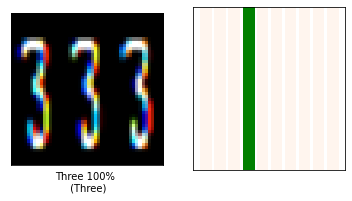

In [ ]:
# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, 10000) # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images" 
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



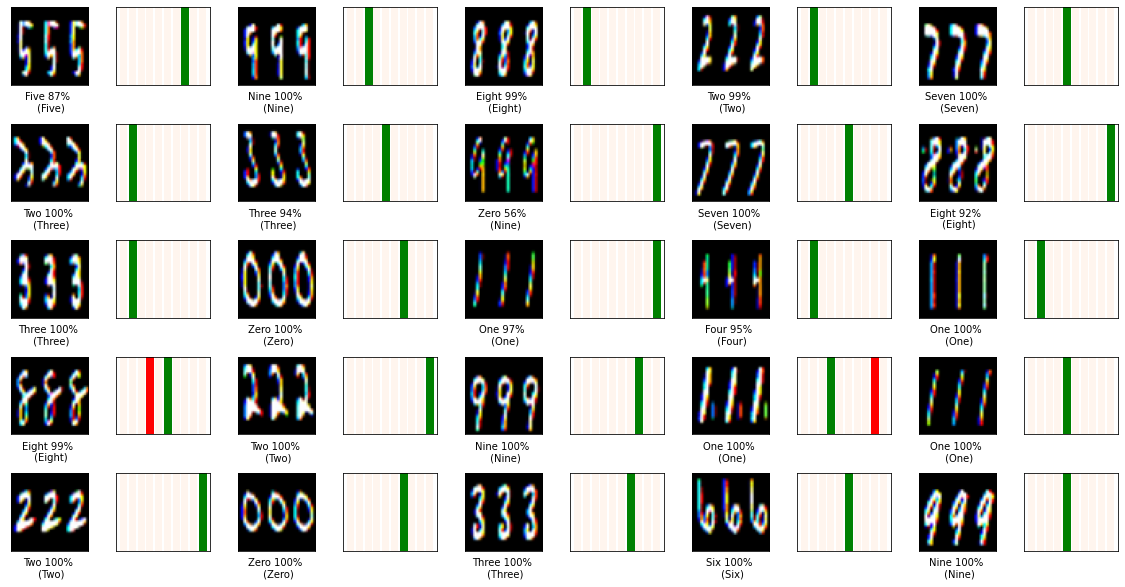

In [ ]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    # we are passing "val_images_Original" just to show original image instead of "val_images" 
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

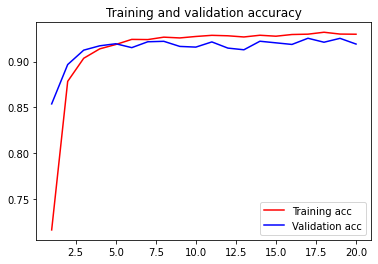

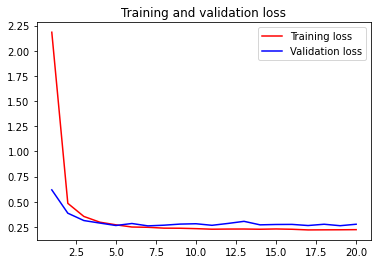

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

2. Visualize Kernel Filters

In [ ]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
model.summary()
# summarize filter shapes
for layer in model.layers:
 # check for convolutional layer
    if 'conv' not in layer.name:
        continue
 # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
filters, biases = model.layers[1].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

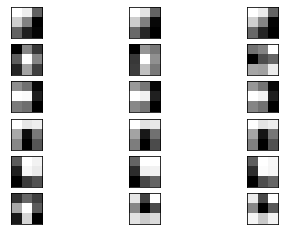

In [ ]:
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
    f = filters[:, :, :, i]
 # plot each channel separately
    for j in range(3):
 # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
 # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

3. Visualizing features maps

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 278ms/step


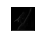

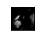

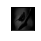

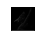

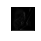

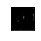

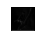

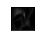

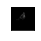

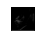

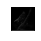

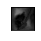

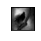

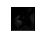

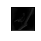

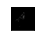

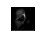

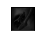

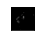

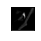

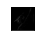

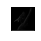

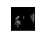

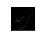

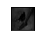

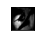

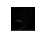

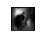

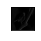

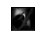

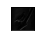

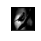

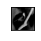

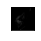

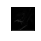

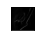

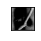

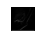

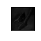

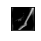

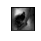

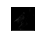

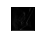

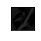

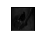

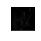

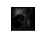

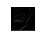

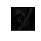

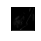

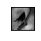

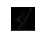

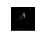

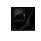

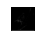

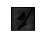

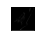

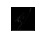

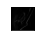

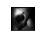

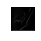

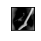

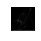

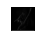

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('./images.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
 # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
 # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
        pyplot.show()

1/1 [==============================] - 1s 821ms/step


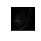

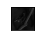

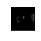

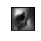

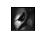

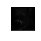

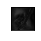

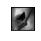

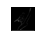

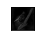

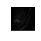

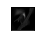

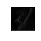

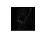

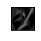

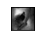

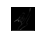

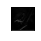

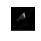

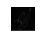

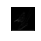

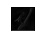

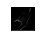

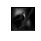

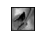

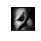

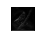

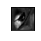

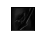

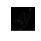

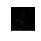

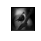

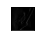

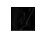

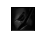

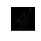

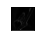

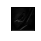

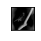

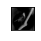

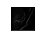

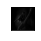

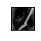

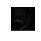

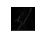

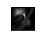

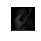

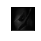

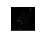

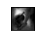

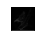

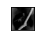

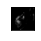

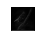

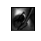

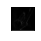

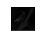

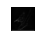

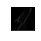

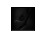

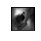

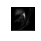

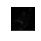

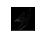

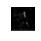

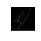

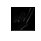

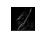

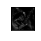

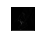

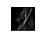

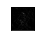

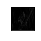

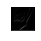

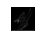

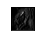

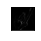

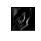

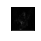

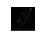

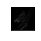

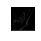

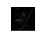

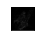

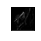

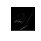

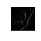

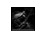

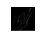

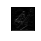

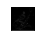

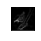

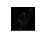

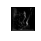

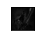

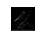

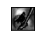

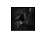

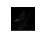

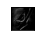

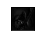

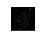

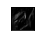

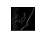

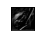

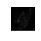

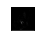

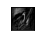

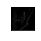

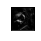

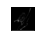

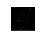

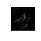

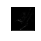

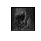

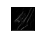

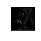

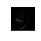

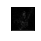

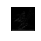

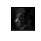

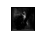

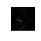

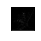

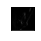

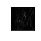

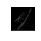

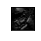

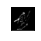

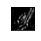

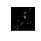

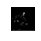

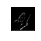

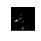

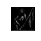

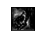

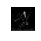

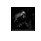

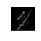

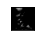

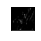

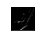

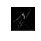

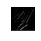

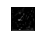

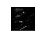

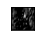

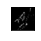

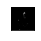

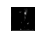

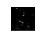

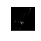

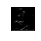

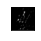

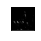

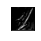

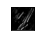

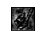

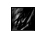

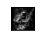

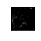

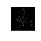

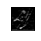

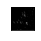

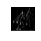

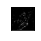

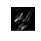

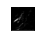

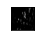

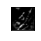

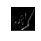

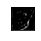

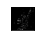

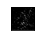

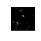

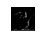

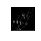

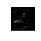

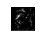

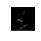

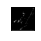

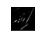

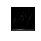

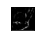

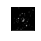

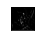

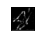

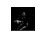

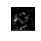

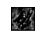

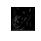

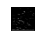

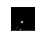

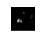

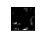

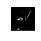

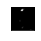

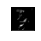

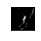

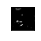

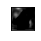

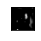

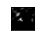

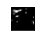

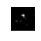

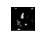

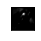

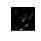

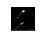

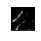

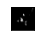

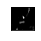

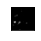

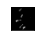

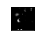

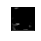

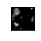

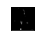

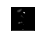

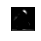

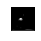

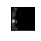

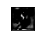

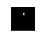

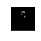

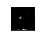

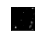

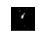

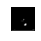

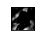

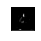

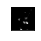

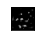

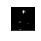

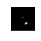

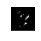

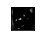

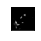

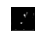

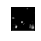

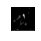

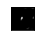

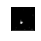

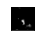

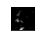

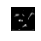

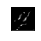

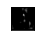

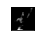

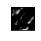

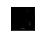

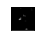

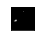

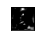

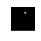

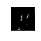

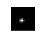

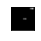

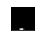

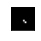

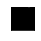

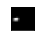

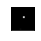

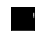

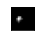

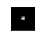

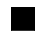

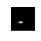

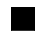

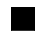

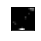

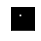

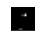

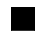

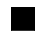

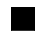

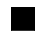

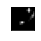

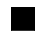

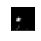

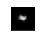

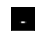

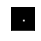

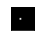

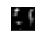

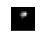

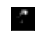

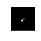

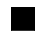

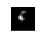

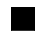

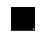

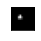

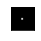

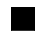

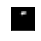

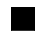

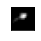

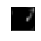

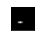

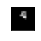

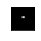

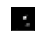

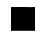

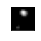

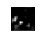

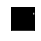

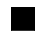

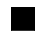

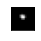

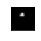

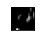

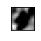

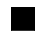

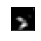

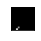

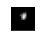

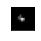

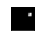

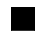

In [ ]:
# redefine model to output right after the first hidden layer

# visualize feature maps output from each block in the vgg model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('./images.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
 # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
 # specify subplot and turn of axis
             ax = pyplot.subplot(square, square, ix)
             ax.set_xticks([])
             ax.set_yticks([])
 # plot filter channel in grayscale
             pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
             ix += 1
 # show the figure
             pyplot.show()